# Lead score case study
<hr/>

## Business problem: Improvement of lead score for an online education service provider
<hr/>
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Steps:
<hr/>

1. Formulate the problem statement from the given business problem

2. Import the data and understand the data

3. Preprocessing data (Drop unwanted columns/EDA/missing value/outliers detection/convert categorical variables/get dummys etc.)

4. Train - test split

5. Feature scaling

6. Model building

7. Model evaluation

8. Conclusion

## 1. Problem statement
<hr/>

***Build a logistic regression model to assign a lead score to each of the leads which can be used by the company to filter out the leads that are most likely to convert into paying customers.***

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

The solution will improve the lead score conversion rate that in turn drives for a better revenue for the company.

## 2. Load & understand the data
<hr/>

In [139]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,accuracy_score,classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [140]:
# Display max rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [141]:
# Import data
df_leads = pd.read_csv('Leads.csv')
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [142]:
# Understand the data
# Create a function called data_insights
# This function provides some basic informations about the given dataset
def data_insights(dataframe):
    print('*****************Shape*********************')
    print(dataframe.shape)
    print('*****************Info*********************')
    print(dataframe.info())
    print('*****************Statistical insights*********************')
    print(dataframe.describe())
    print('*****************Null percent per column*********************')
    print(round((dataframe.isnull().sum() / len(dataframe)) * 100,2))
    print('*****************Duplicate values per column*********************')
    print(dataframe.duplicated().sum())

In [143]:
# call data_insights function
data_insights(df_leads)

*****************Shape*********************
(9240, 37)
*****************Info*********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website   

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [144]:
# Create a function to evaluate number of different values in any column
def col_value_counts(dataframe, col_name):
    print('**************************************')
    print(dataframe[col_name].value_counts(normalize= True))

In [145]:
# Drop the columns
df_leads1 = df_leads.drop(['Prospect ID','Lead Number'],axis= 1)

# Call col_value_counts function
for column in df_leads1.columns:
    col_value_counts(df_leads1,column)

**************************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
**************************************
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
**************************************
No   

02.Medium    0.555157
01.High      0.438670
03.Low       0.006173
Name: Asymmetrique Profile Index, dtype: float64
**************************************
14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: Asymmetrique Activity Score, dtype: float64
**************************************
15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: Asymmetrique Profile Score, dtype: float64
**************************************
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64
**************************************
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64
**************************************
Modified                        0.368723
Email Open

02.Medium    0.555157
01.High      0.438670
03.Low       0.006173
Name: Asymmetrique Profile Index, dtype: float64
**************************************
14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: Asymmetrique Activity Score, dtype: float64
**************************************
15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: Asymmetrique Profile Score, dtype: float64
**************************************
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64
**************************************
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64
**************************************
Modified                        0.368723
Email Open

## 3. Data preprocessing
<hr/>

In [146]:
# Before dropping the columns, lets keep a copy of the two columns 'Prospect ID' & 'Lead Number'
df_prospect_id = df_leads[['Prospect ID']]
df_lead_number = df_leads[['Lead Number']]

In [147]:
# Replace 'Select' with NAN
df_leads = df_leads.replace('Select', np.nan)

In [148]:
# Drop columns that don't have any significant weightage on the target
columns_to_drop = ['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [149]:
# Drop the columns and create a new dataframe so that the main dataframe remains intact
df_leads_new = df_leads.drop(columns_to_drop, axis= 1)
df_leads_new.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  How did you hear about X Education What is your current occupation  \
0                                NaN                      Unemployed   
1                                NaN                      Unemployed   
2                                NaN                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance             NaN   
1                              Ringing               NaN             NaN   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure             NaN   
4  Will revert after reading the email          Might be             NaN   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0     NaN                   02.Medium                  02.Medium   
1     NaN                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No             

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  How did you hear about X Education What is your current occupation  \
0                                NaN                      Unemployed   
1                                NaN                      Unemployed   
2                                NaN                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance             NaN   
1                              Ringing               NaN             NaN   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure             NaN   
4  Will revert after reading the email          Might be             NaN   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0     NaN                   02.Medium                  02.Medium   
1     NaN                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No             

#### Dropping columns having null value percentage > 40

In [150]:
# Evaluate distribution of null values in each column
print(round((df_leads_new.isnull().sum() / len(df_leads_new)) * 100,2))

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [151]:
# Drop the columns having more than 40% missing values
null_percent = (df_leads_new.isnull().sum() / len(df_leads_new)) * 100
null_cols = null_percent[null_percent >= 40].index

In [152]:
df_leads_new = df_leads_new.drop(null_cols, axis= 1)
df_leads_new.shape

(9240, 23)

(9240, 23)

In [153]:
df_leads_new.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

#### Imputation of null values in numeric columns

In [154]:
# Check out the number of missing values in numeric columns
num_cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
for i in num_cols:
    if df_leads_new[i].isnull().sum() > 0:
        print(i)

TotalVisits
Page Views Per Visit
TotalVisits
Page Views Per Visit


**So, the columns 'TotalVisits' & 'Page Views Per Visit' are having null values. We need to impute them**

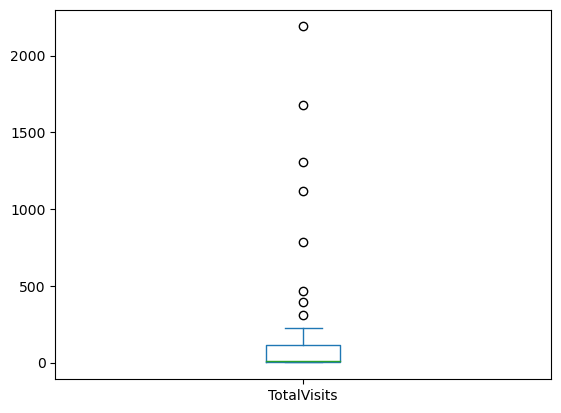

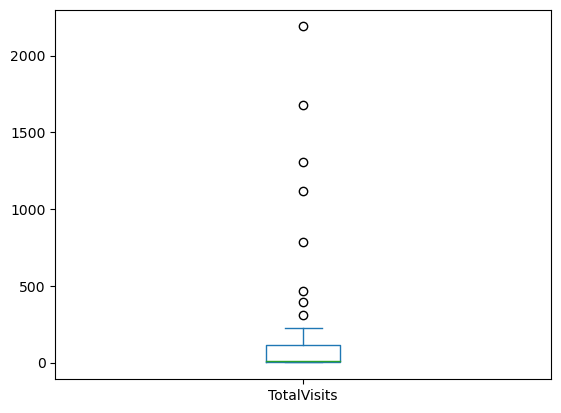

In [155]:
# TotalVisits
df_leads_new['TotalVisits'].value_counts().plot.box()
plt.show()

**As the data is having outliers, we need to replace them with the median value**

In [156]:
# Impute the null values in TotalVisits column with median value
df_leads_new['TotalVisits'].fillna(df_leads_new['TotalVisits'].median(),inplace= True)

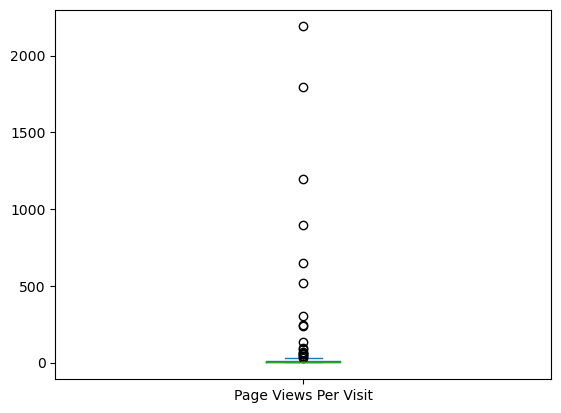

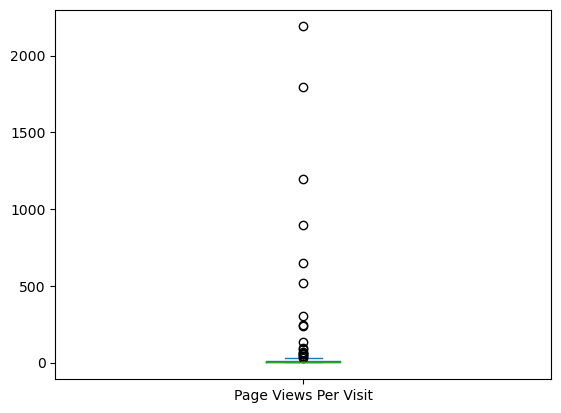

In [157]:
# Page Views Per Visit
df_leads_new['Page Views Per Visit'].value_counts().plot.box()
plt.show()

**As the data is having outliers, we need to replace them with the median value**

In [158]:
# Impute the null values in Page Views Per Visit column with median value
df_leads_new['Page Views Per Visit'].fillna(df_leads_new['Page Views Per Visit'].median(),inplace= True)

#### Imputation of null values in categoric columns

In [159]:
# Check out which of the categorical columns are having null values
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview','Last Notable Activity']
for i in cat_cols:
    if df_leads_new[i].isnull().sum() > 0:
        print(i)

Lead Source
Last Activity
Country
Specialization
What is your current occupation
What matters most to you in choosing a course
Tags
City
Lead Source
Last Activity
Country
Specialization
What is your current occupation
What matters most to you in choosing a course
Tags
City


#### As a thumb rule: "we replace the null values in the categorical columns with their respective modes"

In [160]:
# Create a function to impute the null values in categorical columns with their respective mode values
def impute_categorical_null_values(dataset,column):
    dataset[column].fillna(dataset[column].mode()[0],inplace= True)

In [161]:
for i in cat_cols:
    impute_categorical_null_values(df_leads_new, i)

#### So, all the null values have been taken care of.

### EDA
<hr/>

#### Categorical variables
<hr/>

To analyze the categorical variables, we do the following steps:

1. Check the value counts of the column
2. If the column does not have variance (i.e. one value is predominant than others), we can drop the column
3. If the column have too many levels, we can combine the 'not so contributing levels' into one single generic level: 'Others'
4. Repeat this for all the columns

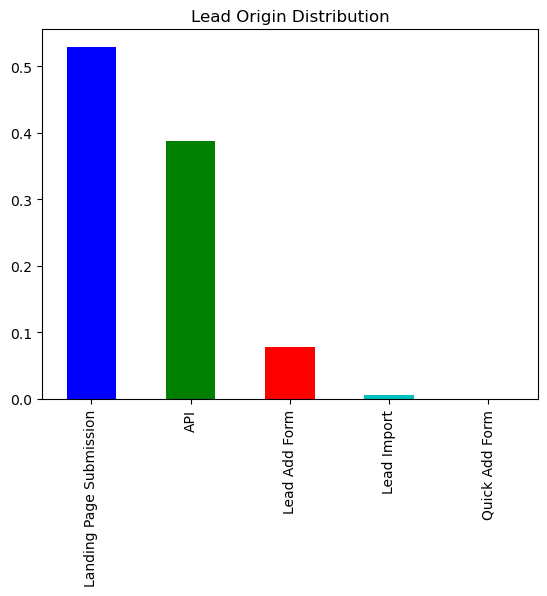

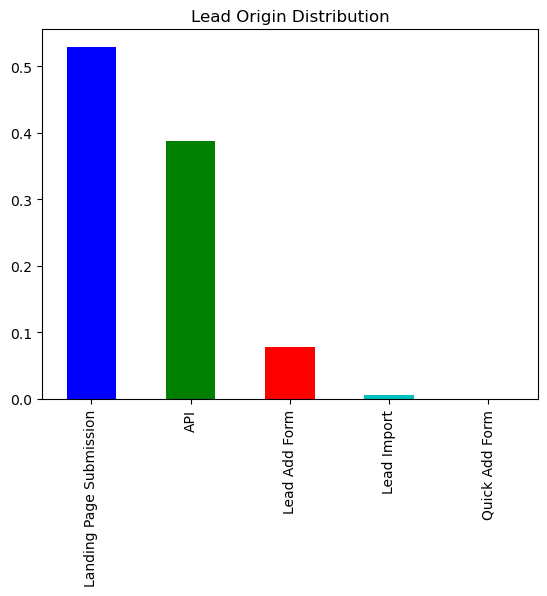

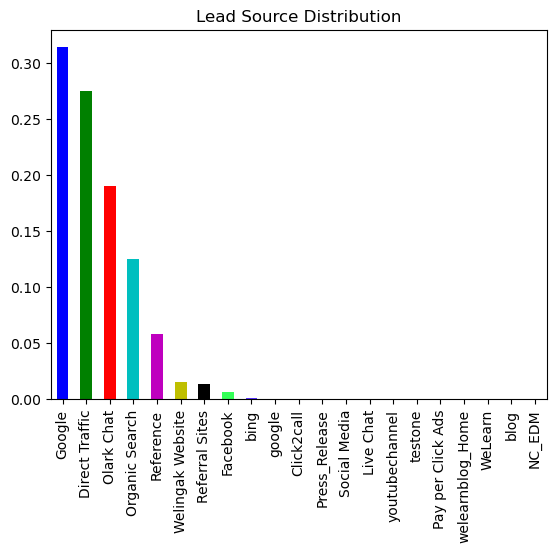

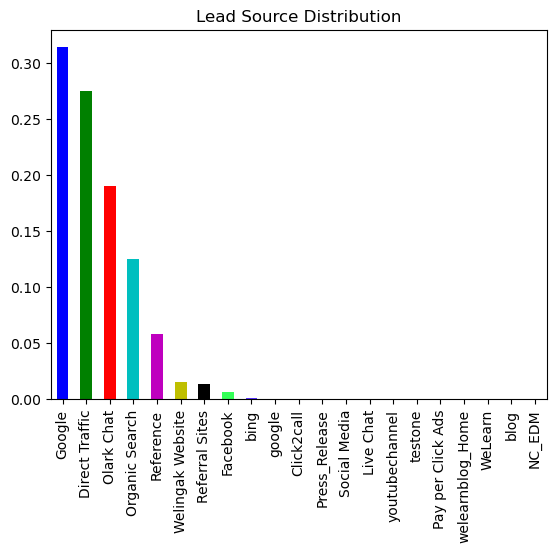

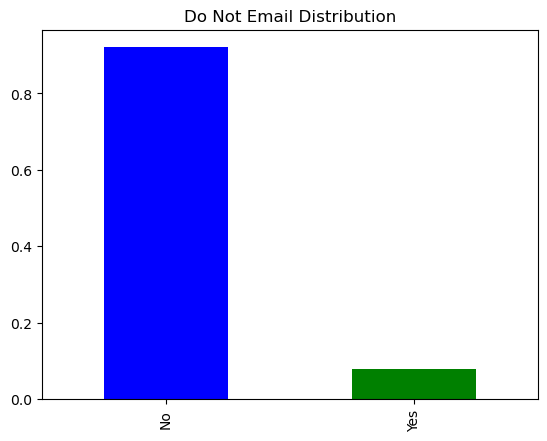

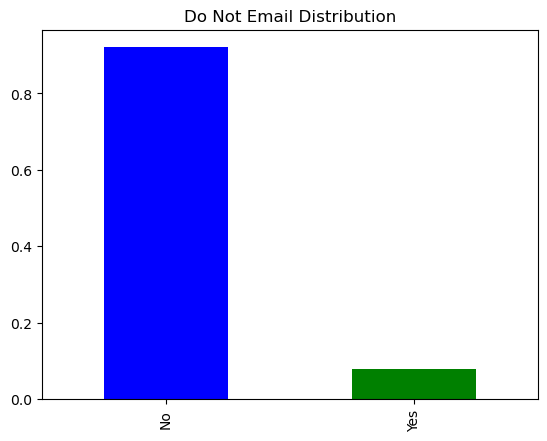

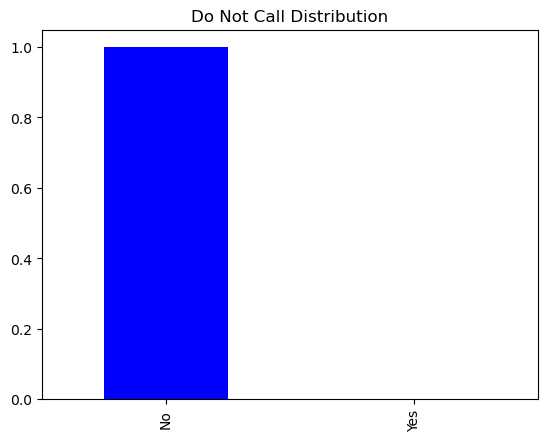

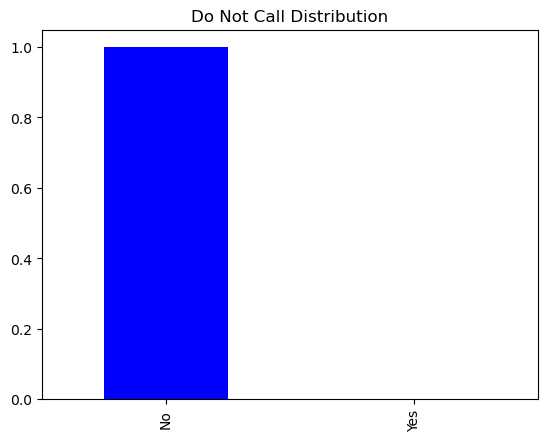

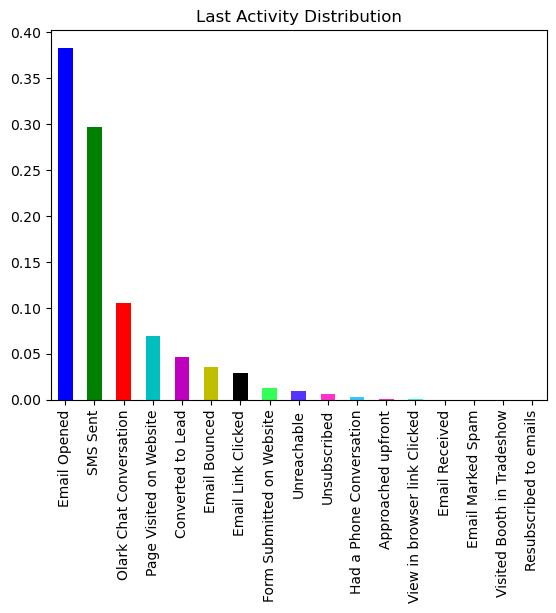

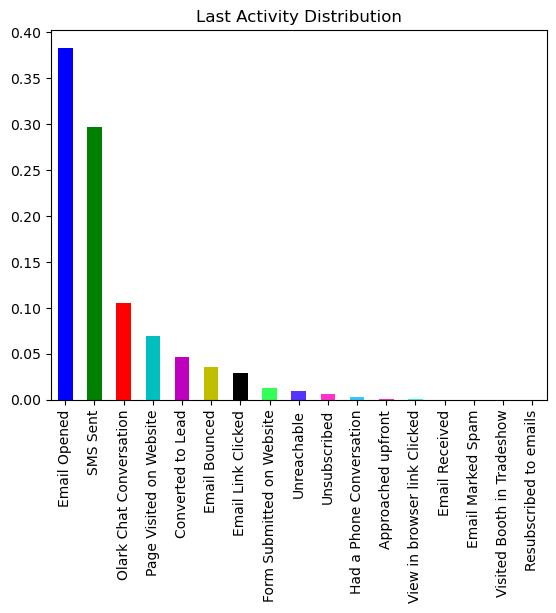

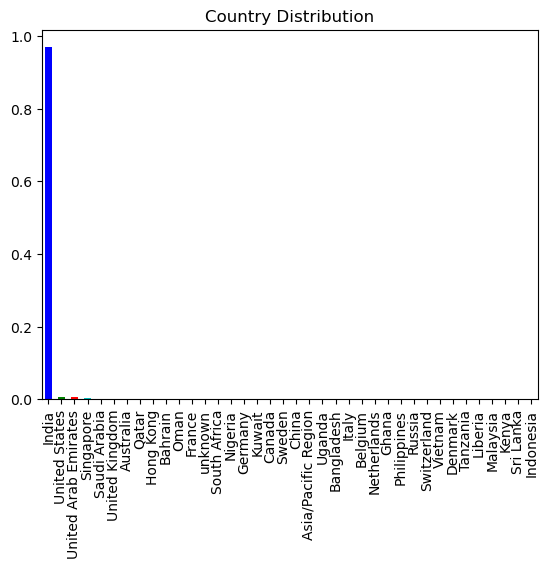

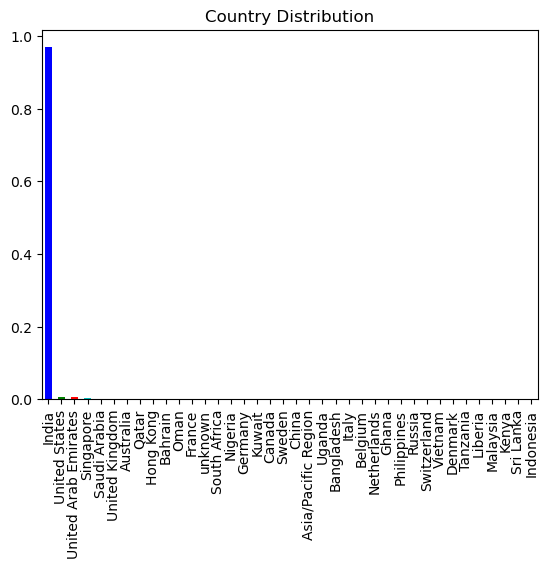

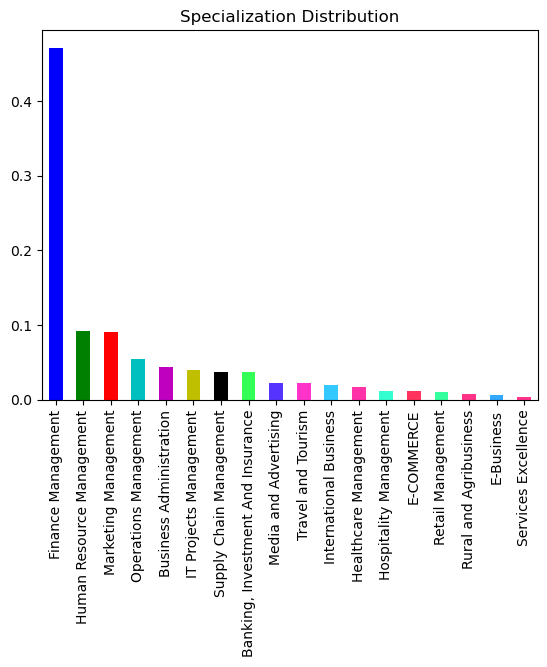

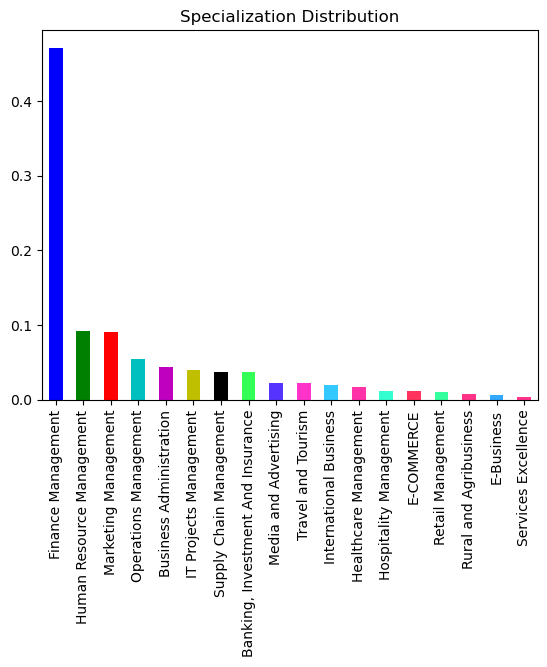

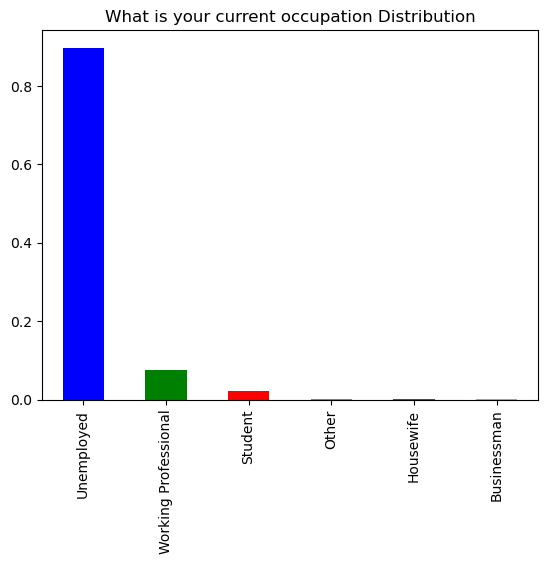

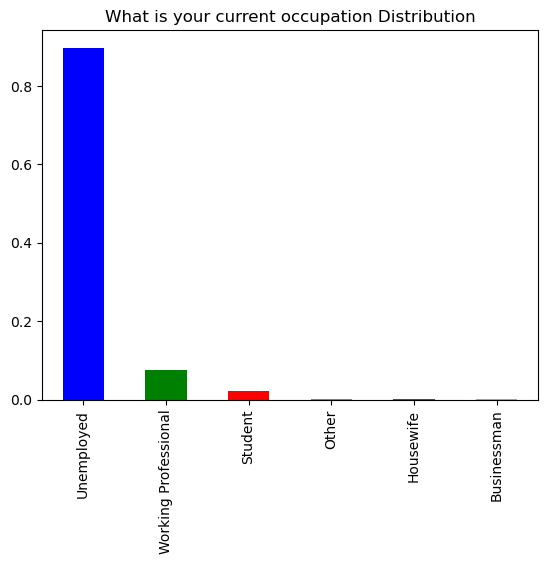

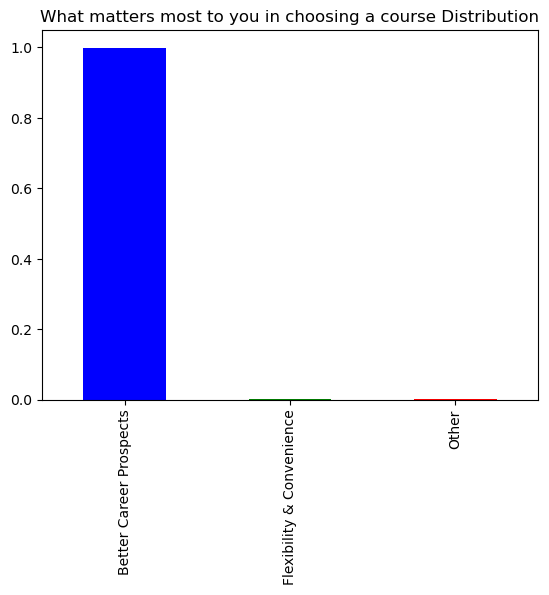

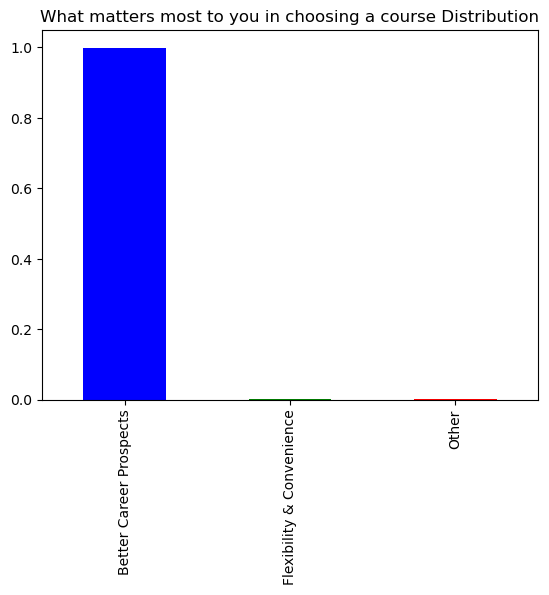

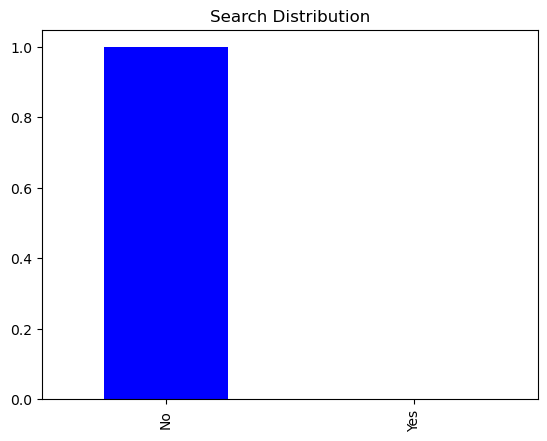

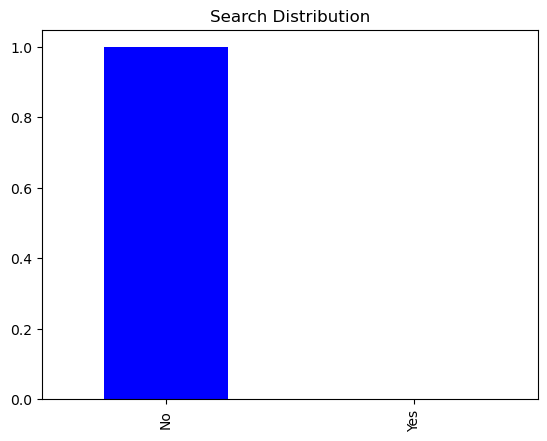

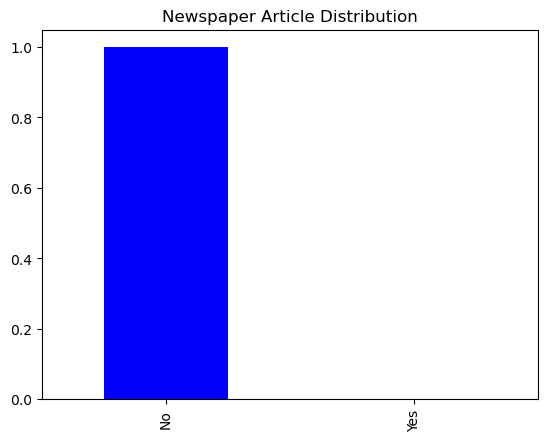

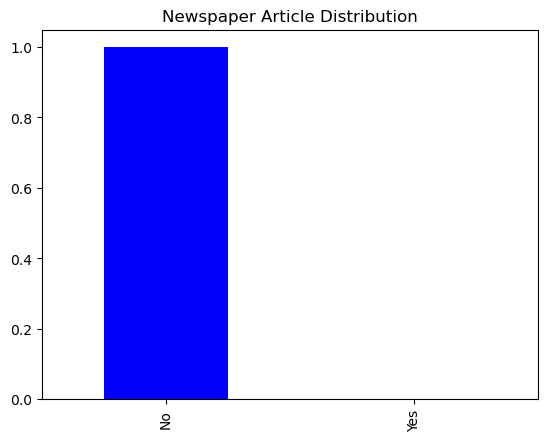

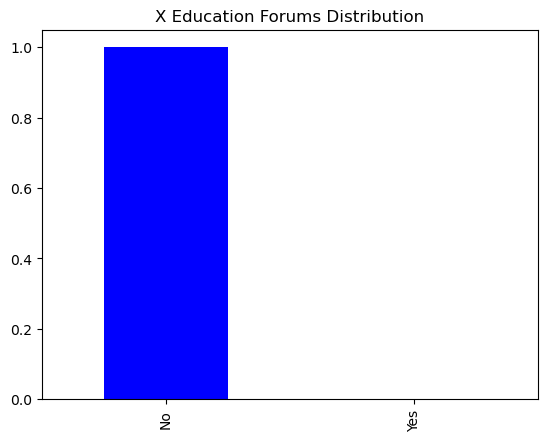

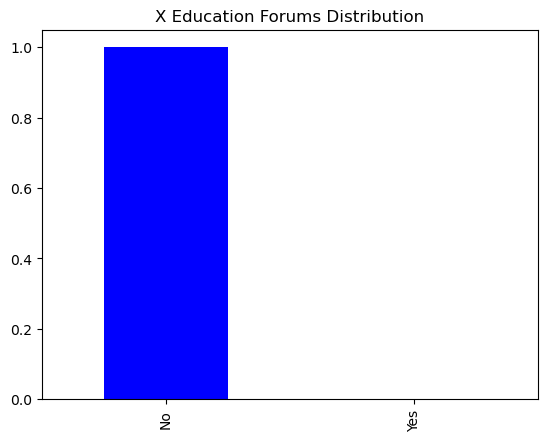

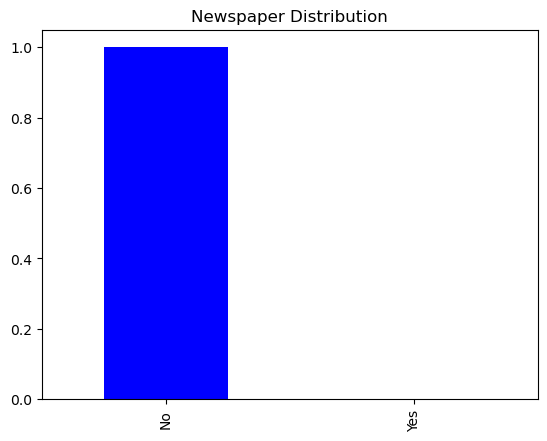

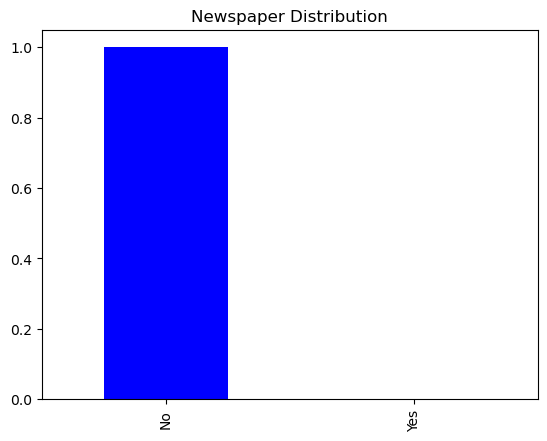

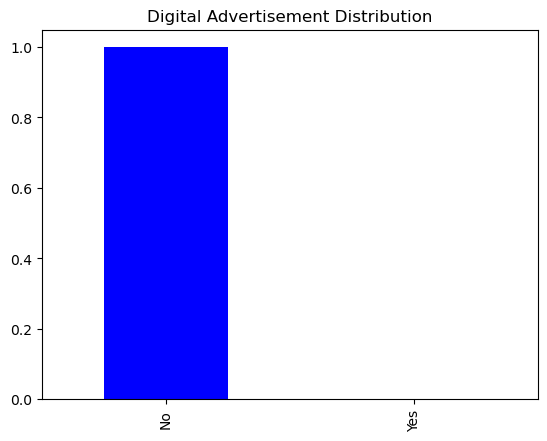

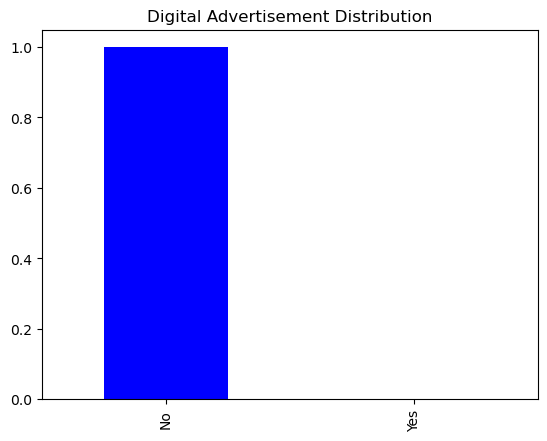

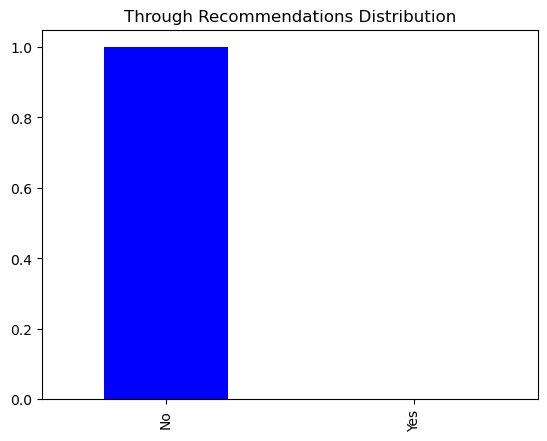

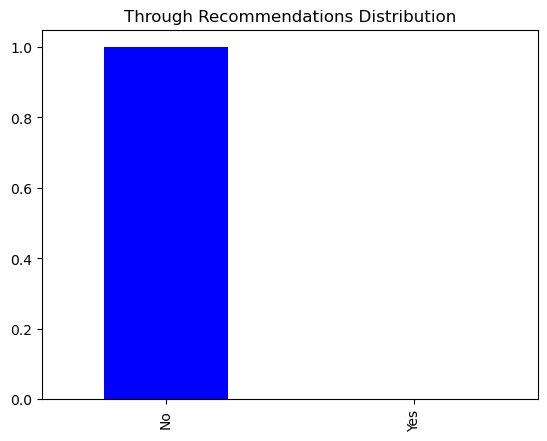

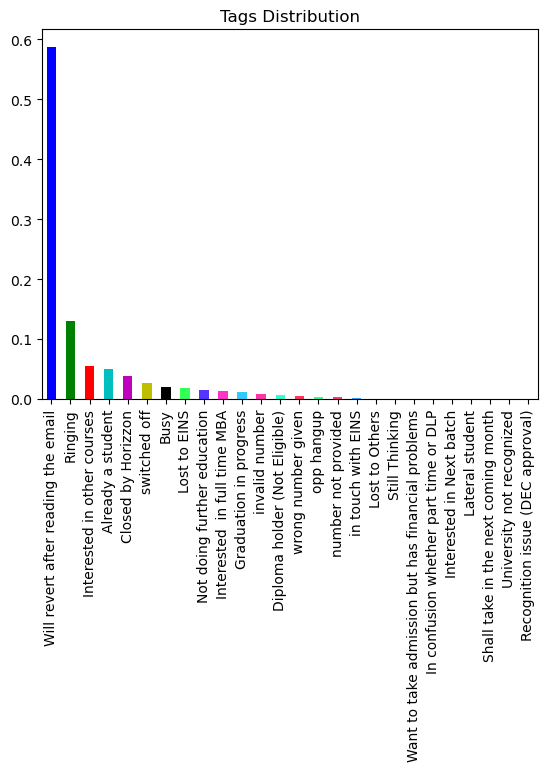

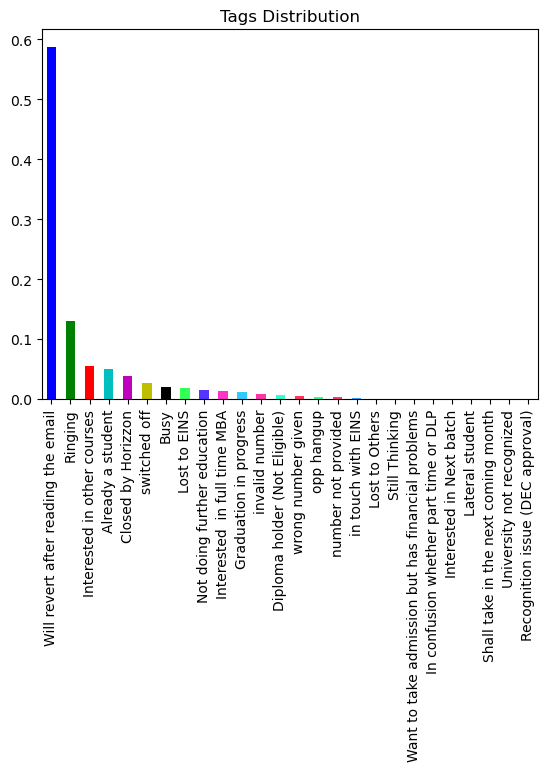

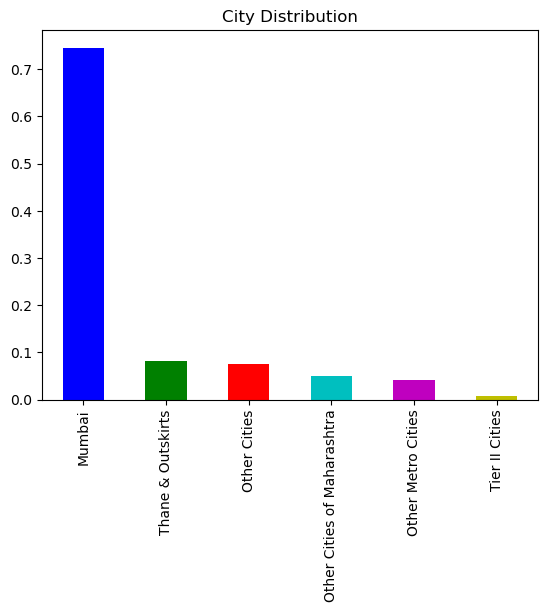

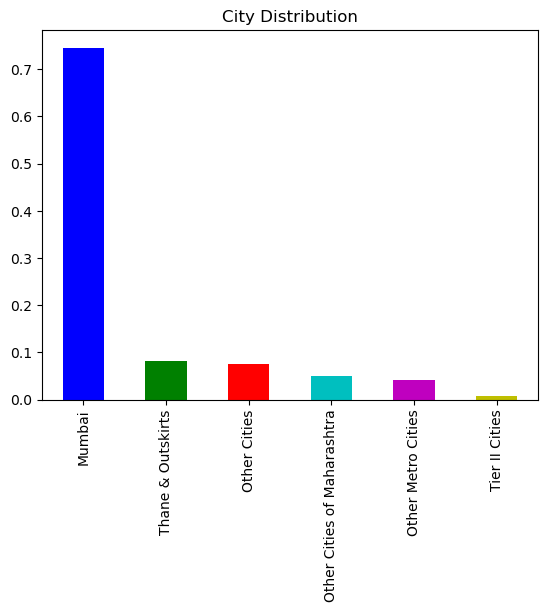

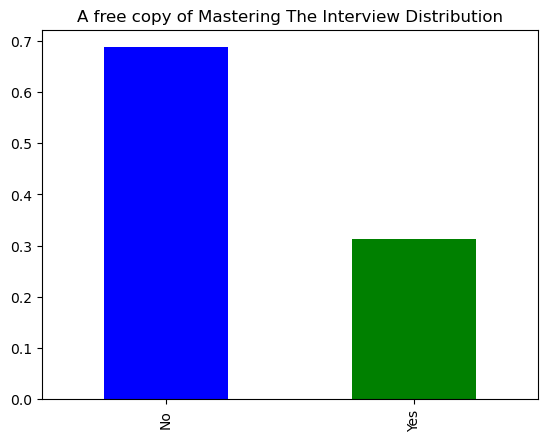

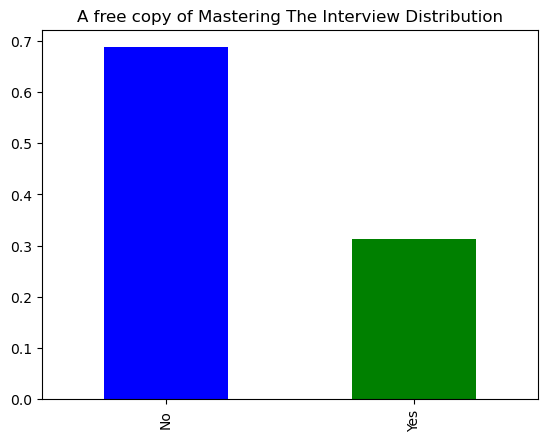

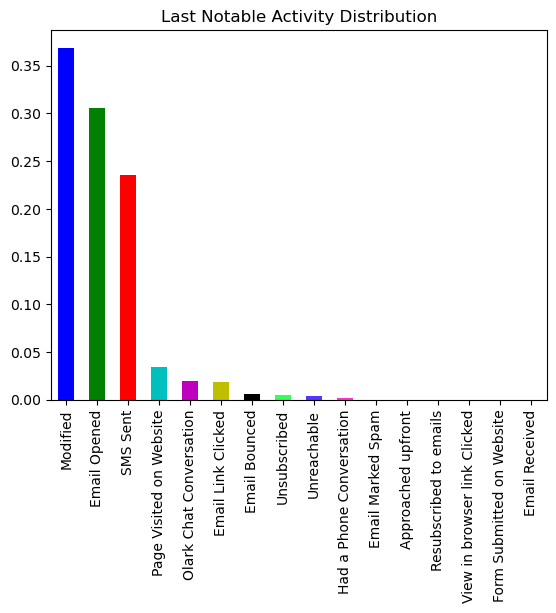

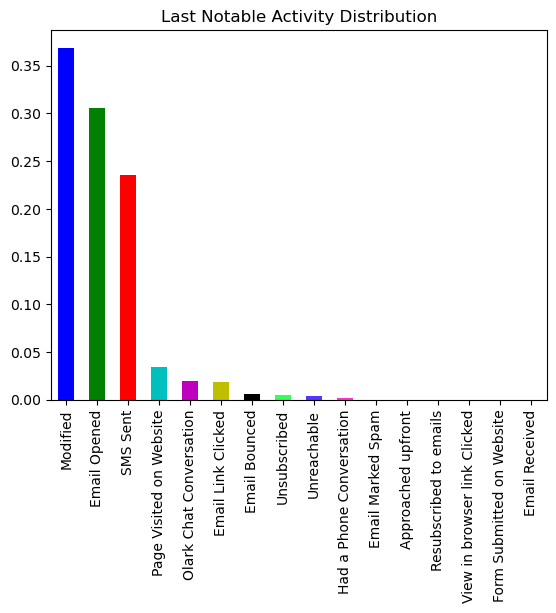

In [162]:
bar_colors = ['b','g','r','c','m','y','k','#33FF57','#5733FF','#FF33C9','#33C9FF','#FF33A8','#33FFD1','#FF335D','#33FF9F','#FF3387','#33A8FF','#FF338E','#33FFC4']
for column in cat_cols:
    df_leads_new[column].value_counts(normalize= True).plot.bar(color= bar_colors)
    plt.title(column + ' Distribution')
    plt.show()

#### Drop low variance columns

In [163]:
no_variance_cat_cols = ['Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Country','City']

In [164]:
df_leads_new = df_leads_new.drop(no_variance_cat_cols,axis= 1)

#### Combine the lesser contributor levels to a generic level called "Others"

In [165]:
# Lead Source
levels_to_merge = []
values_range = df_leads_new['Lead Source'].nunique()
for i in range(values_range):
    if df_leads_new['Lead Source'].value_counts()[i] < 500:
        levels_to_merge.append(df_leads_new['Lead Source'].value_counts().index[i])
        
df_leads_new['Lead Source'] = df_leads_new['Lead Source'].apply(lambda x: 'Others' if x in levels_to_merge else x)

In [166]:
# Lead Origin
levels_to_merge = []
values_range = df_leads_new['Lead Origin'].nunique()
for i in range(values_range):
    if df_leads_new['Lead Origin'].value_counts()[i] < 700:
        levels_to_merge.append(df_leads_new['Lead Origin'].value_counts().index[i])
        
df_leads_new['Lead Origin'] = df_leads_new['Lead Origin'].apply(lambda x: 'Others' if x in levels_to_merge else x)

In [167]:
# Last Activity
levels_to_merge = []
values_range = df_leads_new['Last Activity'].nunique()
for i in range(values_range):
    if df_leads_new['Last Activity'].value_counts()[i] < 300:
        levels_to_merge.append(df_leads_new['Last Activity'].value_counts().index[i])
        
df_leads_new['Last Activity'] = df_leads_new['Last Activity'].apply(lambda x: 'Others' if x in levels_to_merge else x)

In [168]:
# Specialization
levels_to_merge = []
values_range = df_leads_new['Specialization'].nunique()
for i in range(values_range):
    if df_leads_new['Specialization'].value_counts()[i] < 300:
        levels_to_merge.append(df_leads_new['Specialization'].value_counts().index[i])
        
df_leads_new['Specialization'] = df_leads_new['Specialization'].apply(lambda x: 'Others' if x in levels_to_merge else x)

In [169]:
# What is your current occupation
levels_to_merge = []
values_range = df_leads_new['What is your current occupation'].nunique()
for i in range(values_range):
    if df_leads_new['What is your current occupation'].value_counts()[i] < 100:
        levels_to_merge.append(df_leads_new['What is your current occupation'].value_counts().index[i])
        
df_leads_new['What is your current occupation'] = df_leads_new['What is your current occupation'].apply(lambda x: 'Others' if x in levels_to_merge else x)

In [170]:
# Tags
levels_to_merge = []
values_range = df_leads_new['Tags'].nunique()
for i in range(values_range):
    if df_leads_new['Tags'].value_counts()[i] < 300:
        levels_to_merge.append(df_leads_new['Tags'].value_counts().index[i])
        
df_leads_new['Tags'] = df_leads_new['Tags'].apply(lambda x: 'Others' if x in levels_to_merge else x)

In [171]:
# Last Notable Activity
levels_to_merge = []
values_range = df_leads_new['Last Notable Activity'].nunique()
for i in range(values_range):
    if df_leads_new['Last Notable Activity'].value_counts()[i] < 300:
        levels_to_merge.append(df_leads_new['Last Notable Activity'].value_counts().index[i])
        
df_leads_new['Last Notable Activity'] = df_leads_new['Last Notable Activity'].apply(lambda x: 'Others' if x in levels_to_merge else x)

#### Target imbalance

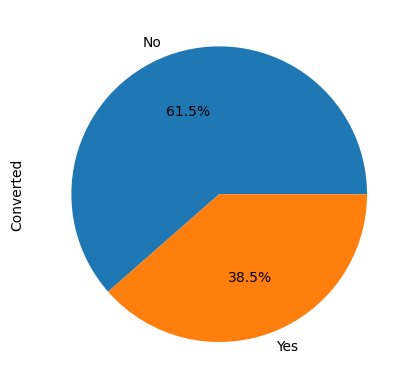

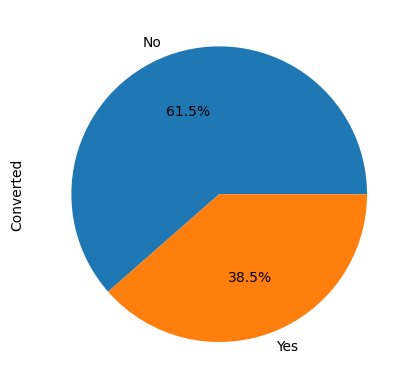

In [172]:
df_leads_new['Converted'].value_counts(normalize= True).plot.pie(labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

<b><font color='green'><font size='3'>Conclusion: Almost 62% of the leads did not convert to paying customers.</font></b>

#### Univariate analysis

In [173]:
# bifurcation of target, numeric & categorical columns
target_col = ['Converted']
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols = ['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'A free copy of Mastering The Interview','Last Notable Activity']

#### Categorical variable analysis

In [174]:
# Create a function to check the value distribution for different categorical columns
def cat_bar_plot(data,col):
    data[col].value_counts(normalize= True).plot.bar(color= 'c')
    plt.title(col + ' Distribution')
    plt.show()

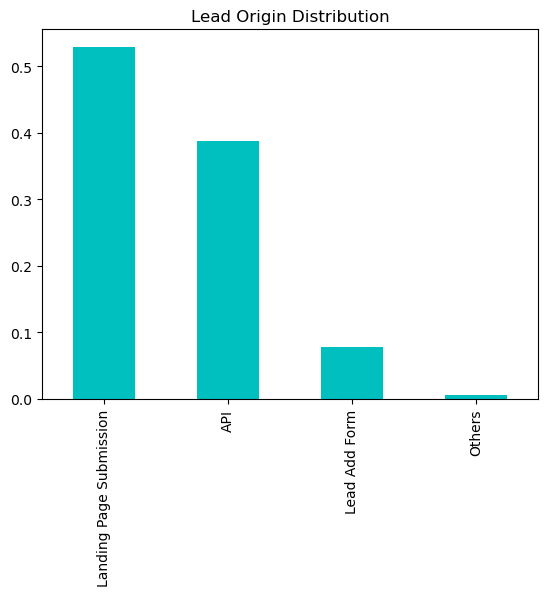

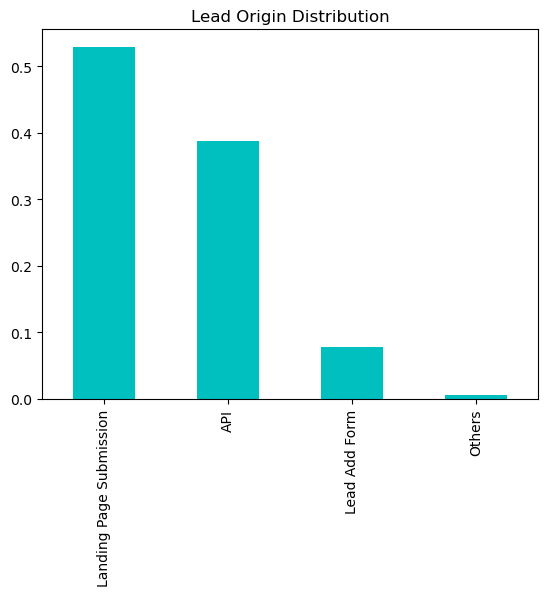

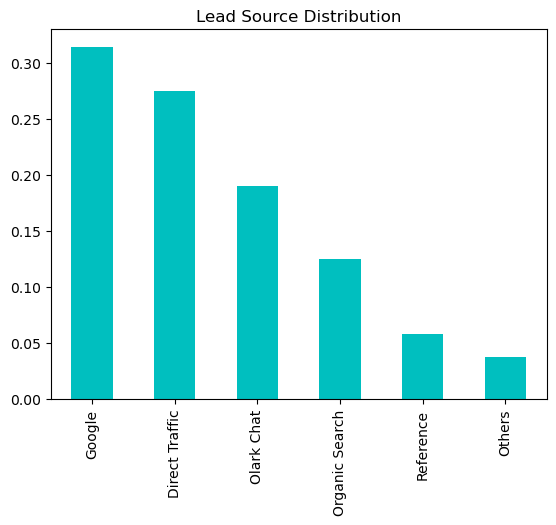

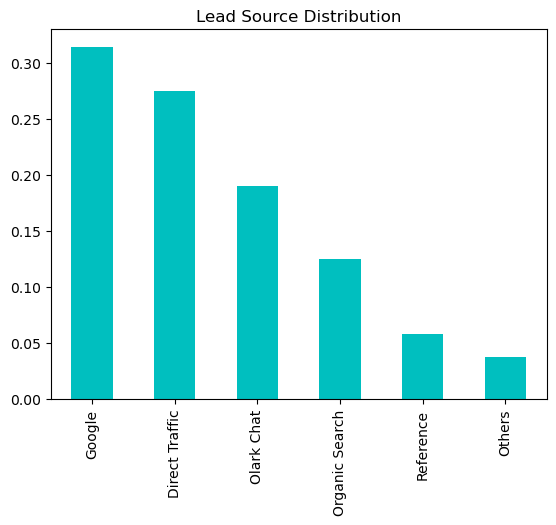

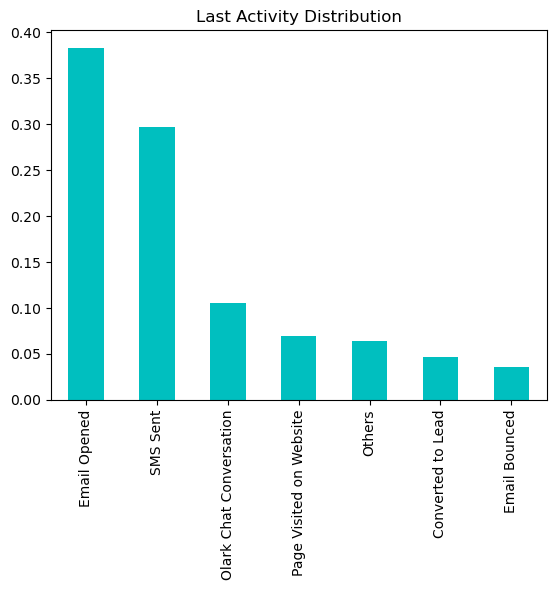

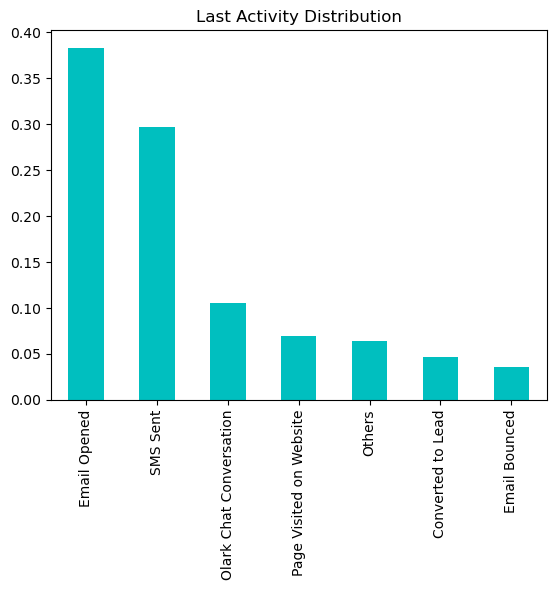

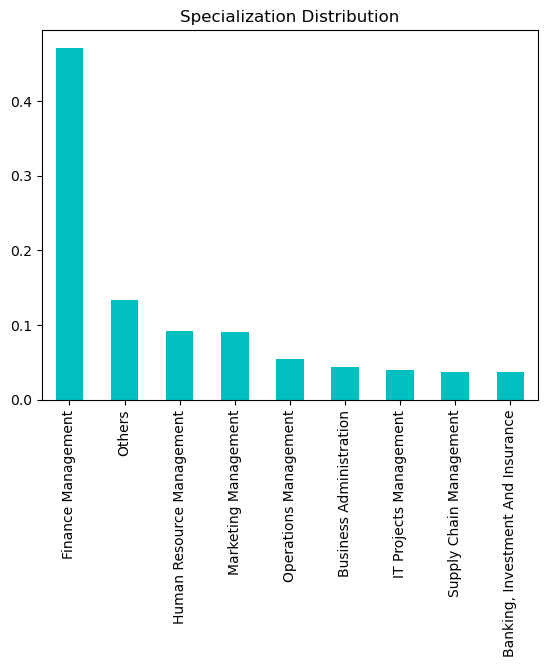

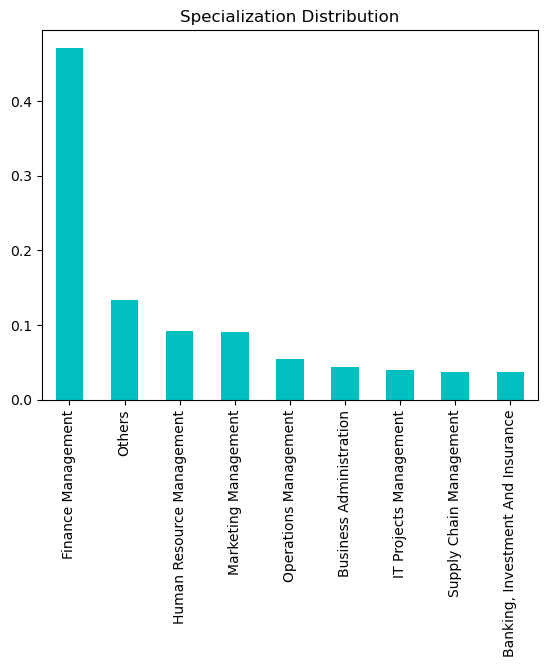

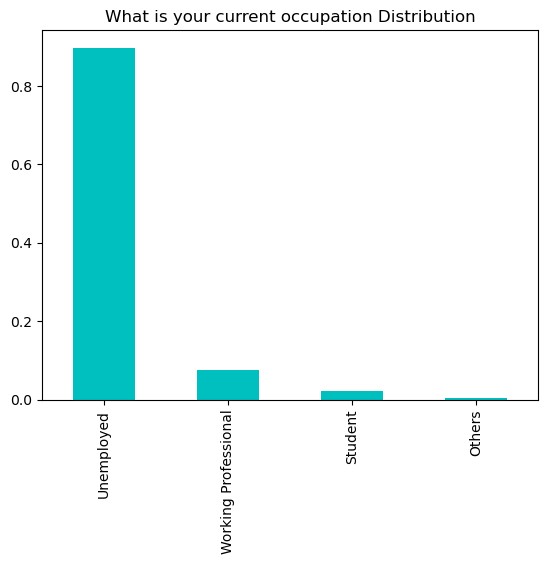

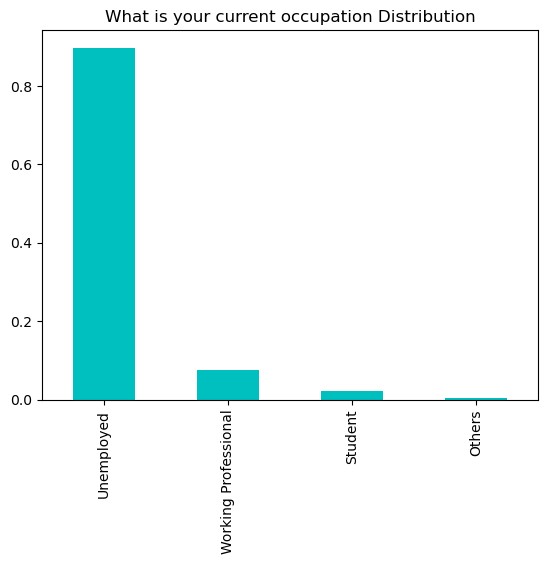

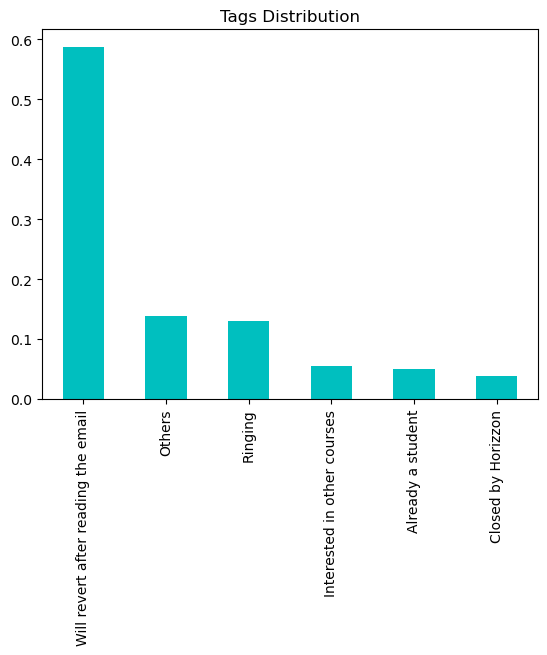

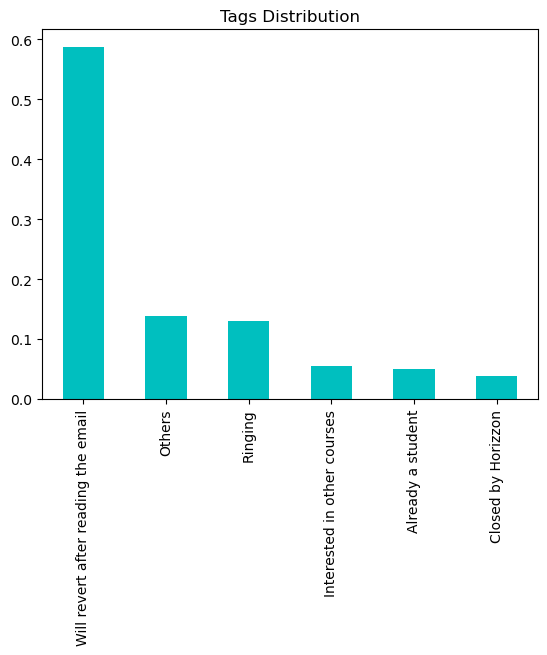

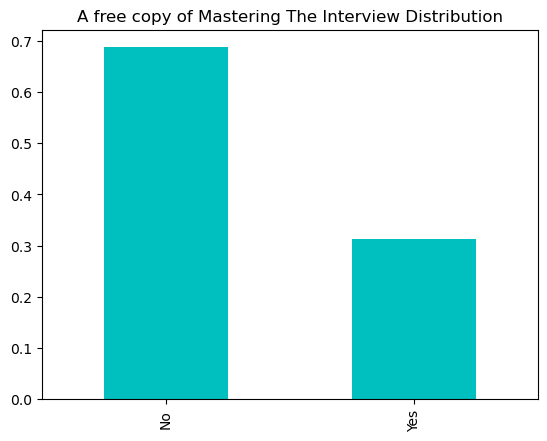

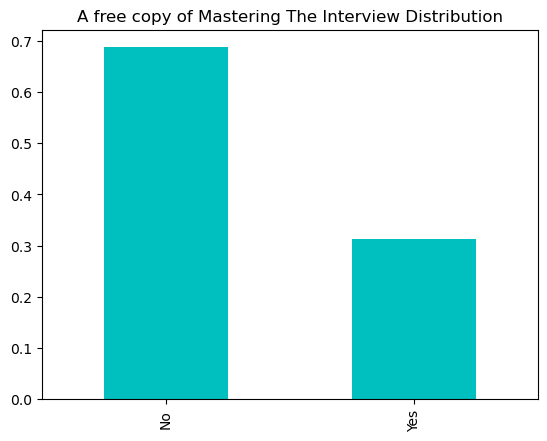

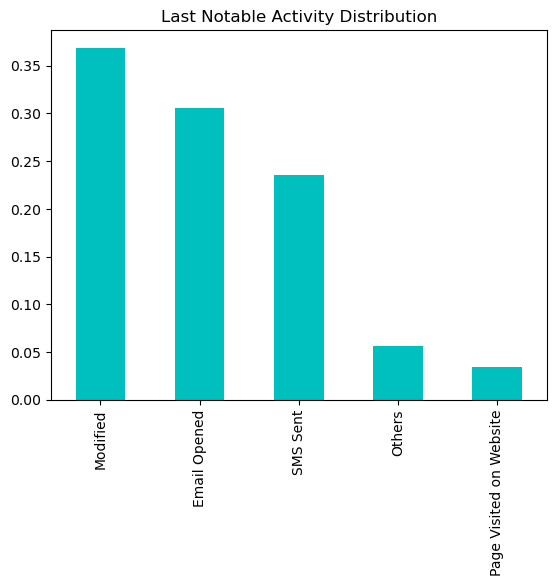

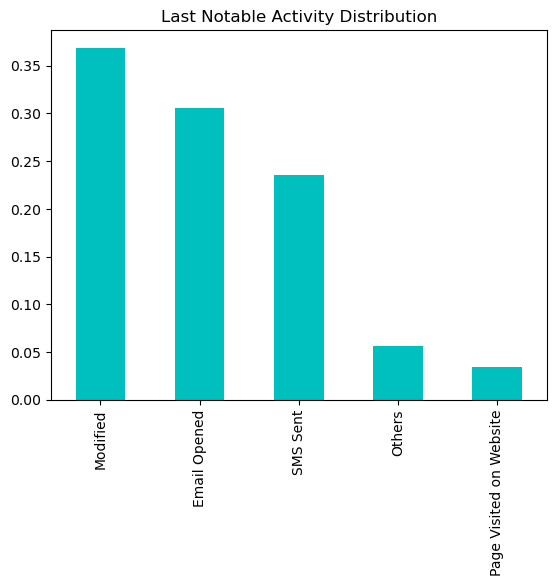

In [175]:
for columns in cat_cols:
    cat_bar_plot(df_leads_new, columns)

#### Continuous variable analysis

In [176]:
# Create a function to check the value distribution for different categorical columns
def num_box_plot(data,col):
    data[col].value_counts(normalize= True).plot.box(color= 'b')
    plt.title(col + ' Distribution')
    plt.show()

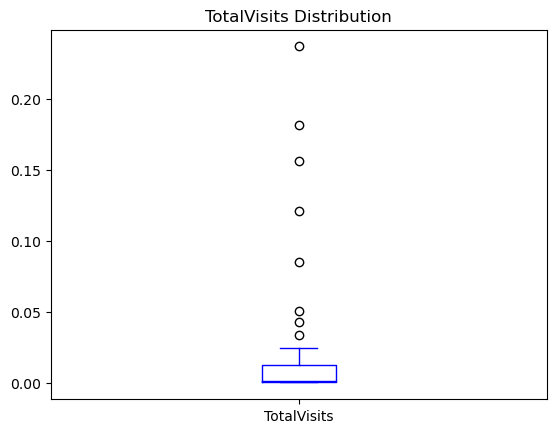

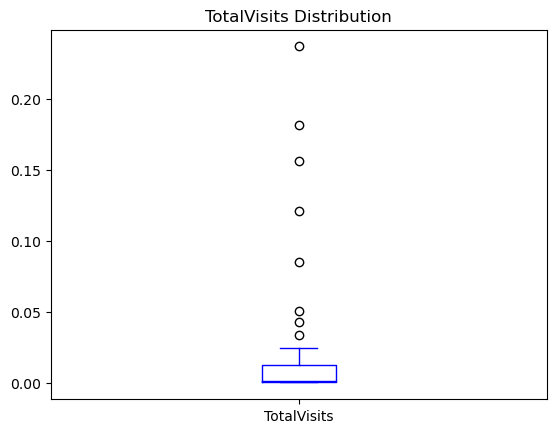

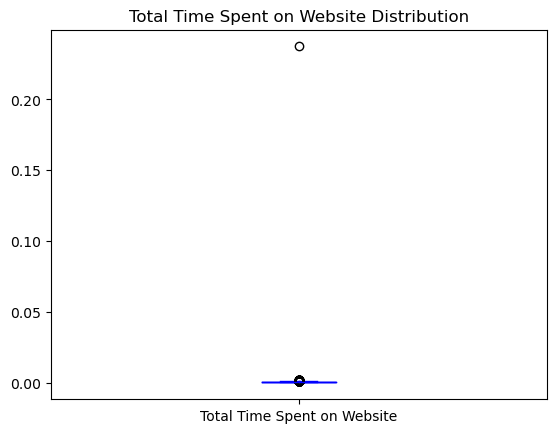

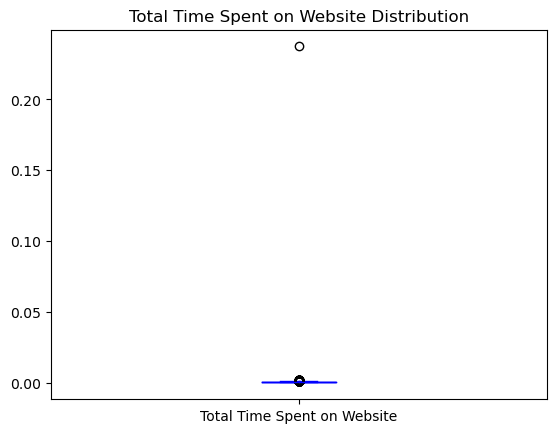

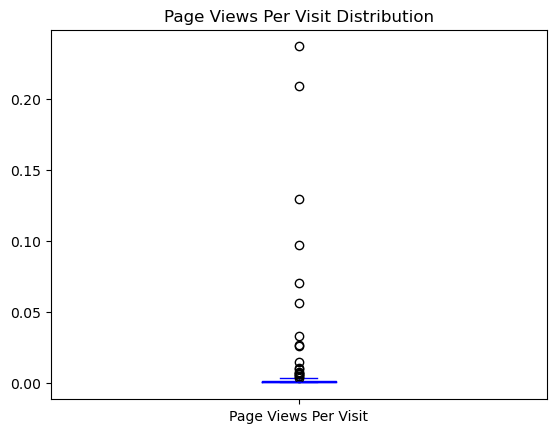

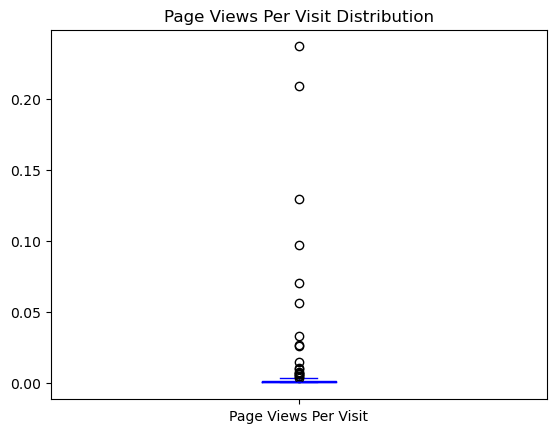

In [177]:
for columns in num_cols:
    num_box_plot(df_leads_new, columns)

#### Bivariate analysis

#### Numeric - numeric

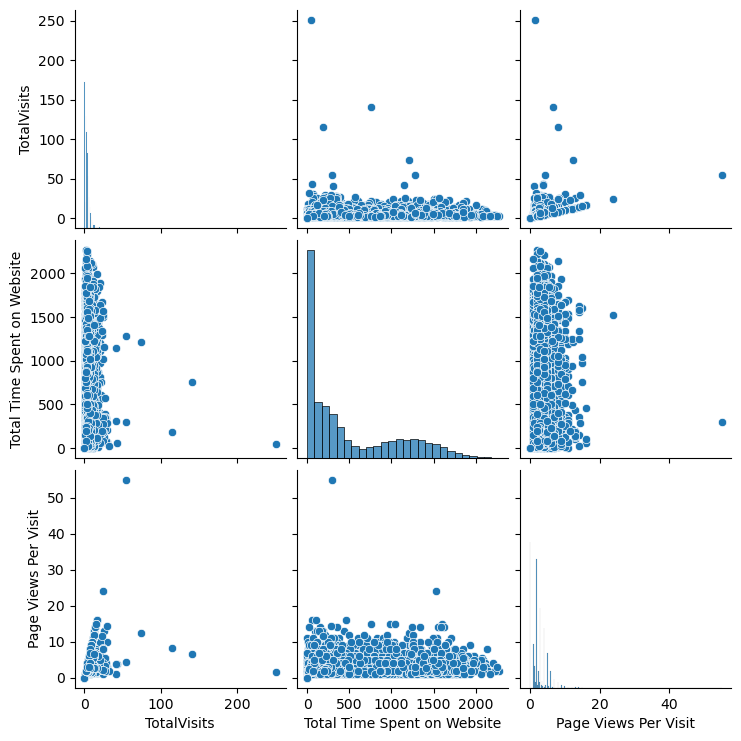

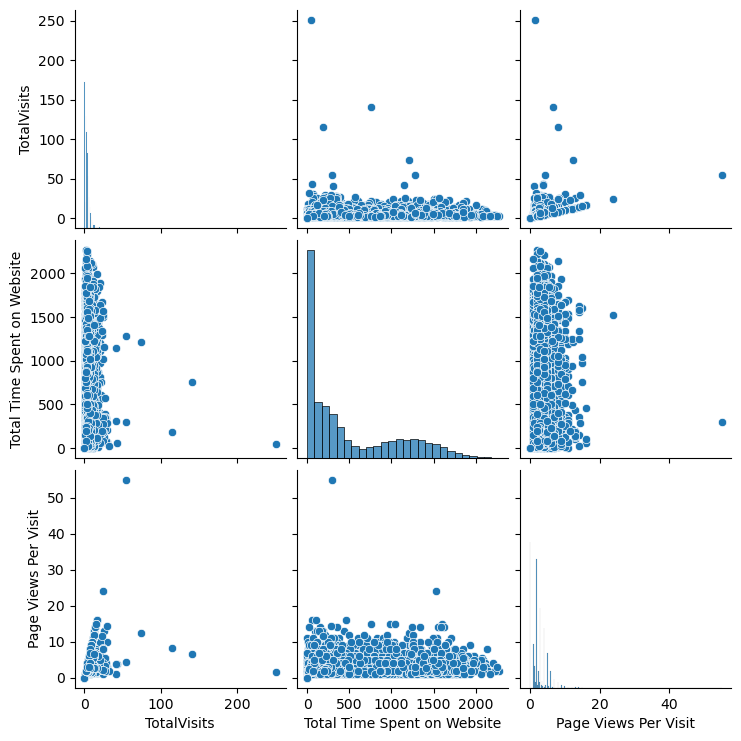

In [178]:
# Pairplot
sns.pairplot(data= df_leads_new,vars= num_cols)
plt.show()

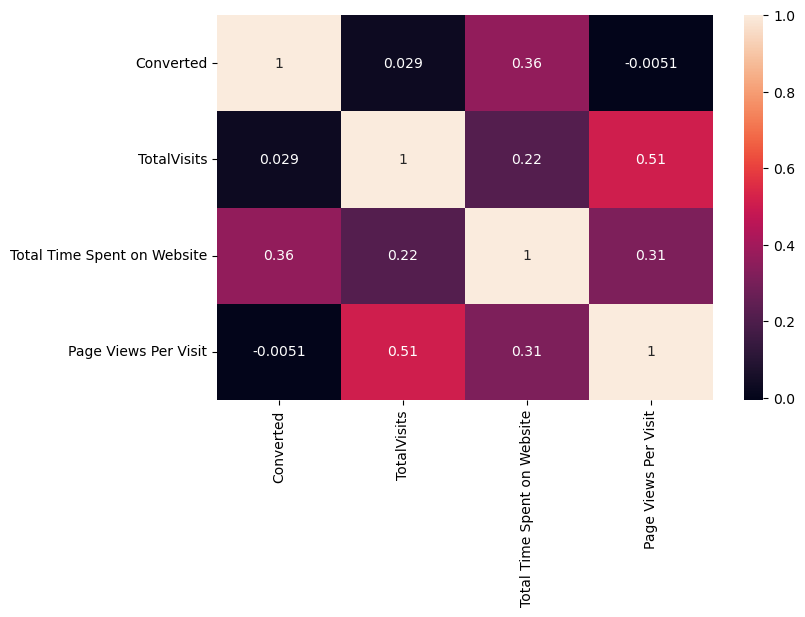

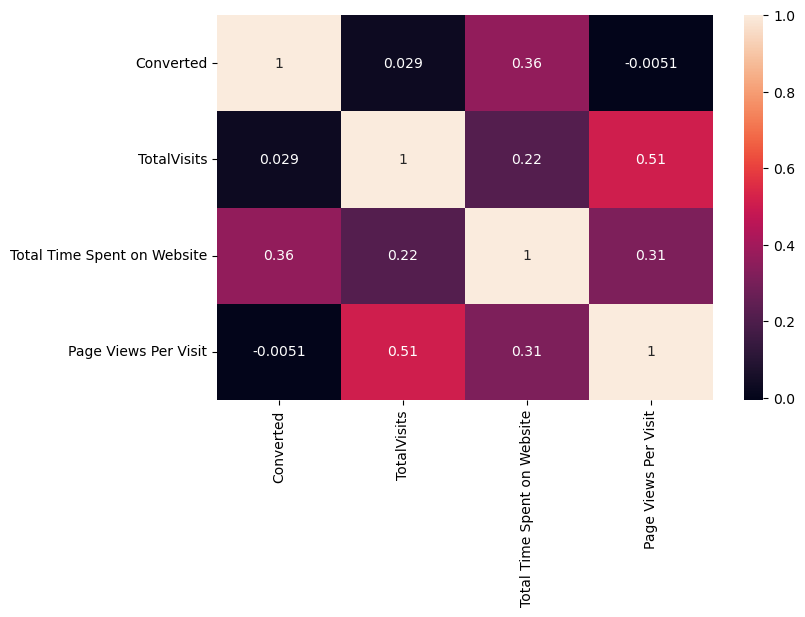

In [179]:
# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data= df_leads_new.corr(),annot= True)
plt.show()

#### Target - numeric

In [180]:
# Barplot
def target_numeric_bar(data,col):
    data.groupby(target_col)[col].mean().plot.bar(color= 'b')
    plt.ylabel(col)
    plt.show()

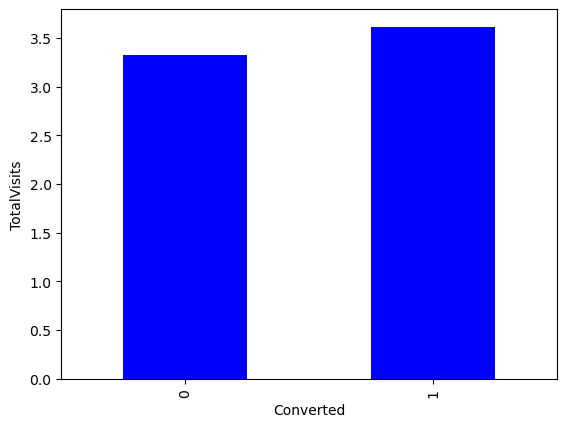

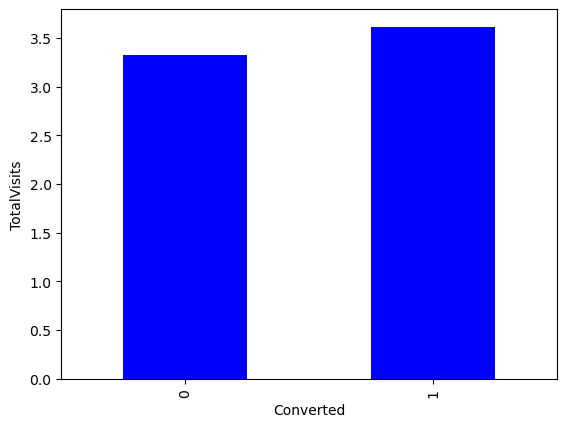

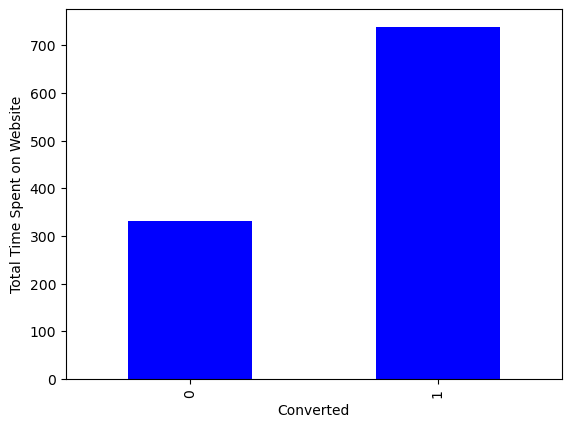

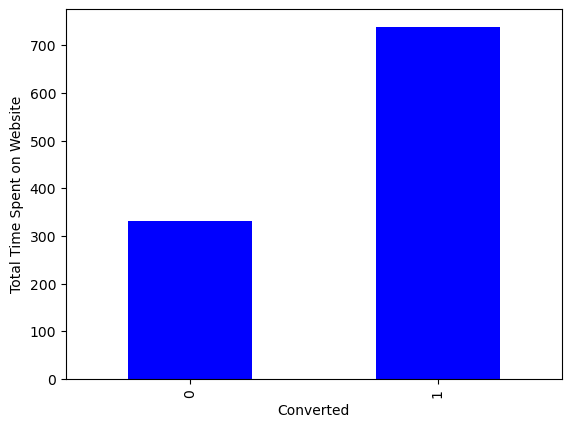

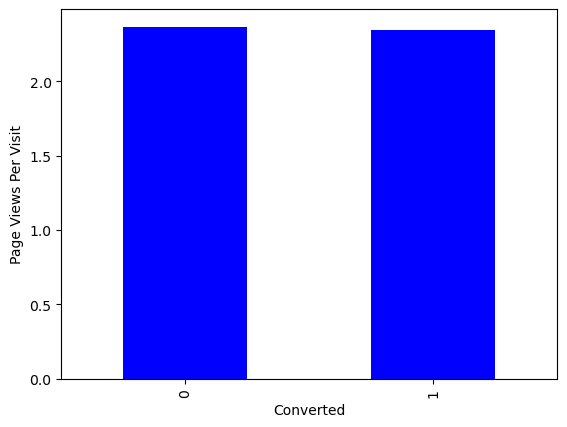

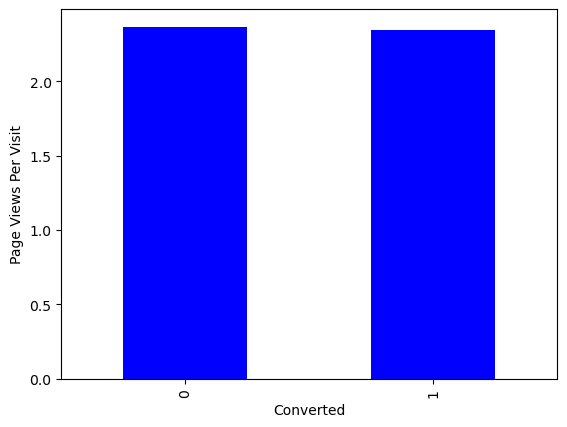

In [181]:
for column in num_cols:
    target_numeric_bar(df_leads_new, column)

#### Target - categorical

In [182]:
# Barplot
def target_categorical_bar(data, col):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Create a 1x2 subplot grid

    # First subplot - Distribution Percentage
    (data[col].value_counts(normalize=True) * 100).plot.bar(color='#33FFC4', ax=axs[0])
    axs[0].set_title(col + ' Distribution Percentage')

    # Second subplot - Conversion Percentage
    data.groupby(col)[target_col].mean().plot.bar(color='#33FFC4', ax=axs[1])
    axs[1].set_title(col + ' Conversion Percentage')

    plt.tight_layout()  # Adjust subplot layout for better spacing
    plt.show()

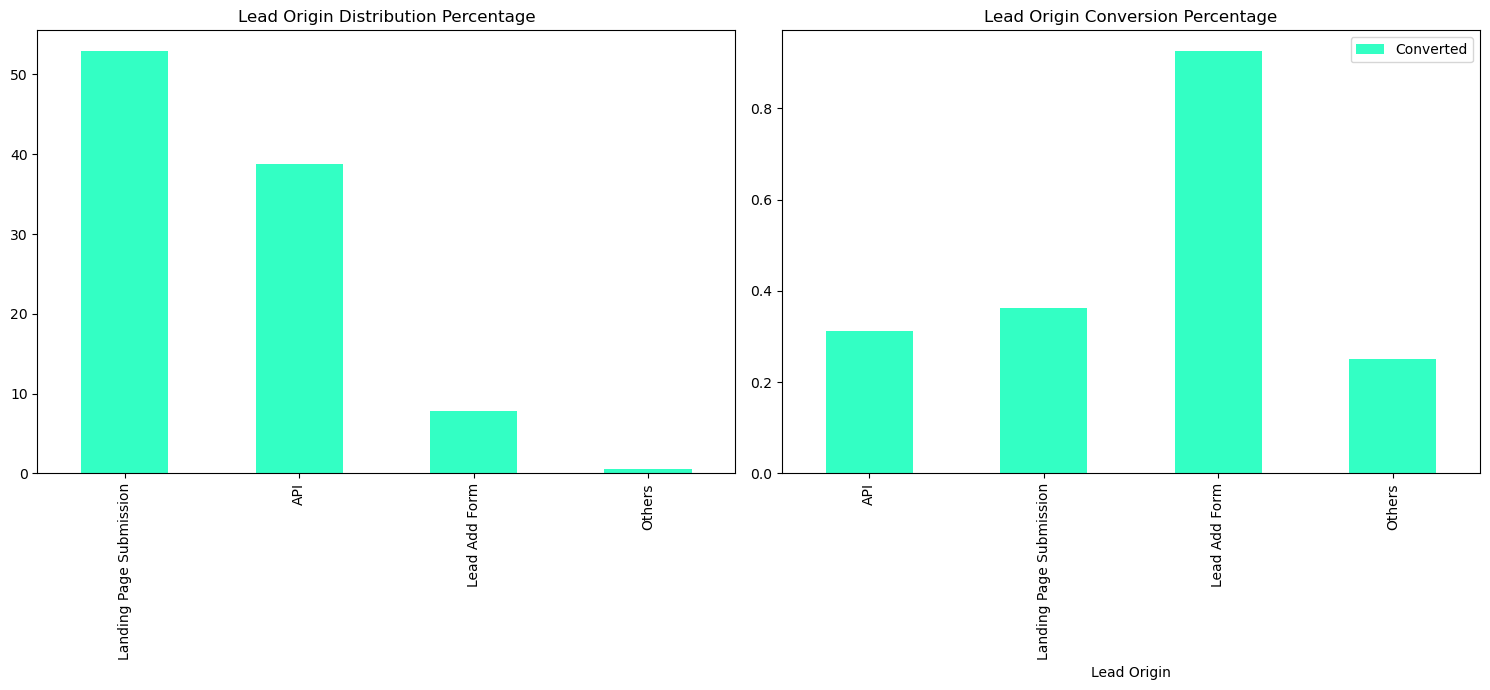

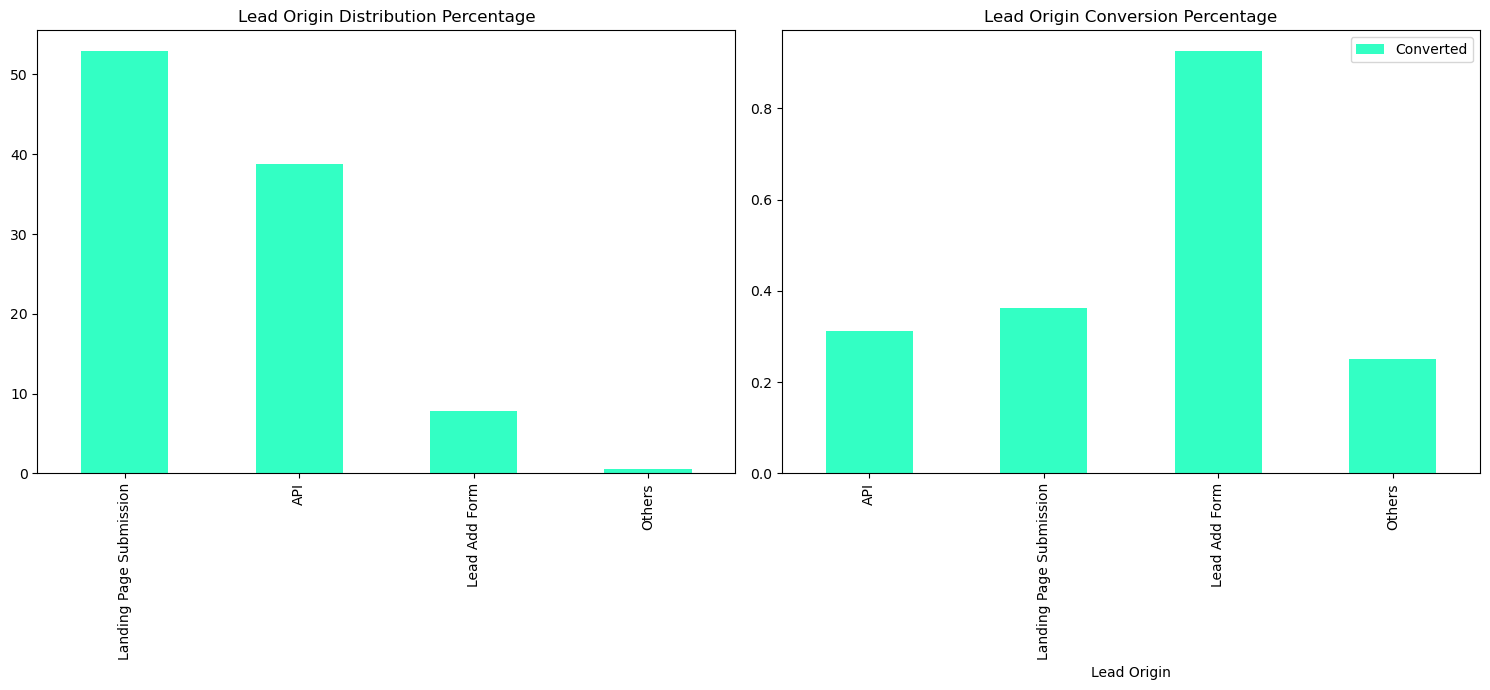

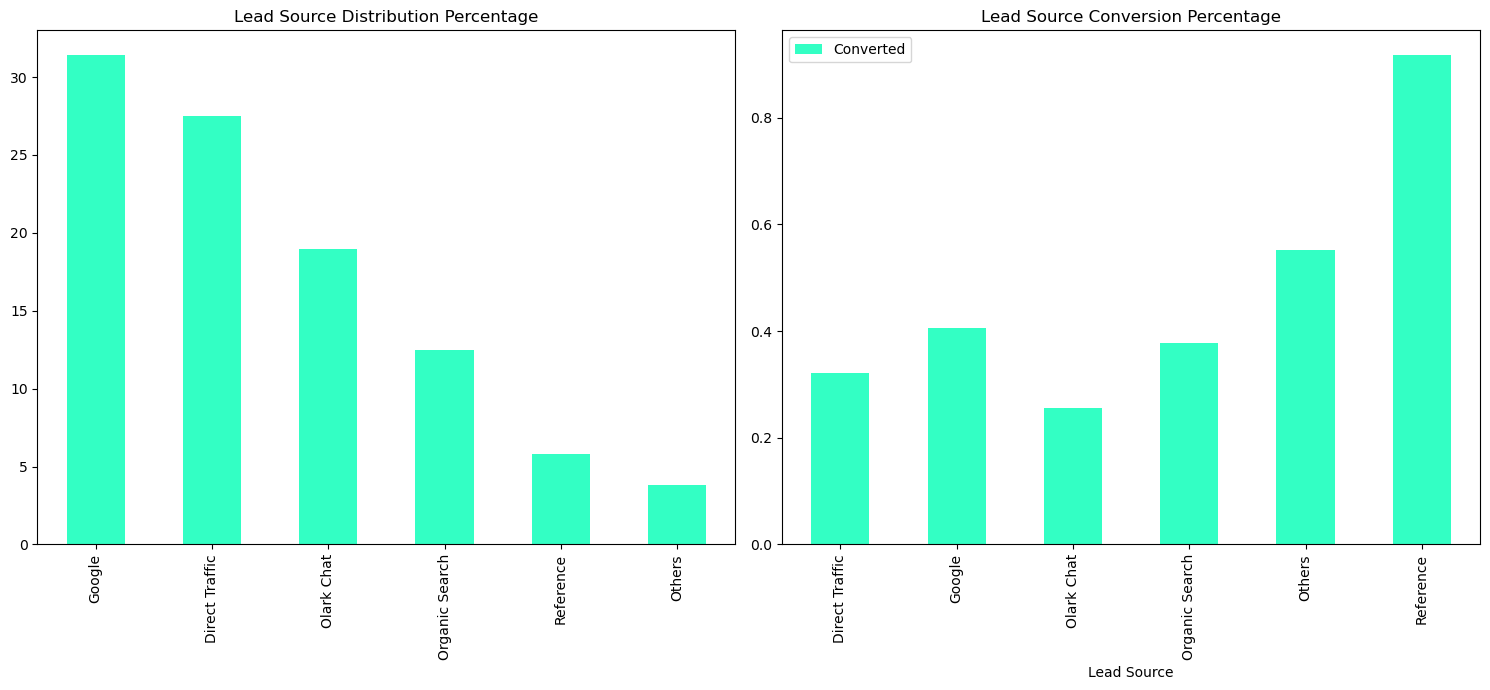

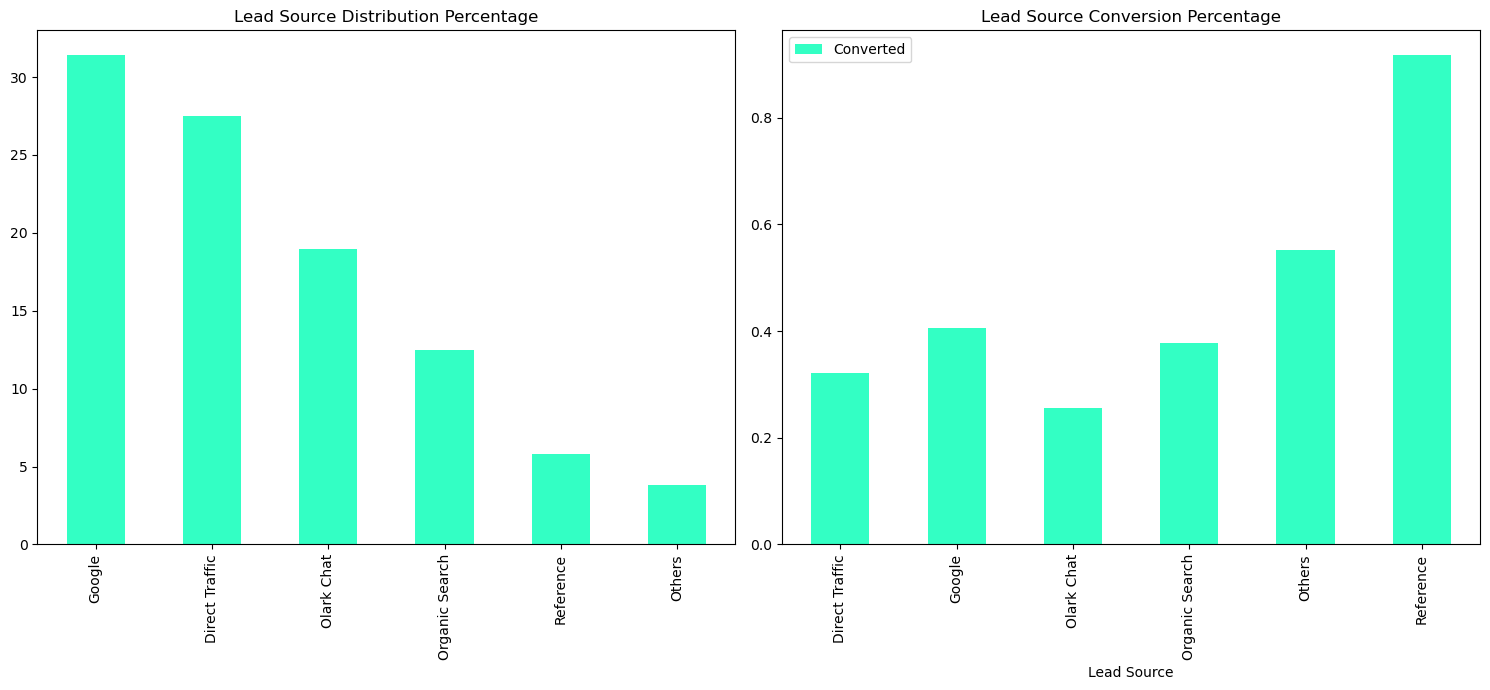

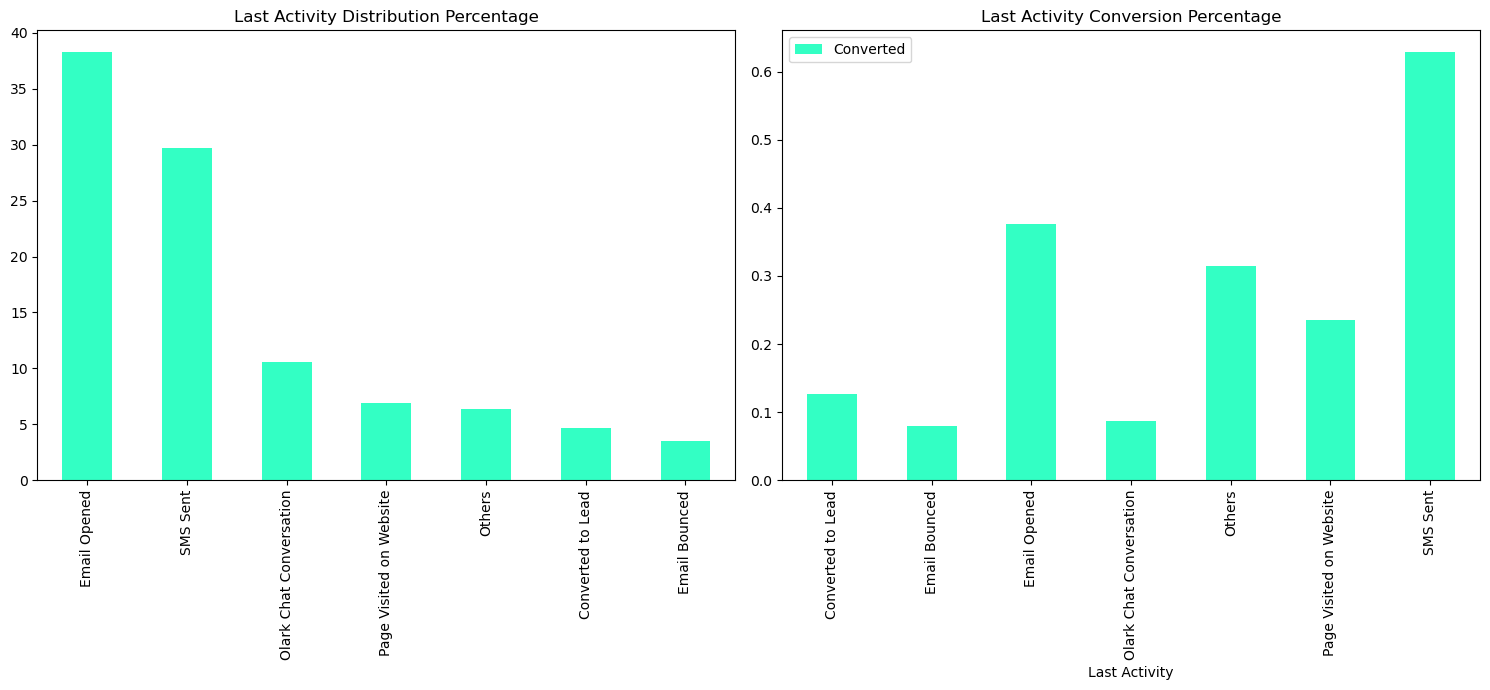

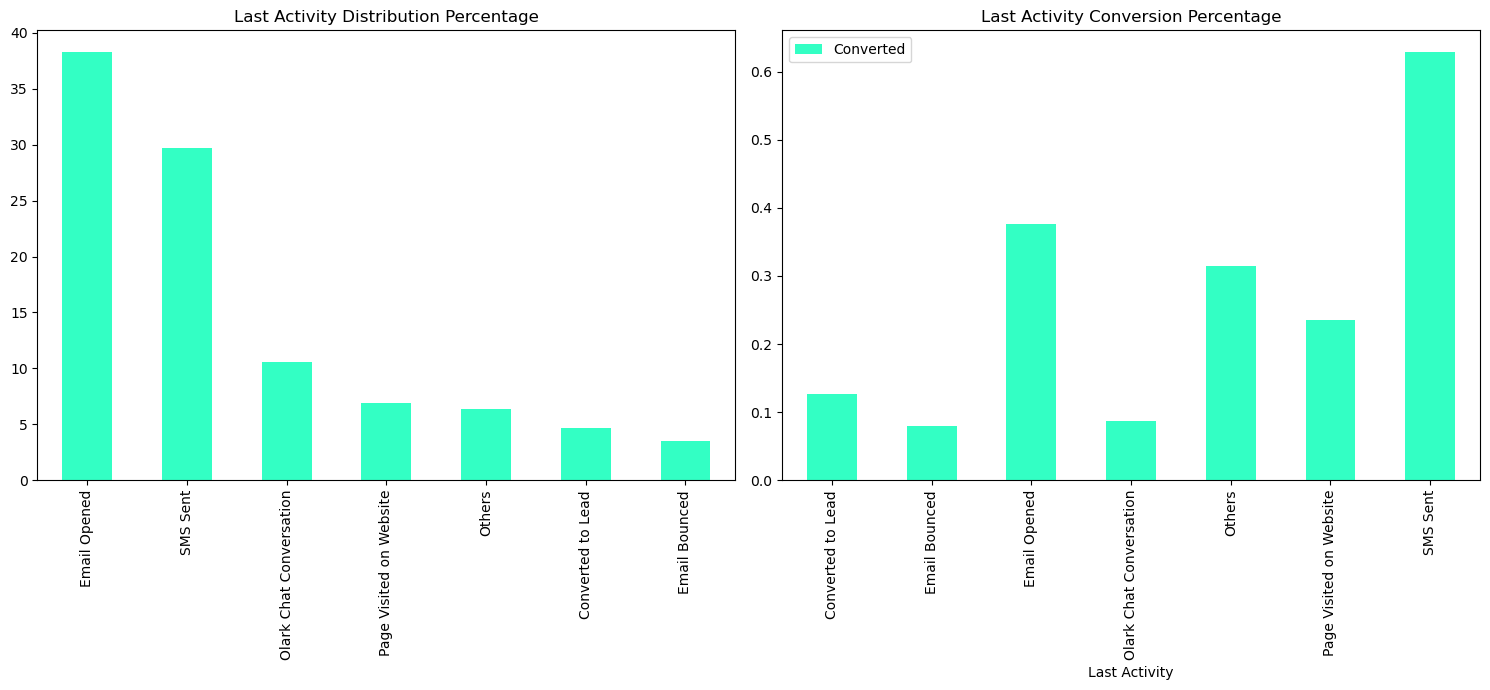

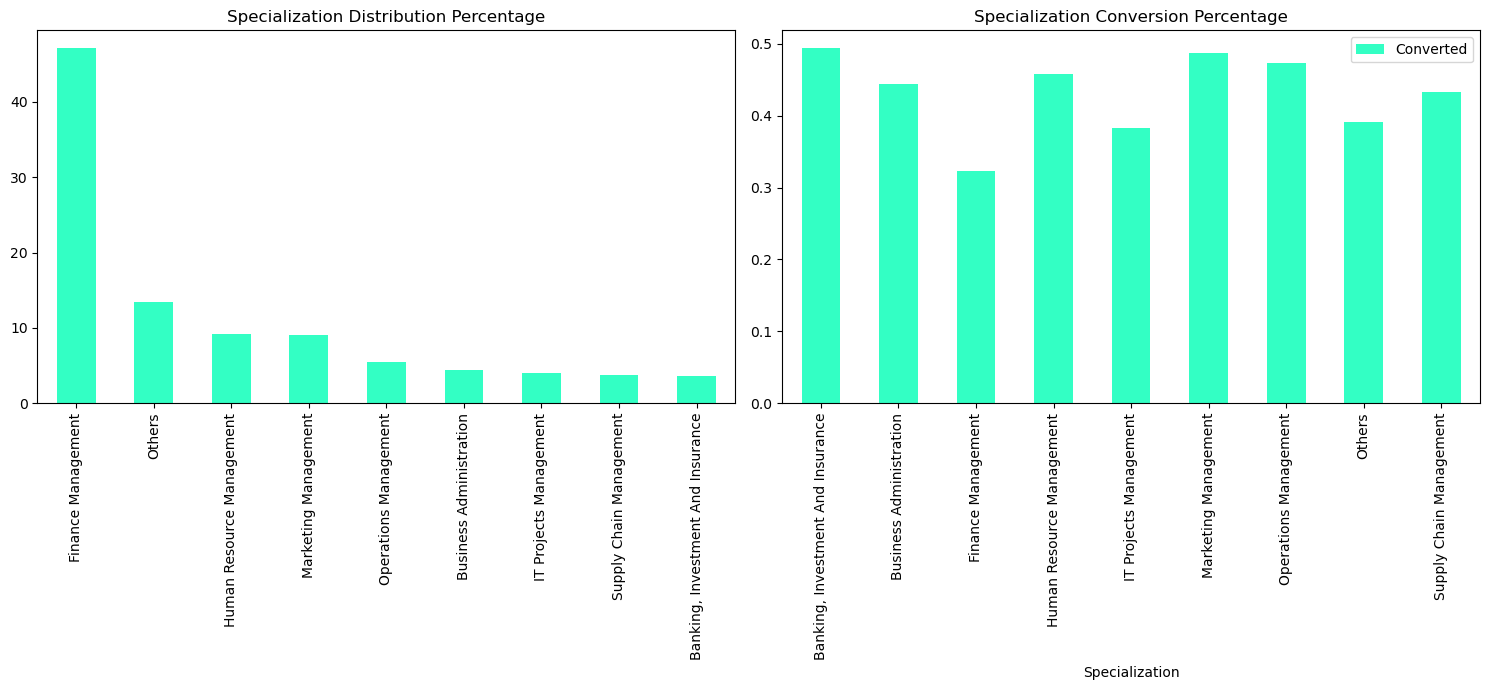

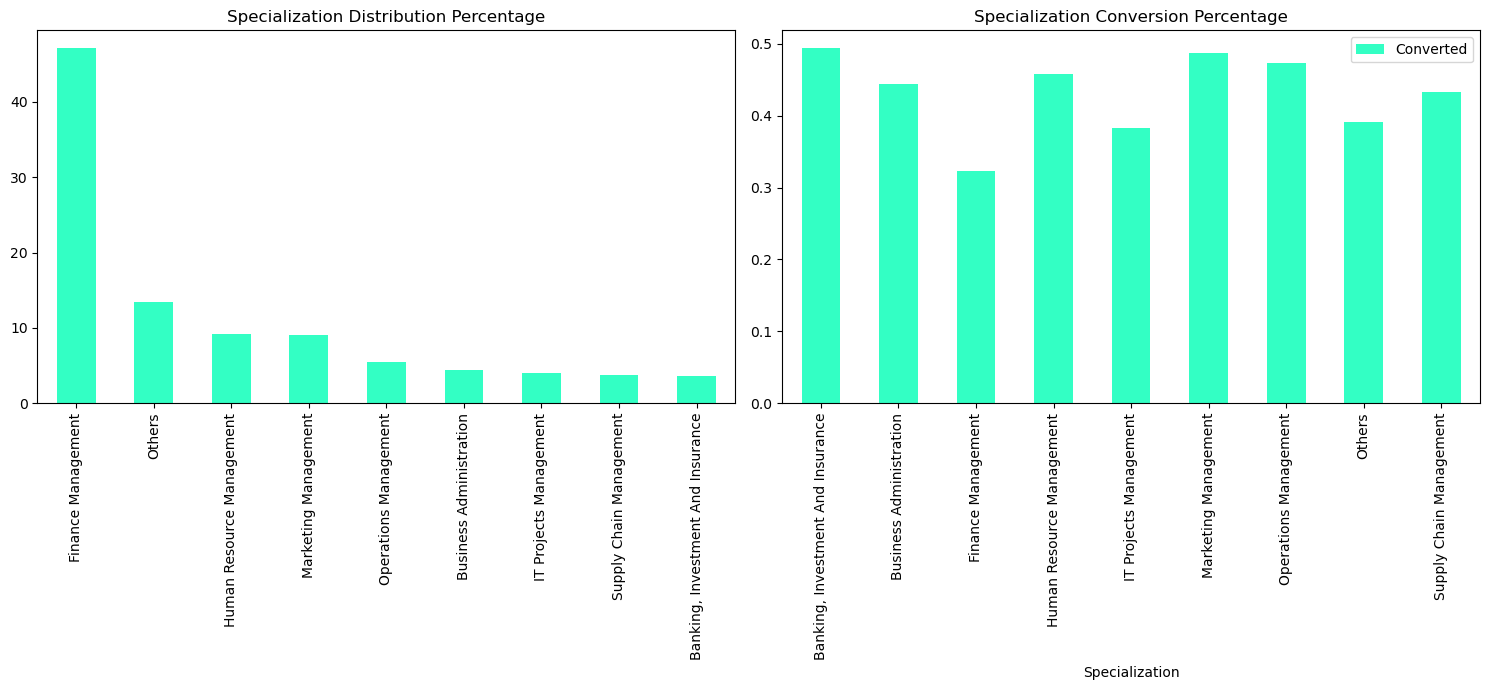

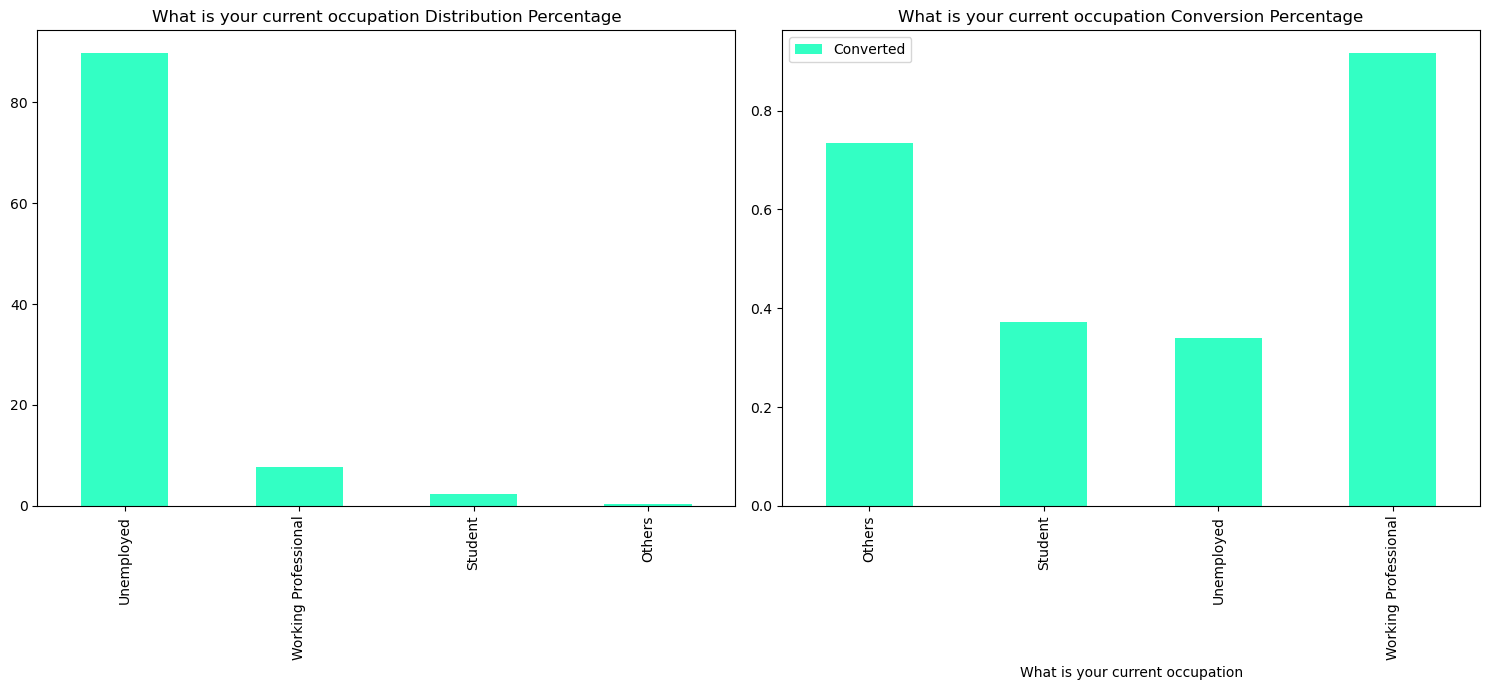

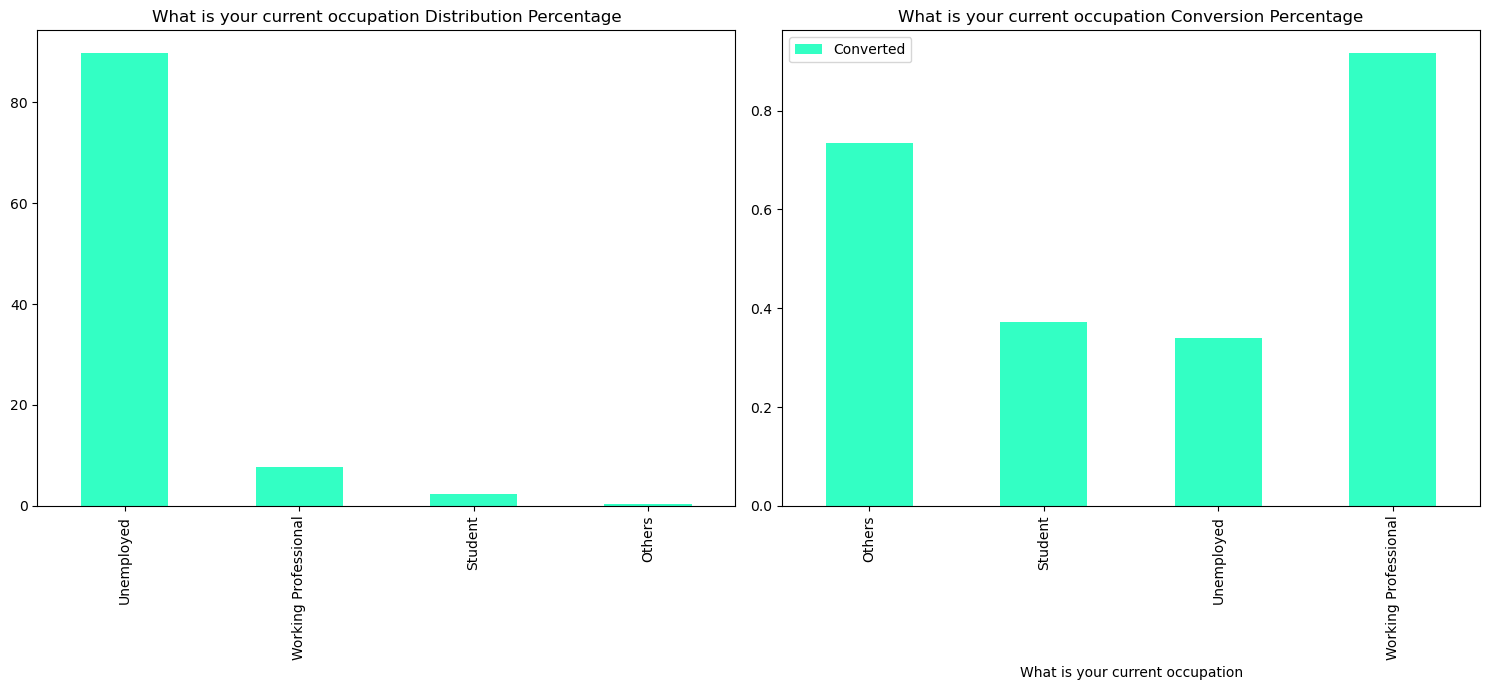

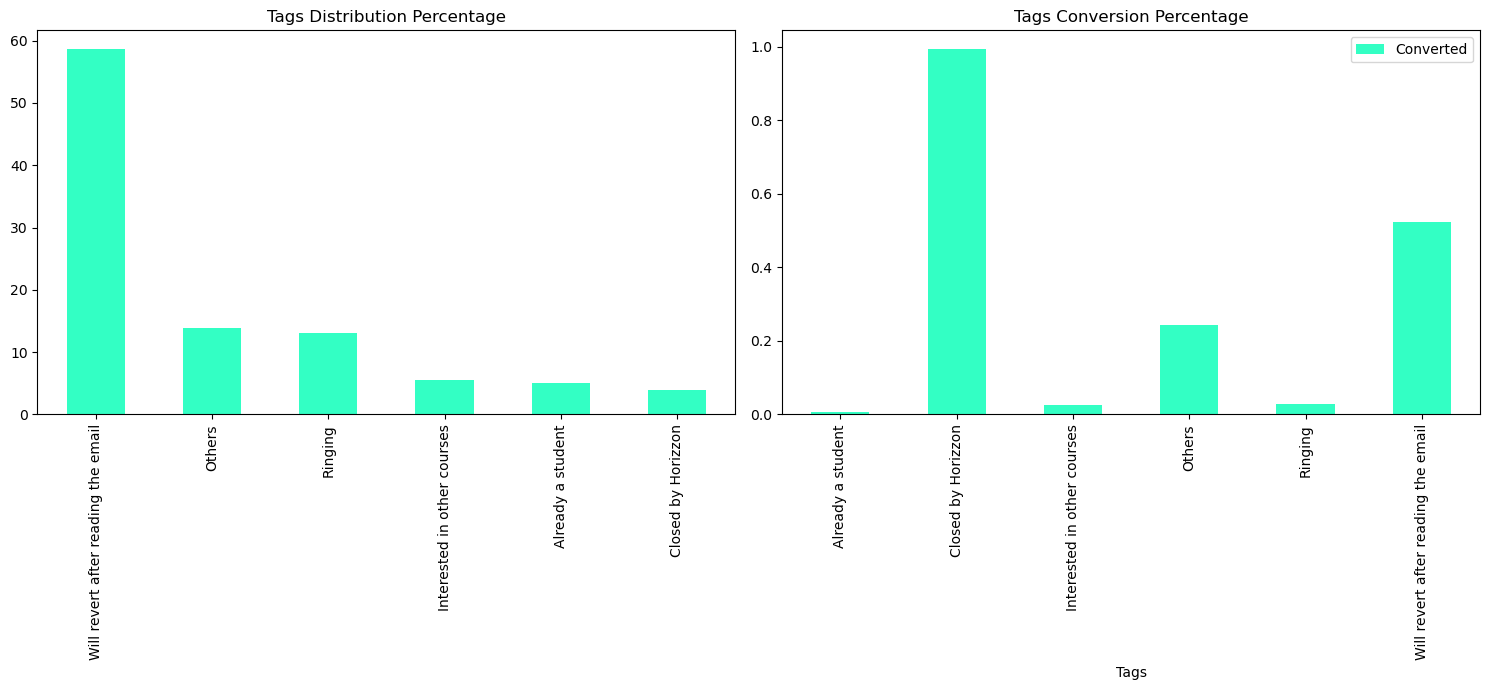

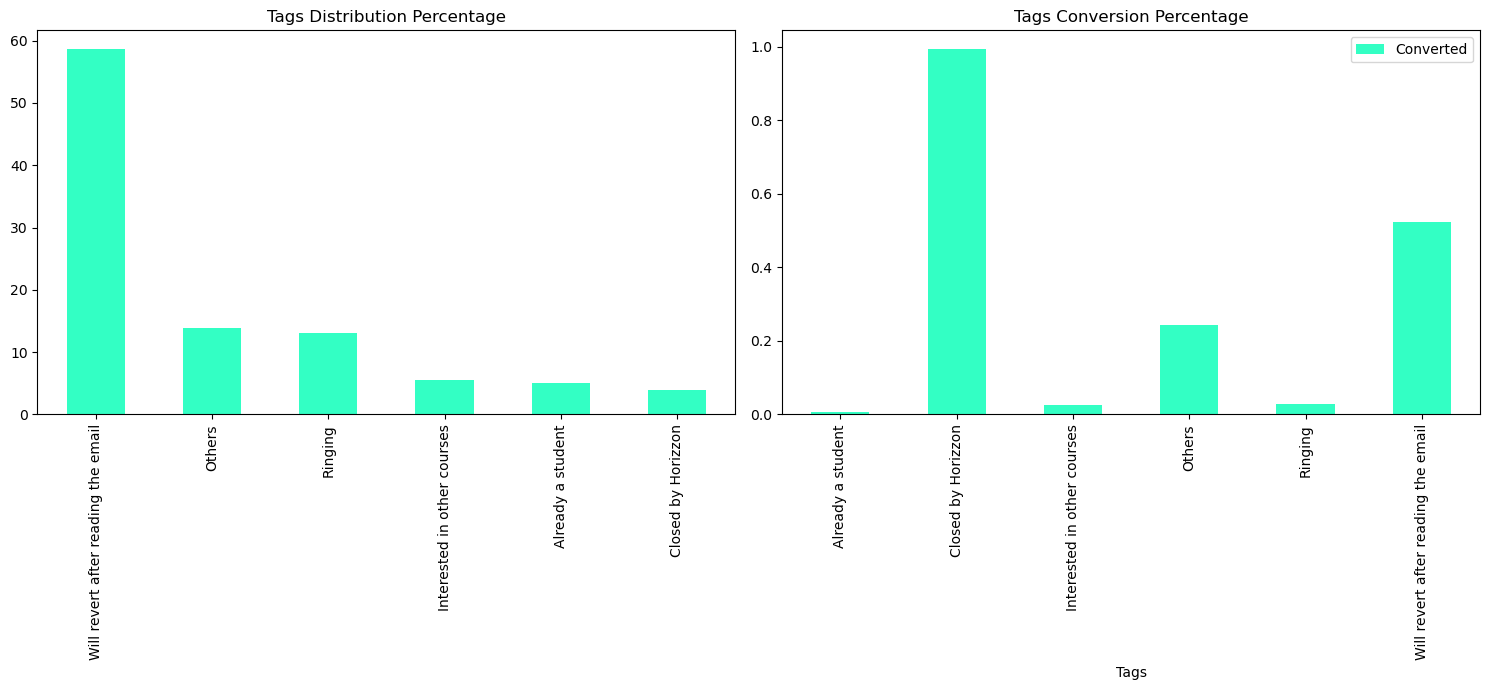

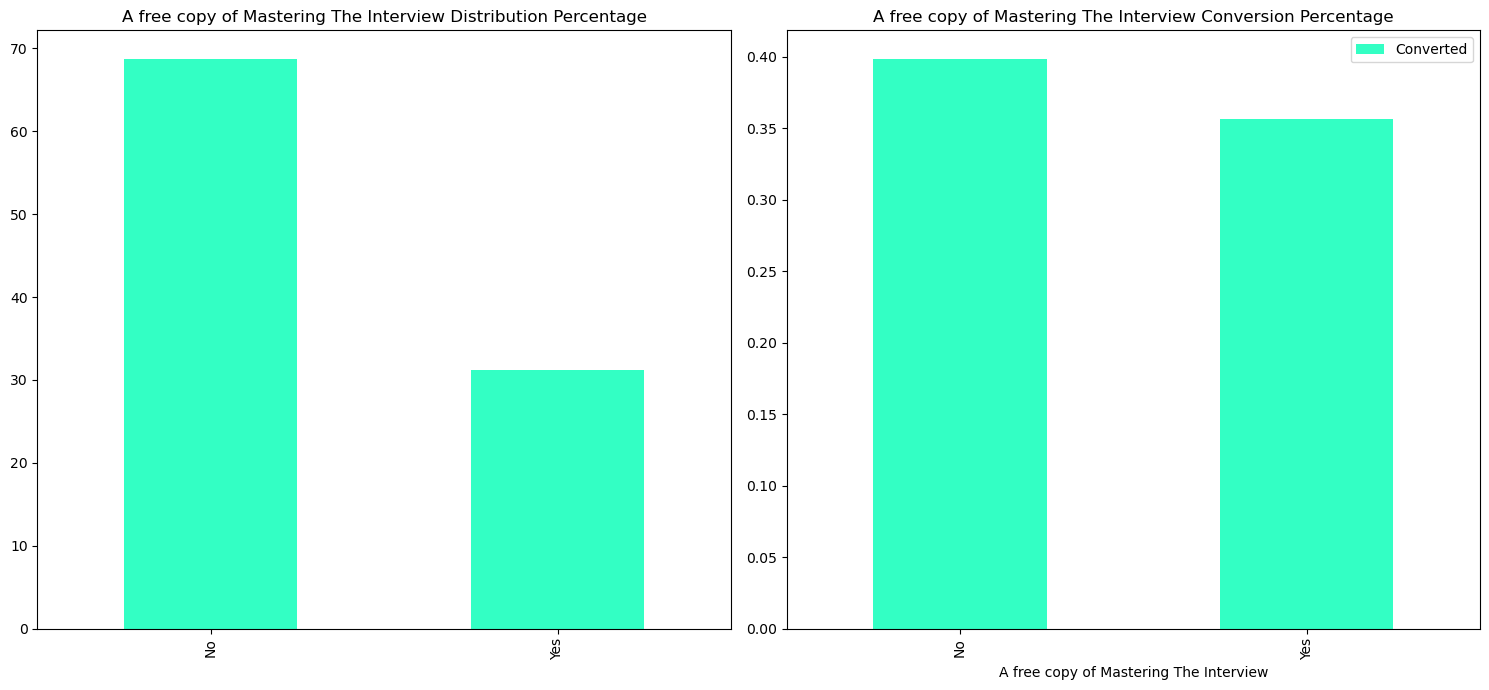

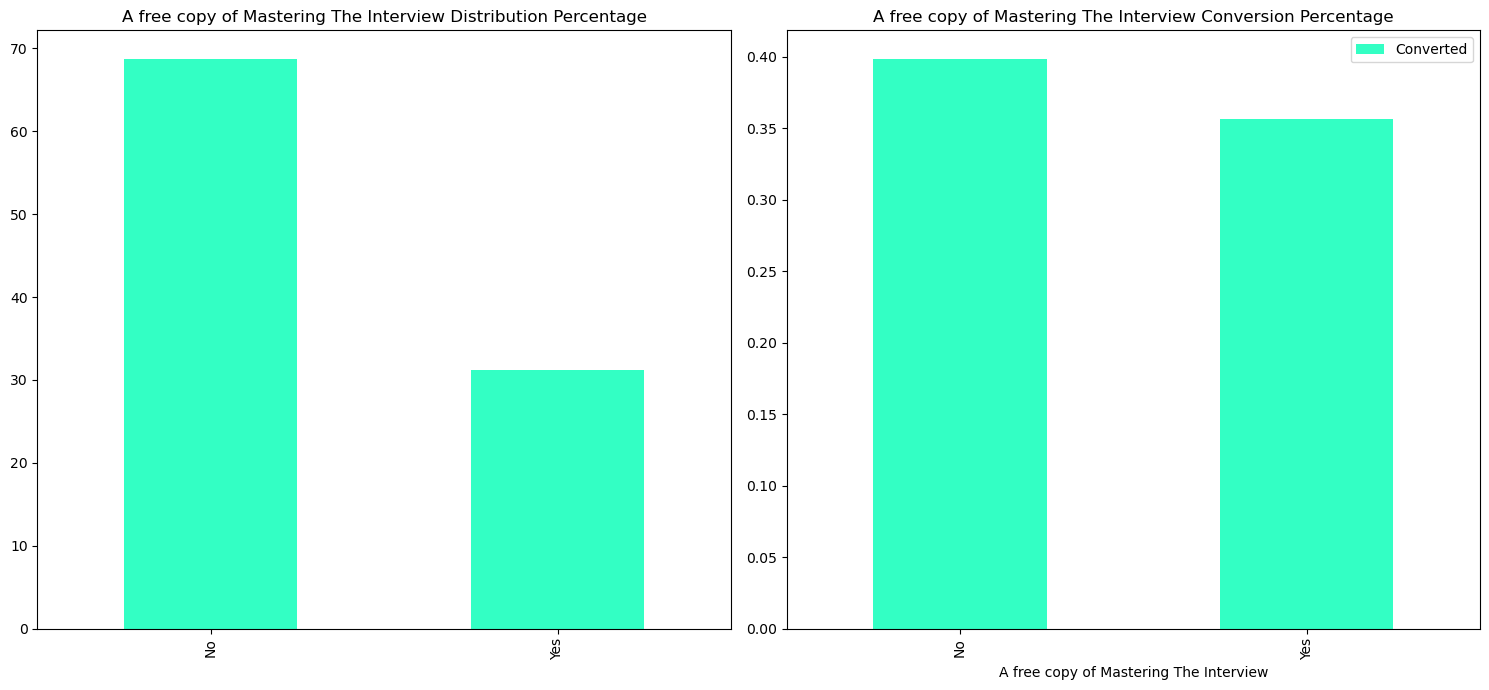

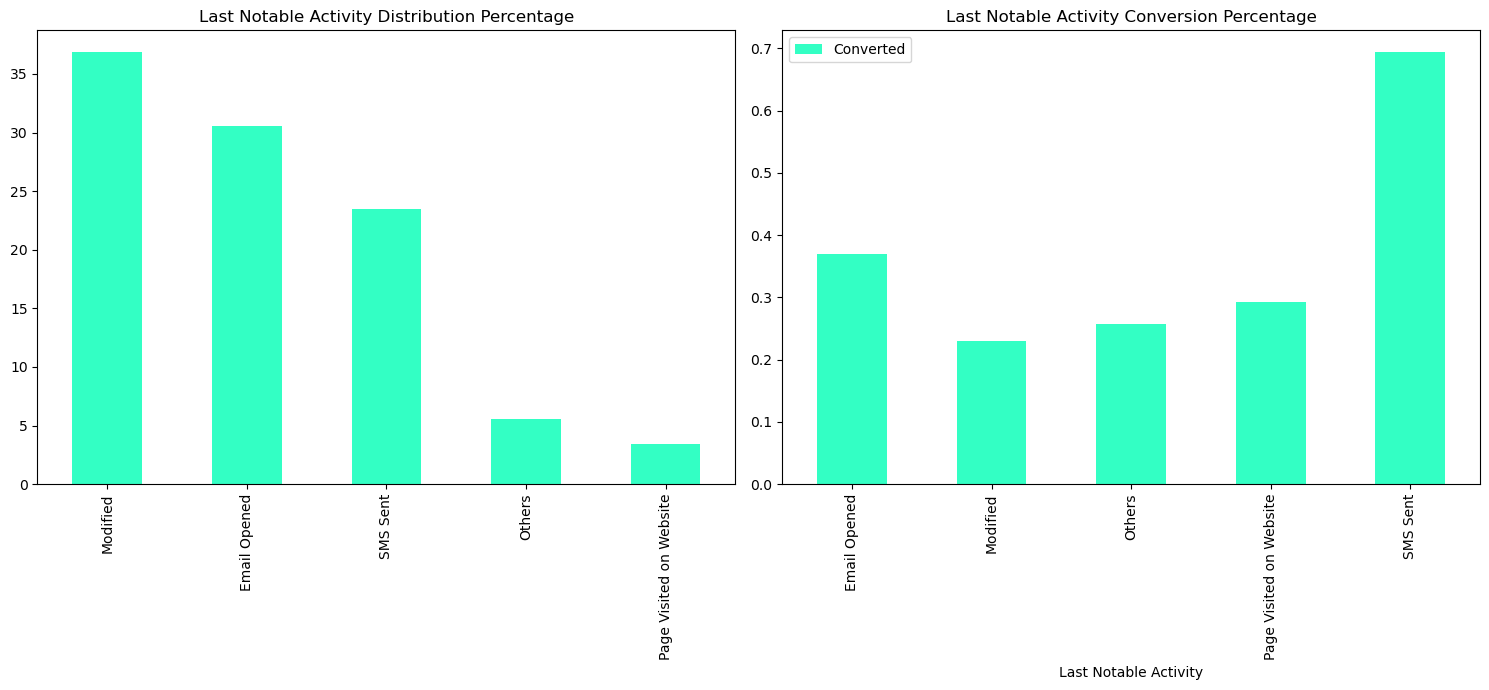

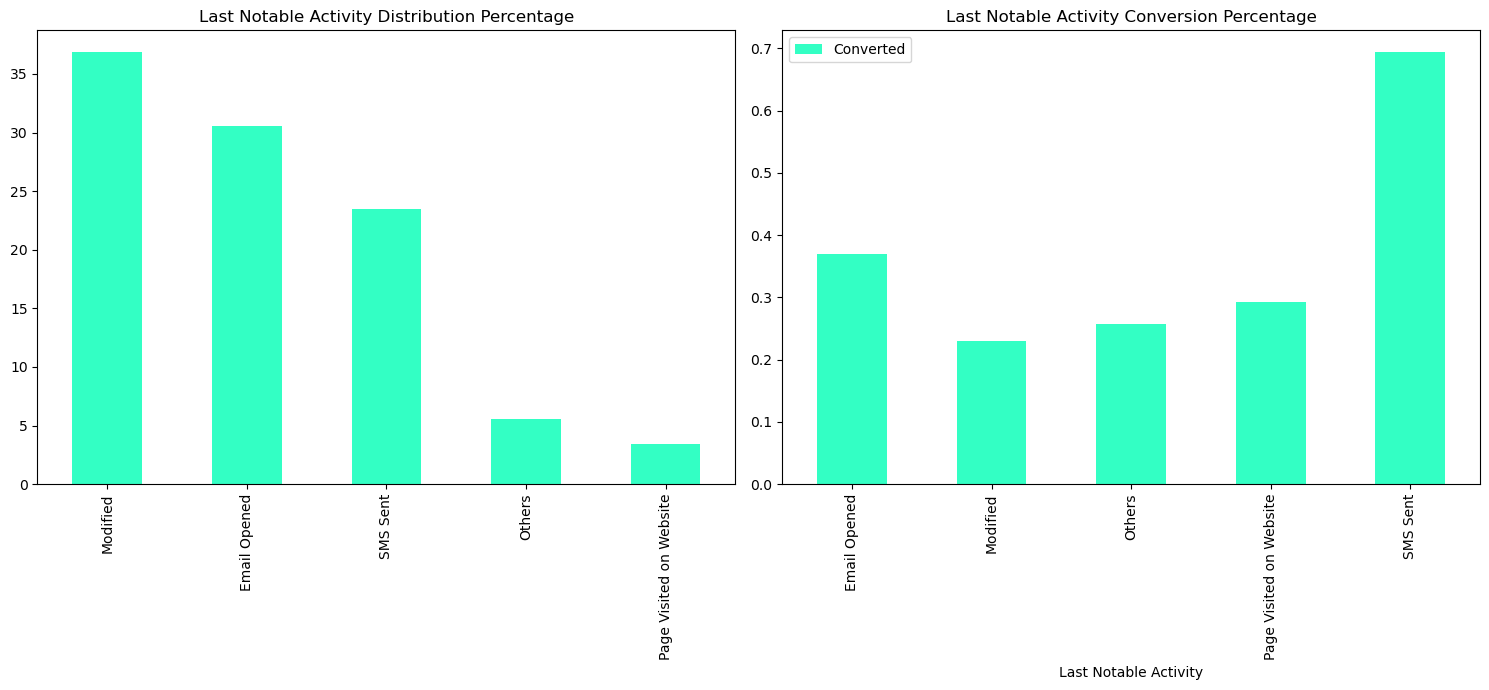

In [183]:
for column in cat_cols:
    target_categorical_bar(df_leads_new, column)

## Insights from EDA
<hr/>

<b><font color='green'><font size='3'>1. Maximum distribution of lead origin belongs to Landing page submission. But the maximum lead origin distribution belongs to Lead add form.<br>
2. Maximum distribution of lead source belongs to google. But the maximum converted leads have came through references.<br>
3. Very few leads belong from the banking, investment and insurance domain. But this particular domain has the highest lead conversion rate.<br>
4. Most of the converted leads are working professionals.<br></font></b>

### Create dummies for the categorical variables
<hr/>

1. Check the different value counts in a particular column
2. Create dummies for the particular column
3. Drop the column that points to the level which has least value counts in that prticular column

In [184]:
# Check value counts in all the categorical columns
for i in cat_cols:
    print('******************************')
    print(df_leads_new[i].value_counts(normalize= True))

******************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64
******************************
Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.037879
Name: Lead Source, dtype: float64
******************************
Email Opened               0.383117
SMS Sent                   0.297078
Olark Chat Conversation    0.105303
Page Visited on Website    0.069264
Others                     0.063636
Converted to Lead          0.046320
Email Bounced              0.035281
Name: Last Activity, dtype: float64
******************************
Finance Management                   0.471429
Others                               0.134091
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management         

In [185]:
# Create dummies
# Lead Origin
x = pd.get_dummies(df_leads_new['Lead Origin'],prefix= 'LeadOrigin')
x = x.drop('LeadOrigin_Others', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('Lead Origin', axis= 1)

In [186]:
# Lead Source
x = pd.get_dummies(df_leads_new['Lead Source'],prefix= 'LeadSource')
x = x.drop('LeadSource_Others', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('Lead Source', axis= 1)

In [187]:
# Last Activity
x = pd.get_dummies(df_leads_new['Last Activity'],prefix= 'LastActivity')
x = x.drop('LastActivity_Email Bounced', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('Last Activity', axis= 1)

In [188]:
# Specialization
x = pd.get_dummies(df_leads_new['Specialization'],prefix= 'Specialization')
x = x.drop('Specialization_Banking, Investment And Insurance', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('Specialization', axis= 1)

In [189]:
# What is your current occupation
x = pd.get_dummies(df_leads_new['What is your current occupation'],prefix= 'Occupation')
x = x.drop('Occupation_Others', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('What is your current occupation', axis= 1)

In [190]:
# Tags
x = pd.get_dummies(df_leads_new['Tags'],prefix= 'Tags')
x = x.drop('Tags_Closed by Horizzon', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('Tags', axis= 1)

In [191]:
# A free copy of Mastering The Interview
# This coilumn has two values (Yes/No).
# So, we will use Binary mapping {'No': 0, 'Yes': 1}
df_leads_new['A free copy of Mastering The Interview'] = df_leads_new['A free copy of Mastering The Interview'].map({'No': 0, 'Yes': 1})

In [192]:
# Last Notable Activity
x = pd.get_dummies(df_leads_new['Last Notable Activity'],prefix= 'NotableActivity')
x = x.drop('NotableActivity_Page Visited on Website', axis= 1)
df_leads_new = pd.concat([df_leads_new, x],axis= 1)
df_leads_new = df_leads_new.drop('Last Notable Activity', axis= 1)

## 4. Train - test split
<hr/>

In [193]:
# Define independent(X) & dependent(y) variables
y = df_leads_new.pop('Converted')
X = df_leads_new

In [194]:
# Train - test split
X_train, X_test, y_train, y_yest = train_test_split(X, y, train_size= 0.7, random_state= 42)

## 5. Feature scaling
<hr/>

In [195]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply the scaler on the numeric columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

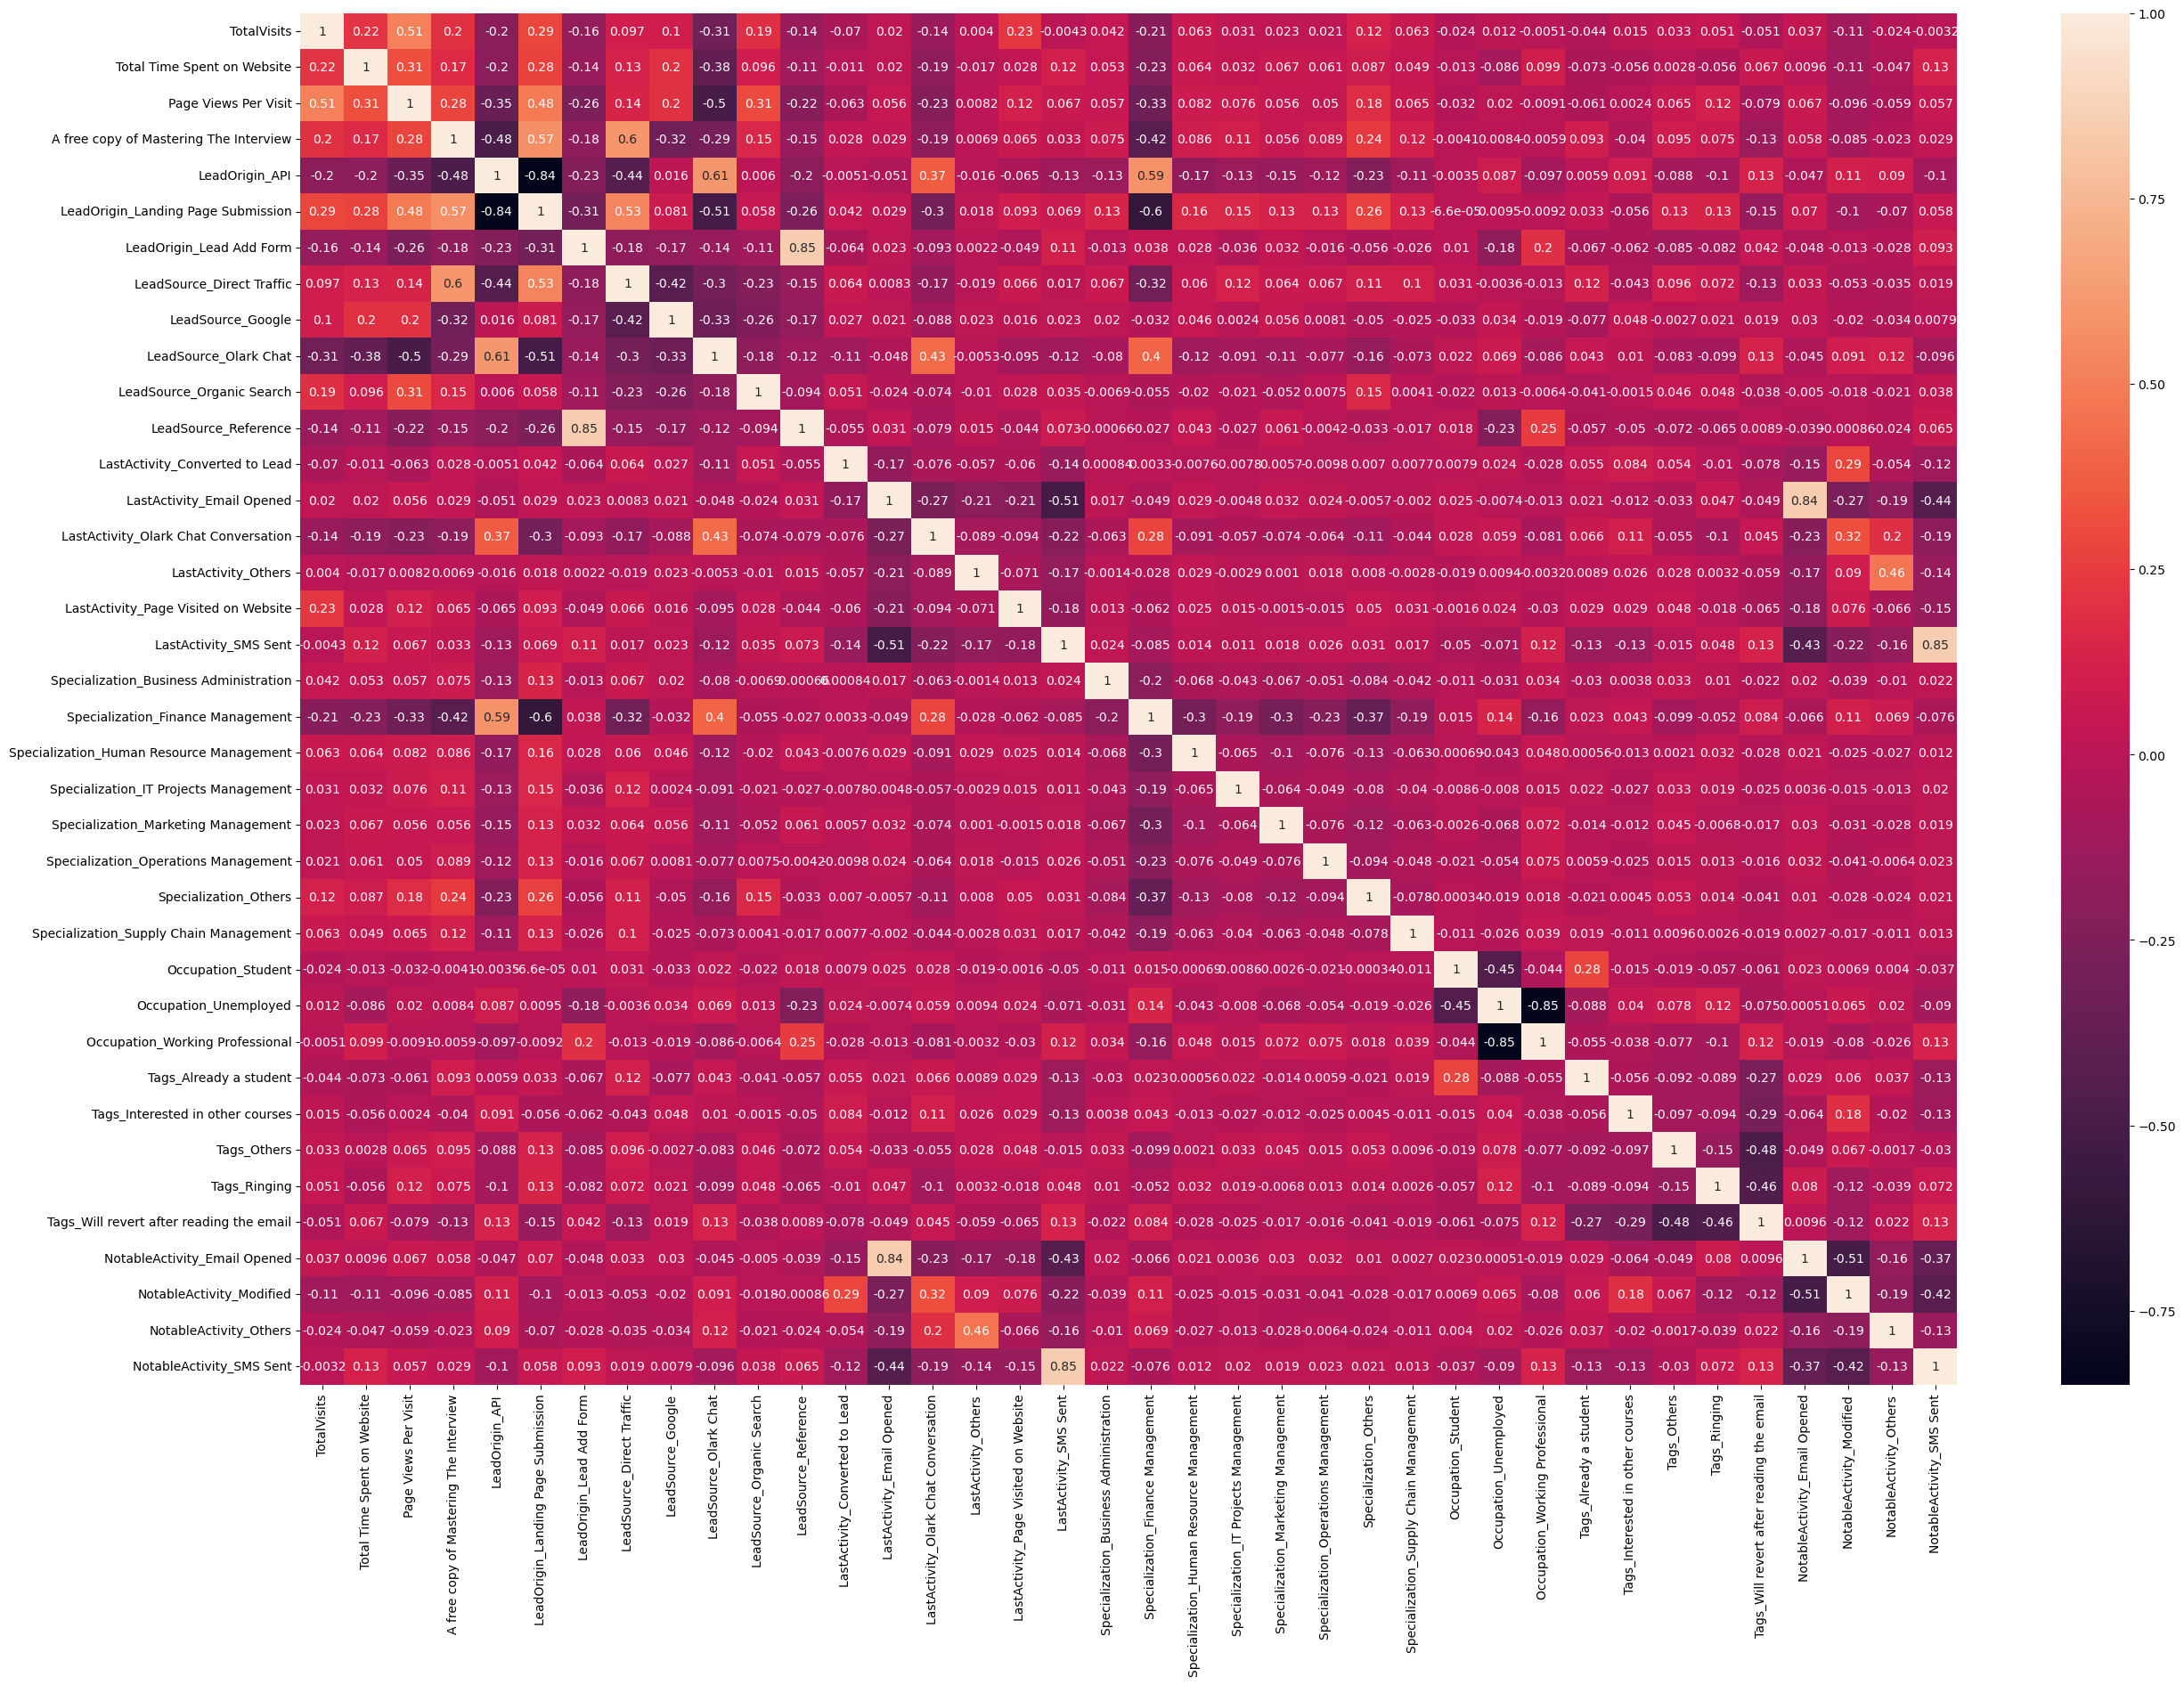

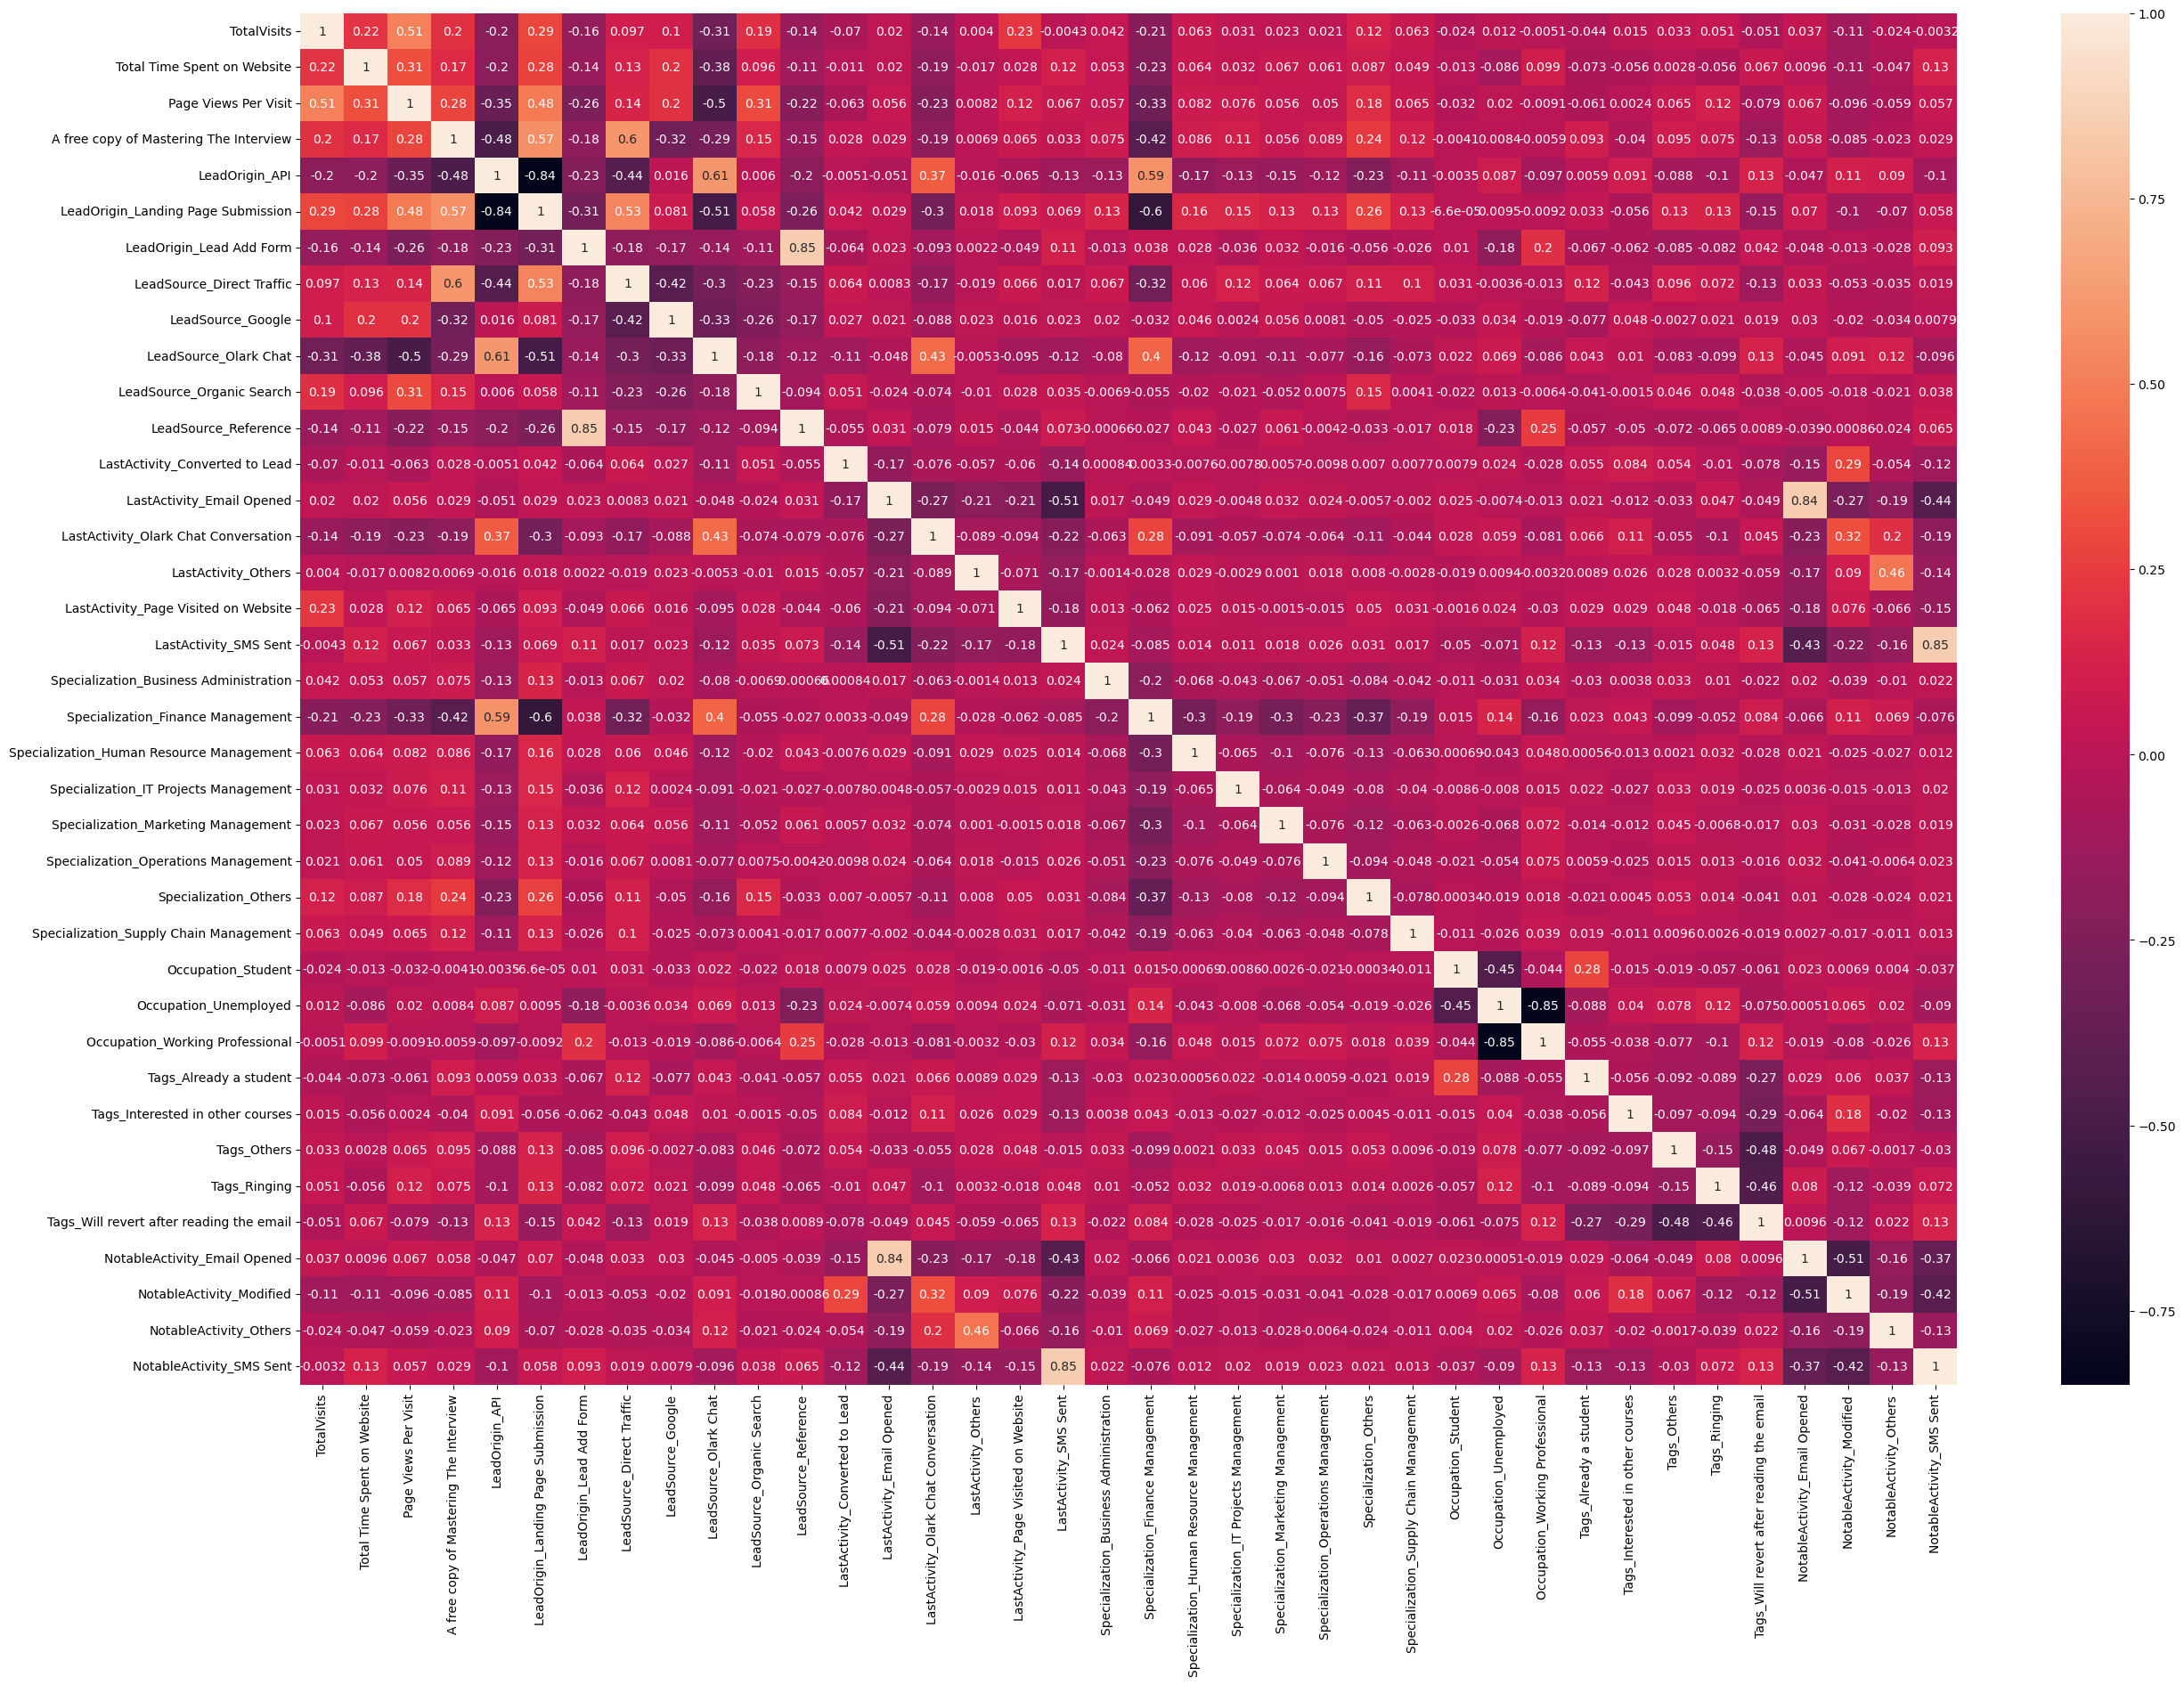

In [196]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))
sns.heatmap(df_leads_new.corr(),annot = True)
plt.show()

#### Drop highly correlated dummy variables

In [197]:
high_corr_dummies = ['NotableActivity_Email Opened','LeadOrigin_Lead Add Form','LastActivity_SMS Sent']
X_train = X_train.drop(high_corr_dummies, axis= 1)
X_test = X_test.drop(high_corr_dummies, axis= 1)

#### Check correlation matrix again

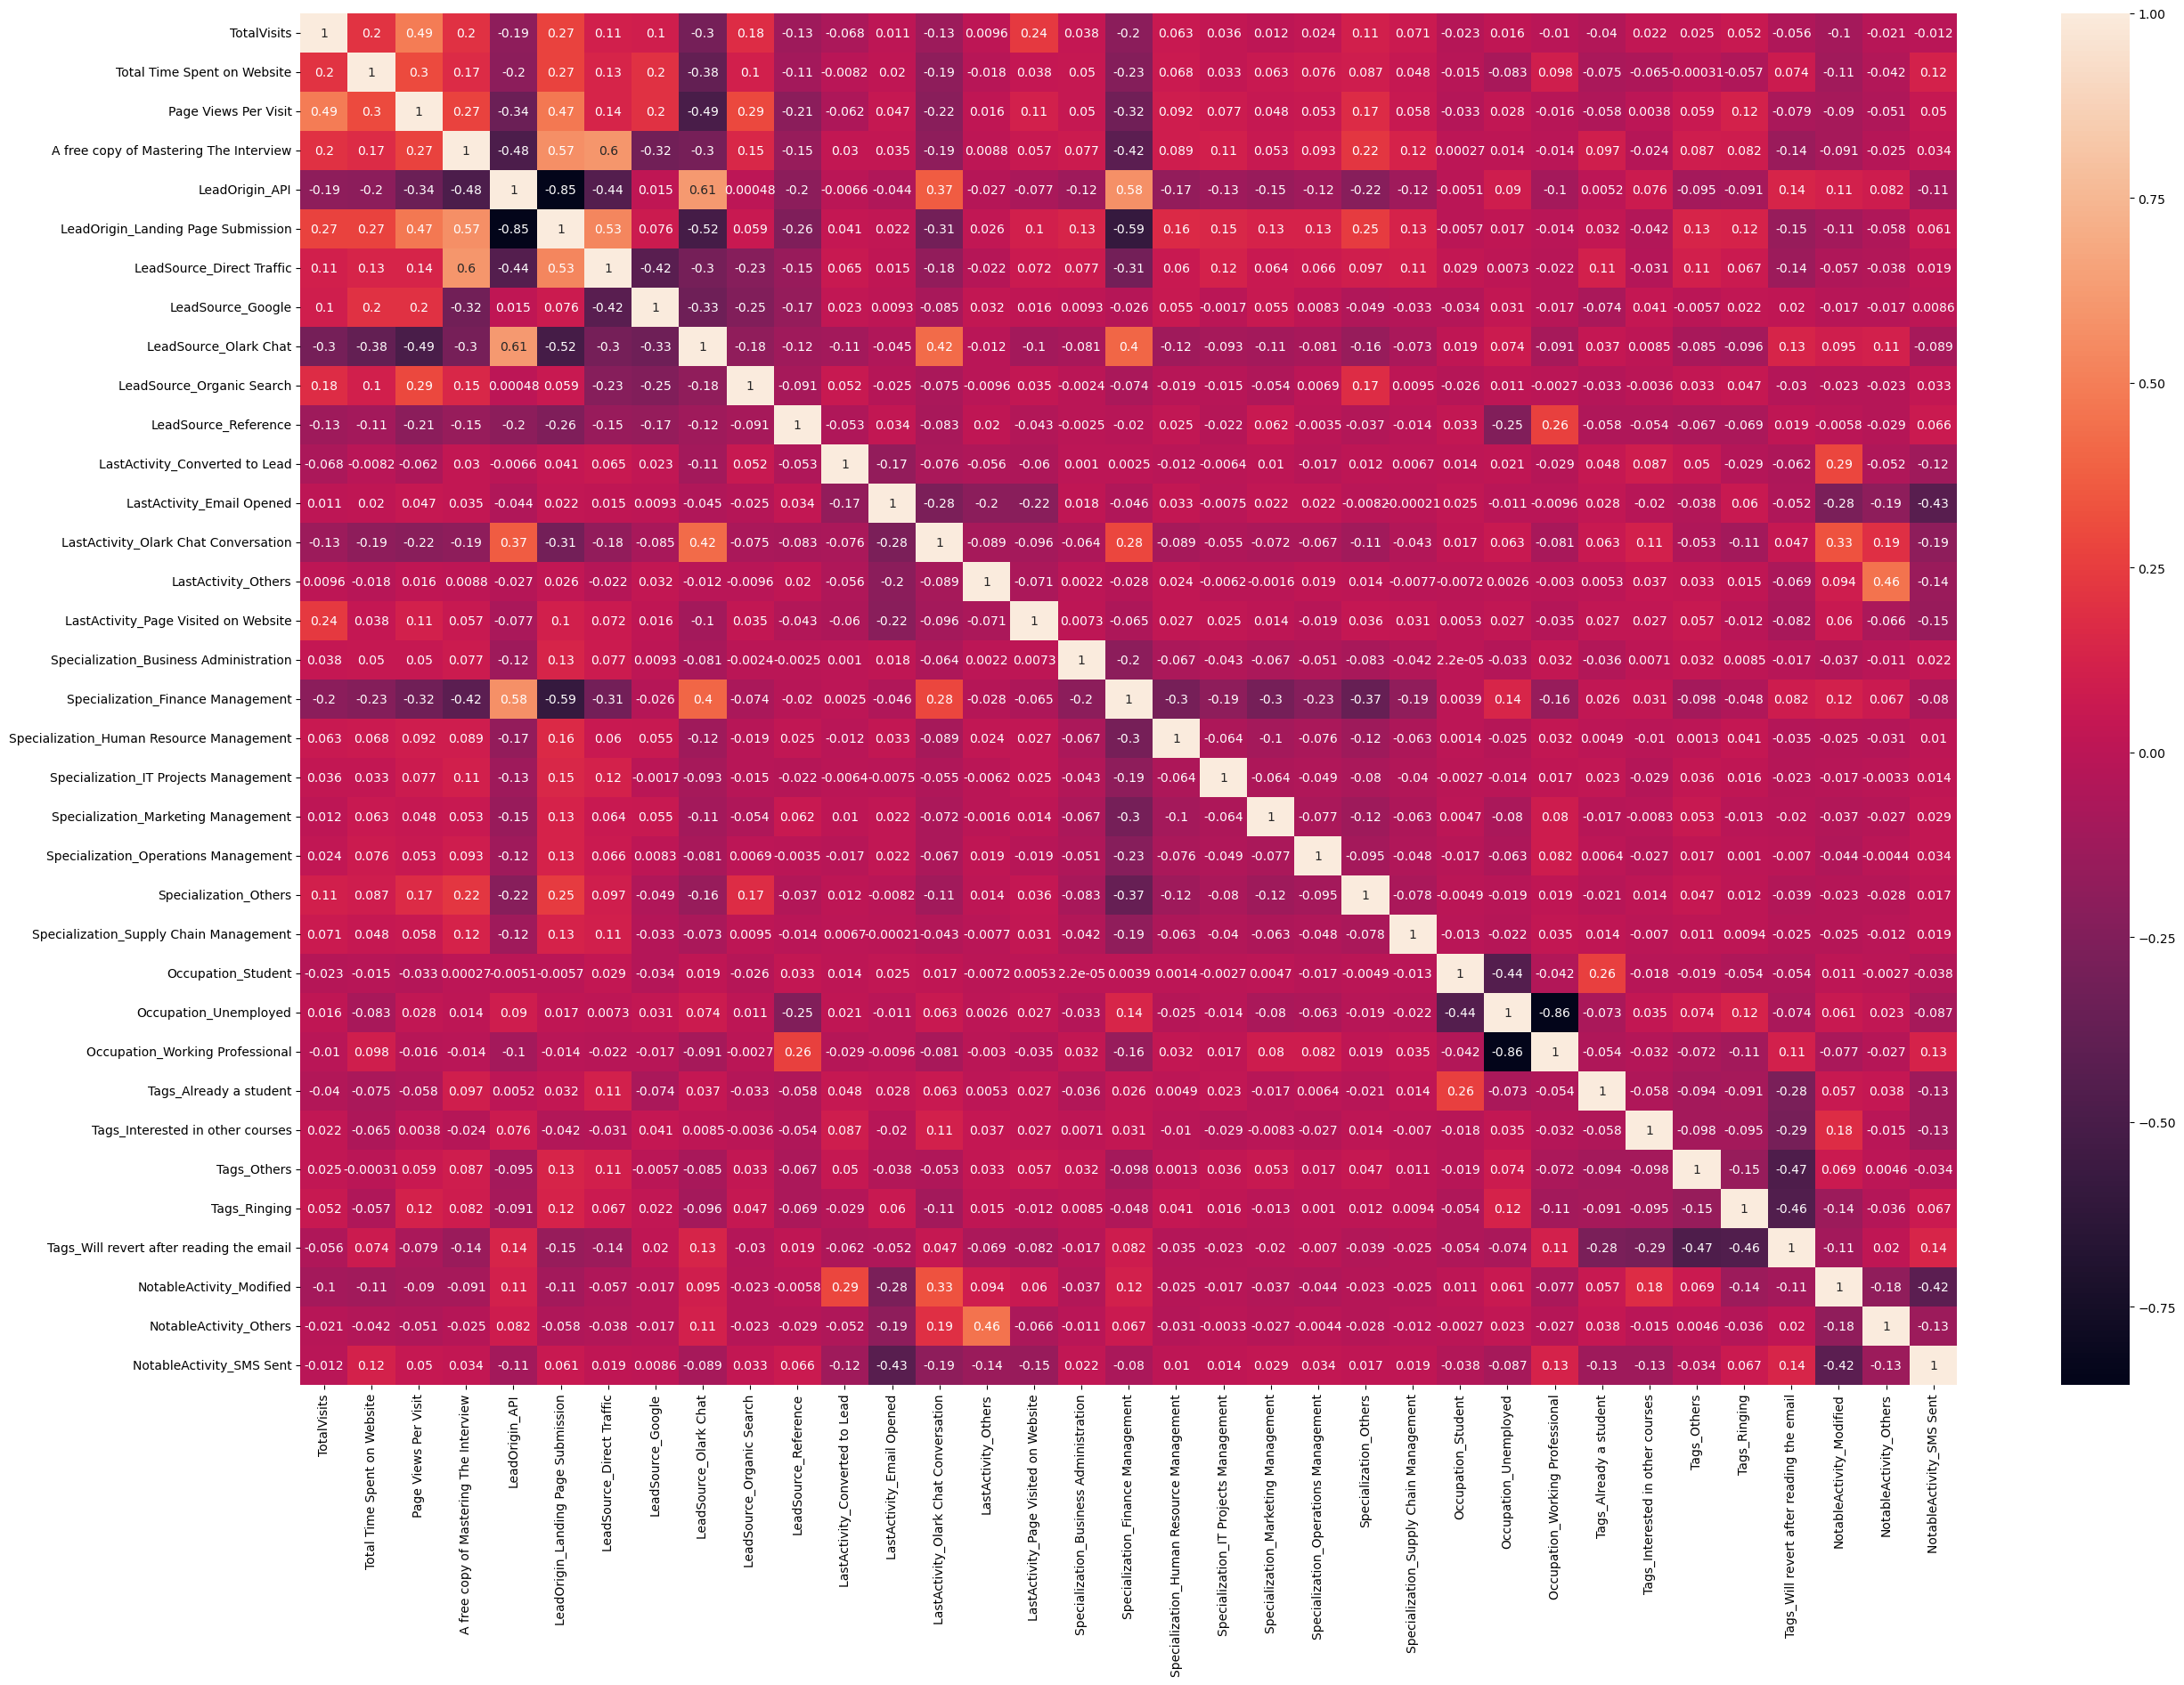

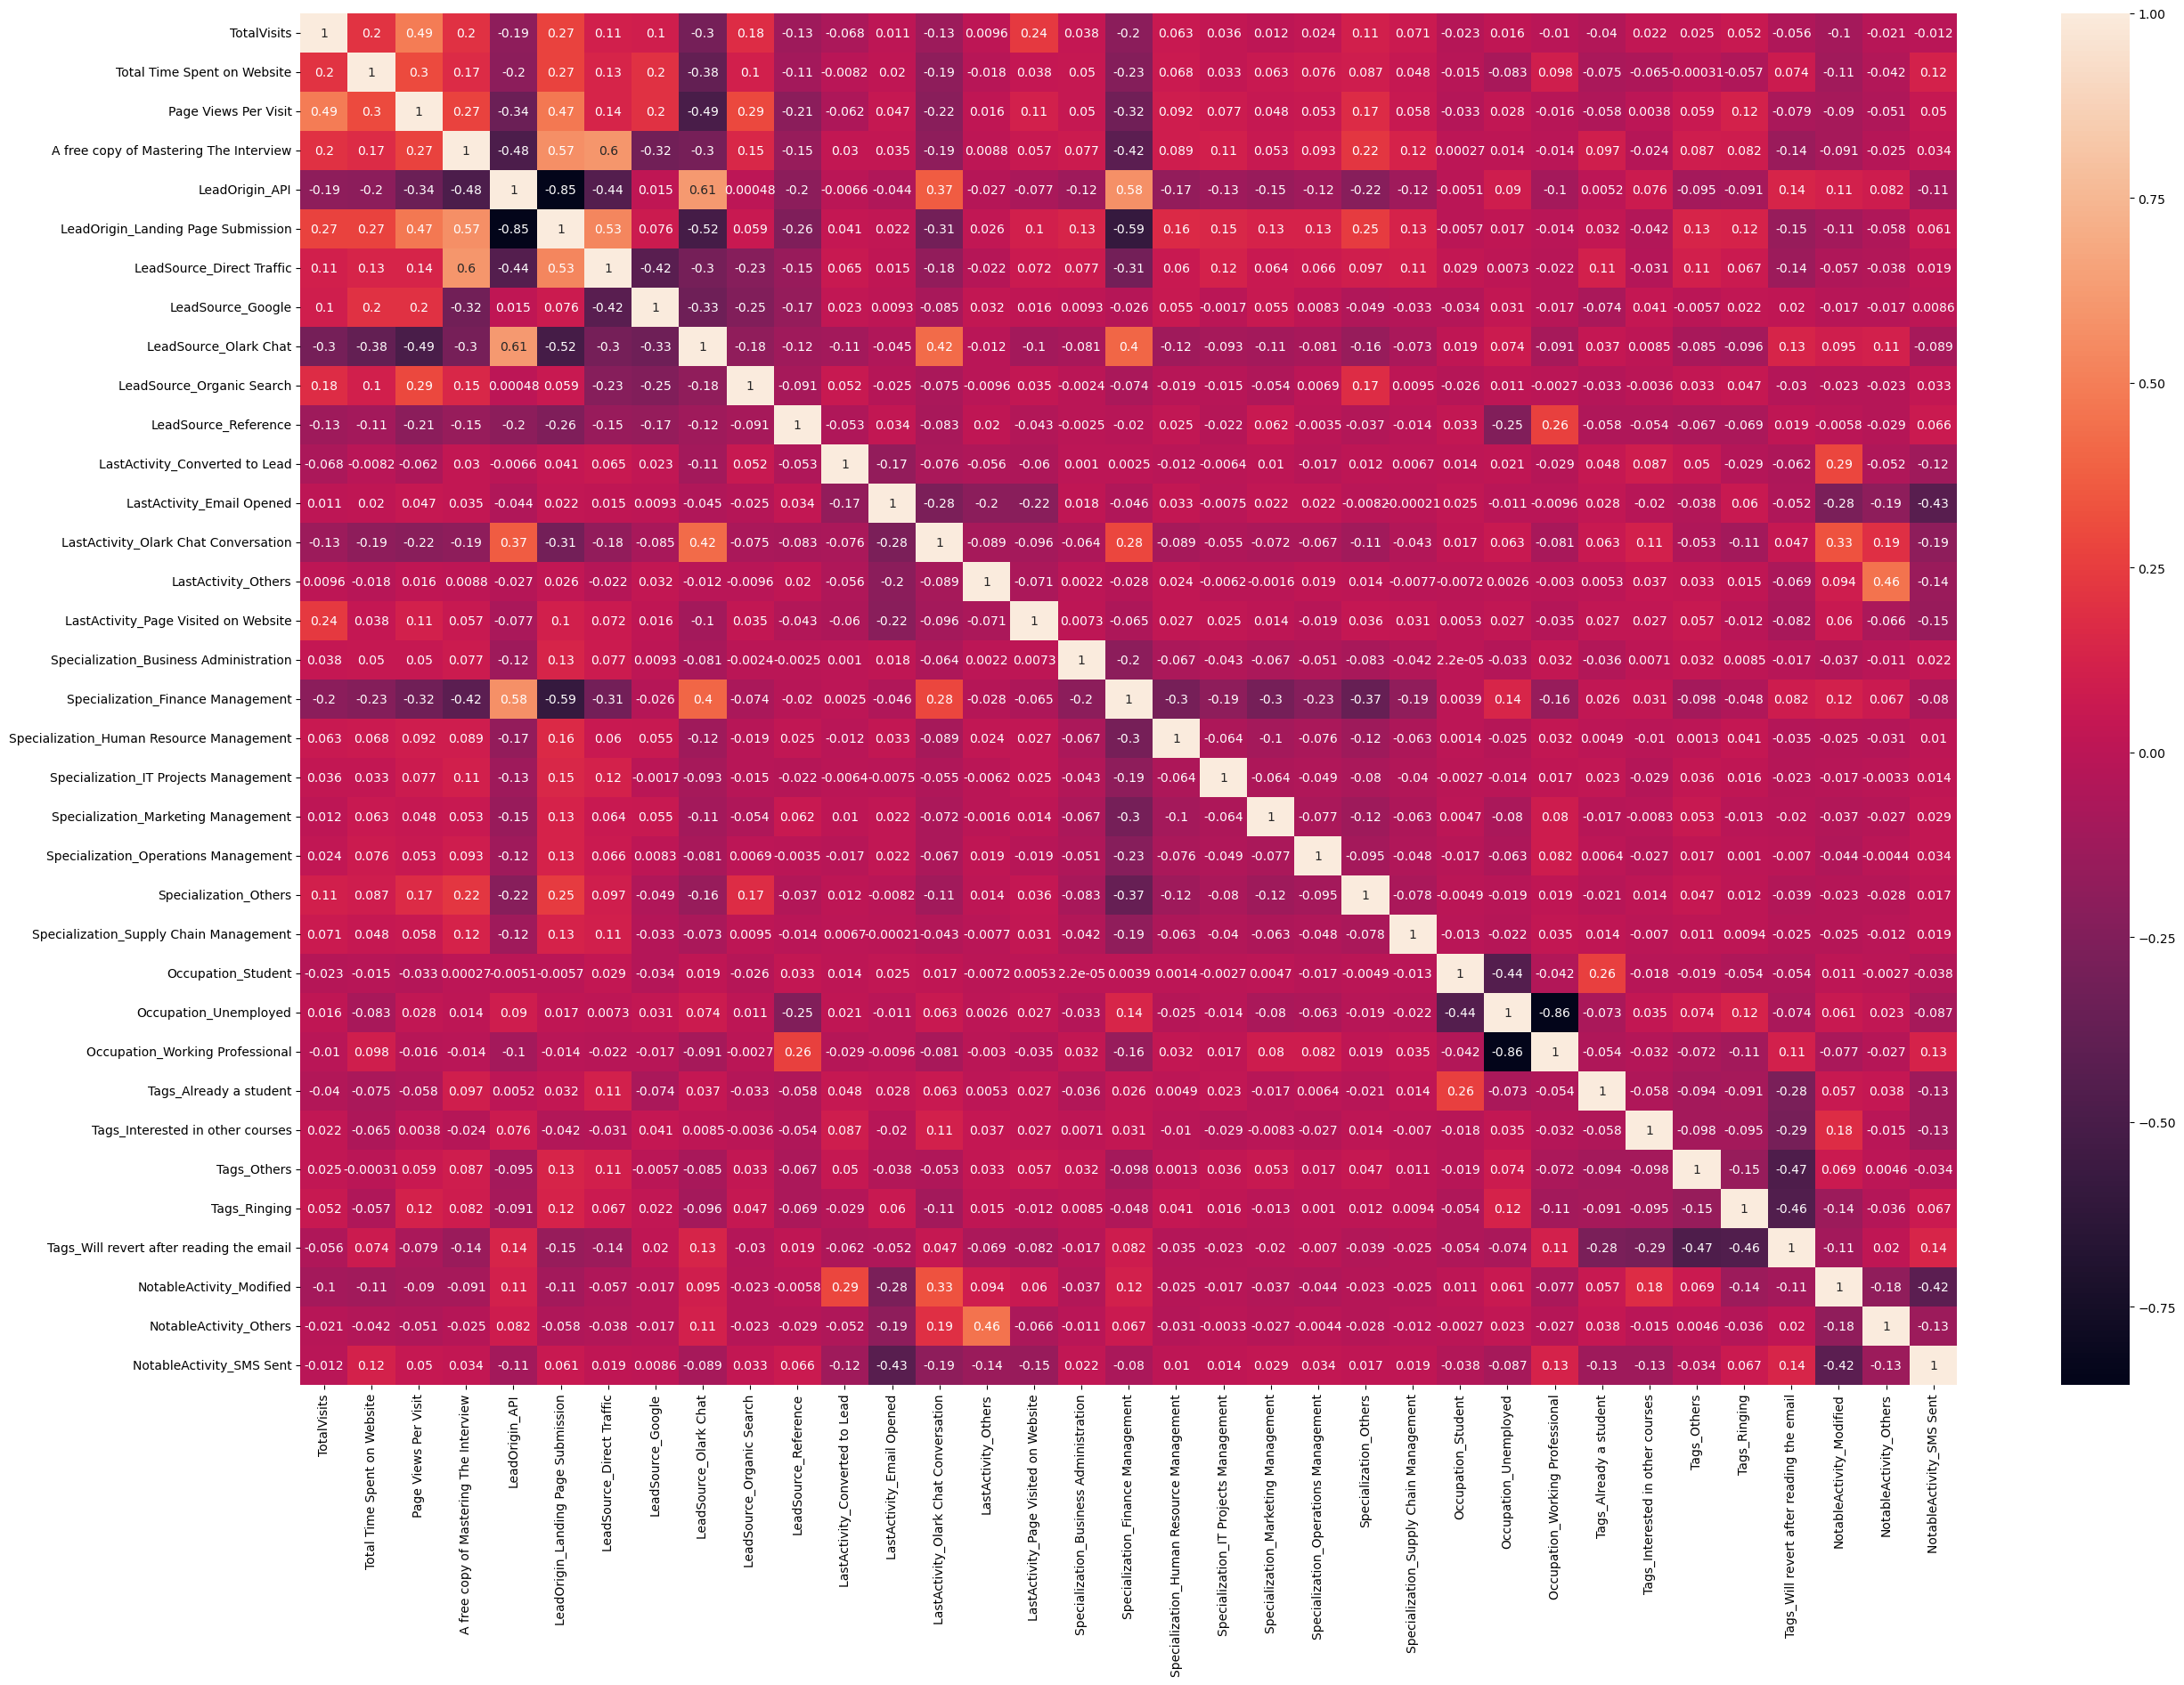

In [198]:
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## 6. Model building
<hr/>

In [199]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.7
Date:                Mon, 14 Aug 2023   Deviance:                       4159.5
Time:                        19:51:54   Pearson chi2:                 8.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4979
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.9536      1.128      7.940      0.000       6.743      11.164
TotalVisits                                  0.1280      0.037      3.491      0.000       0.056       0.200
Total Time Spent on Website                  1.0839      0.047     23.047      0.000       0.992       1.176
Page Views Per Visit                        -0.1621      0.058     -2.792      0.005      -0.276      -0.048
A free copy of Mastering The Interview       0.1057      0.121      0.870      0.384      -0.132       0.344
LeadOrigin_API                              -2.6193      0.367     -7.135      0.000      -3.339      -1.900
LeadOrigin_Landing Page Submission          -3.0579      0.380     -8.040      0.000      -3.803      -2.312
LeadSource_Direct Traffic                   -0.1898      0.295     -0.643      0.520      -0.768       0.388
LeadSource_Google                            0.1117      0.279      0.400      0.689      -0.436       0.659
LeadSource_Olark Chat                        0.5574      0.299      1.866      0.062      -0.028       1.143
LeadSource_Organic Search                    0.0445      0.298      0.150      0.881      -0.539       0.628
LeadSource_Reference                         0.0299      0.375      0.080      0.936      -0.705       0.765
LastActivity_Converted to Lead              -0.5205      0.247     -2.110      0.035      -1.004      -0.037
LastActivity_Email Opened                    0.2636      0.182      1.449      0.147      -0.093       0.620
LastActivity_Olark Chat Conversation        -1.0837      0.210     -5.160      0.000      -1.495      -0.672
LastActivity_Others                          0.3964      0.219      1.808      0.071      -0.033       0.826
LastActivity_Page Visited on Website        -0.3232      0.216     -1.499      0.134      -0.746       0.099
Specialization_Business Administration      -0.3139      0.274     -1.148      0.251      -0.850       0.222
Specialization_Finance Management           -1.0137      0.223     -4.553      0.000      -1.450      -0.577
Specialization_Human Resource Management    -0.5382      0.244     -2.208      0.027      -1.016      -0.060
Specialization_IT Projects Management       -0.3383      0.287     -1.178      0.239      -0.901       0.225
Specialization_Marketing Management         -0.2198      0.242     -0.909      0.363      -0.694       0.254
Specialization_Operations Management        -0.5381      0.268     -2.006      0.045      -1.064      -0.012
Specialization_Others                       -0.7414      0.233     -3.188      0.001      -1.197      -0.286
Specialization_Supply Chain Management      -0.4642      0.287     -1.620      0.105      -1.026       0.097
Occupation_Student             

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.7
Date:                Mon, 14 Aug 2023   Deviance:                       4159.5
Time:                        19:51:54   Pearson chi2:                 8.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4979
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.9536      1.128      7.940      0.000       6.743      11.164
TotalVisits                                  0.1280      0.037      3.491      0.000       0.056       0.200
Total Time Spent on Website                  1.0839      0.047     23.047      0.000       0.992       1.176
Page Views Per Visit                        -0.1621      0.058     -2.792      0.005      -0.276      -0.048
A free copy of Mastering The Interview       0.1057      0.121      0.870      0.384      -0.132       0.344
LeadOrigin_API                              -2.6193      0.367     -7.135      0.000      -3.339      -1.900
LeadOrigin_Landing Page Submission          -3.0579      0.380     -8.040      0.000      -3.803      -2.312
LeadSource_Direct Traffic                   -0.1898      0.295     -0.643      0.520      -0.768       0.388
LeadSource_Google                            0.1117      0.279      0.400      0.689      -0.436       0.659
LeadSource_Olark Chat                        0.5574      0.299      1.866      0.062      -0.028       1.143
LeadSource_Organic Search                    0.0445      0.298      0.150      0.881      -0.539       0.628
LeadSource_Reference                         0.0299      0.375      0.080      0.936      -0.705       0.765
LastActivity_Converted to Lead              -0.5205      0.247     -2.110      0.035      -1.004      -0.037
LastActivity_Email Opened                    0.2636      0.182      1.449      0.147      -0.093       0.620
LastActivity_Olark Chat Conversation        -1.0837      0.210     -5.160      0.000      -1.495      -0.672
LastActivity_Others                          0.3964      0.219      1.808      0.071      -0.033       0.826
LastActivity_Page Visited on Website        -0.3232      0.216     -1.499      0.134      -0.746       0.099
Specialization_Business Administration      -0.3139      0.274     -1.148      0.251      -0.850       0.222
Specialization_Finance Management           -1.0137      0.223     -4.553      0.000      -1.450      -0.577
Specialization_Human Resource Management    -0.5382      0.244     -2.208      0.027      -1.016      -0.060
Specialization_IT Projects Management       -0.3383      0.287     -1.178      0.239      -0.901       0.225
Specialization_Marketing Management         -0.2198      0.242     -0.909      0.363      -0.694       0.254
Specialization_Operations Management        -0.5381      0.268     -2.006      0.045      -1.064      -0.012
Specialization_Others                       -0.7414      0.233     -3.188      0.001      -1.197      -0.286
Specialization_Supply Chain Management      -0.4642      0.287     -1.620      0.105      -1.026       0.097
Occupation_Student             

#### Feature selection using RFE

In [200]:
logreg = LogisticRegression()

In [201]:
# Running RFE with 30 variables as output
rfe = RFE(estimator= logreg,n_features_to_select= 30)
rfe = rfe.fit(X_train, y_train)

In [202]:
col = X_train.columns[rfe.support_]

In [203]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'LeadSource_Google',
       'LeadSource_Organic Search', 'Specialization_Marketing Management',
       'NotableActivity_Others'],
      dtype='object')

Index(['A free copy of Mastering The Interview', 'LeadSource_Google',
       'LeadSource_Organic Search', 'Specialization_Marketing Management',
       'NotableActivity_Others'],
      dtype='object')

##### Assess the model with StatsModels

In [204]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Mon, 14 Aug 2023   Deviance:                       4161.4
Time:                        19:51:56   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.7382      1.105      7.910      0.000       6.573      10.903
TotalVisits                                  0.1302      0.037      3.539      0.000       0.058       0.202
Total Time Spent on Website                  1.0835      0.047     23.093      0.000       0.992       1.175
Page Views Per Visit                        -0.1618      0.057     -2.834      0.005      -0.274      -0.050
LeadOrigin_API                              -2.5490      0.298     -8.564      0.000      -3.132      -1.966
LeadOrigin_Landing Page Submission          -2.9594      0.306     -9.668      0.000      -3.559      -2.359
LeadSource_Direct Traffic                   -0.2332      0.106     -2.199      0.028      -0.441      -0.025
LeadSource_Olark Chat                        0.4721      0.149      3.176      0.001       0.181       0.763
LeadSource_Reference                         0.0067      0.372      0.018      0.986      -0.721       0.735
LastActivity_Converted to Lead              -0.5205      0.246     -2.113      0.035      -1.003      -0.038
LastActivity_Email Opened                    0.3054      0.161      1.891      0.059      -0.011       0.622
LastActivity_Olark Chat Conversation        -1.0976      0.208     -5.288      0.000      -1.504      -0.691
LastActivity_Others                          0.3549      0.203      1.752      0.080      -0.042       0.752
LastActivity_Page Visited on Website        -0.3040      0.207     -1.467      0.142      -0.710       0.102
Specialization_Business Administration      -0.1562      0.211     -0.740      0.459      -0.570       0.258
Specialization_Finance Management           -0.8699      0.140     -6.222      0.000      -1.144      -0.596
Specialization_Human Resource Management    -0.3774      0.171     -2.205      0.027      -0.713      -0.042
Specialization_IT Projects Management       -0.1802      0.229     -0.788      0.431      -0.629       0.268
Specialization_Operations Management        -0.3768      0.204     -1.850      0.064      -0.776       0.022
Specialization_Others                       -0.5799      0.153     -3.792      0.000      -0.880      -0.280
Specialization_Supply Chain Management      -0.3051      0.228     -1.339      0.181      -0.752       0.142
Occupation_Student                          -0.1867      0.829     -0.225      0.822      -1.811       1.438
Occupation_Unemployed                       -1.4238      0.760     -1.872      0.061      -2.914       0.067
Occupation_Working Professional              1.0303      0.791      1.302      0.193      -0.521       2.581
Tags_Already a student                      -9.1482      0.940     -9.730      0.000     -10.991      -7.305
Tags_Interested in other course

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Mon, 14 Aug 2023   Deviance:                       4161.4
Time:                        19:51:56   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.7382      1.105      7.910      0.000       6.573      10.903
TotalVisits                                  0.1302      0.037      3.539      0.000       0.058       0.202
Total Time Spent on Website                  1.0835      0.047     23.093      0.000       0.992       1.175
Page Views Per Visit                        -0.1618      0.057     -2.834      0.005      -0.274      -0.050
LeadOrigin_API                              -2.5490      0.298     -8.564      0.000      -3.132      -1.966
LeadOrigin_Landing Page Submission          -2.9594      0.306     -9.668      0.000      -3.559      -2.359
LeadSource_Direct Traffic                   -0.2332      0.106     -2.199      0.028      -0.441      -0.025
LeadSource_Olark Chat                        0.4721      0.149      3.176      0.001       0.181       0.763
LeadSource_Reference                         0.0067      0.372      0.018      0.986      -0.721       0.735
LastActivity_Converted to Lead              -0.5205      0.246     -2.113      0.035      -1.003      -0.038
LastActivity_Email Opened                    0.3054      0.161      1.891      0.059      -0.011       0.622
LastActivity_Olark Chat Conversation        -1.0976      0.208     -5.288      0.000      -1.504      -0.691
LastActivity_Others                          0.3549      0.203      1.752      0.080      -0.042       0.752
LastActivity_Page Visited on Website        -0.3040      0.207     -1.467      0.142      -0.710       0.102
Specialization_Business Administration      -0.1562      0.211     -0.740      0.459      -0.570       0.258
Specialization_Finance Management           -0.8699      0.140     -6.222      0.000      -1.144      -0.596
Specialization_Human Resource Management    -0.3774      0.171     -2.205      0.027      -0.713      -0.042
Specialization_IT Projects Management       -0.1802      0.229     -0.788      0.431      -0.629       0.268
Specialization_Operations Management        -0.3768      0.204     -1.850      0.064      -0.776       0.022
Specialization_Others                       -0.5799      0.153     -3.792      0.000      -0.880      -0.280
Specialization_Supply Chain Management      -0.3051      0.228     -1.339      0.181      -0.752       0.142
Occupation_Student                          -0.1867      0.829     -0.225      0.822      -1.811       1.438
Occupation_Unemployed                       -1.4238      0.760     -1.872      0.061      -2.914       0.067
Occupation_Working Professional              1.0303      0.791      1.302      0.193      -0.521       2.581
Tags_Already a student                      -9.1482      0.940     -9.730      0.000     -10.991      -7.305
Tags_Interested in other course

In [205]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.295183
7132    0.750017
8954    0.047236
5283    0.389813
3003    0.580896
478     0.064430
1352    0.756788
3166    0.961010
7700    0.005059
2647    0.020045
dtype: float64

4715    0.295183
7132    0.750017
8954    0.047236
5283    0.389813
3003    0.580896
478     0.064430
1352    0.756788
3166    0.961010
7700    0.005059
2647    0.020045
dtype: float64

In [206]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29518324, 0.75001654, 0.0472357 , 0.38981304, 0.58089575,
       0.06443024, 0.75678836, 0.96101041, 0.00505947, 0.0200448 ])

array([0.29518324, 0.75001654, 0.0472357 , 0.38981304, 0.58089575,
       0.06443024, 0.75678836, 0.96101041, 0.00505947, 0.0200448 ])

##### Create a dataframe with the actual churn flag and the predicted probabilities

In [207]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID
0           0         0.295183    4715
1           1         0.750017    7132
2           0         0.047236    8954
3           0         0.389813    5283
4           0         0.580896    3003

Conversion  Conversion_Prob  LeadID
0           0         0.295183    4715
1           1         0.750017    7132
2           0         0.047236    8954
3           0         0.389813    5283
4           0         0.580896    3003

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [208]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted
0           0         0.295183    4715          0
1           1         0.750017    7132          1
2           0         0.047236    8954          0
3           0         0.389813    5283          0
4           0         0.580896    3003          1

Conversion  Conversion_Prob  LeadID  predicted
0           0         0.295183    4715          0
1           1         0.750017    7132          1
2           0         0.047236    8954          0
3           0         0.389813    5283          0
4           0         0.580896    3003          1

In [209]:
# Confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3659  325]
 [ 517 1967]]
[[3659  325]
 [ 517 1967]]


In [210]:
# Let's check the overall accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8698206555349413
0.8698206555349413


#### Checking VIFs

In [211]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
21                     Occupation_Unemployed  72.09
4         LeadOrigin_Landing Page Submission  26.36
3                             LeadOrigin_API  18.72
27  Tags_Will revert after reading the email  18.28
22           Occupation_Working Professional   6.91
9                  LastActivity_Email Opened   6.52
14         Specialization_Finance Management   5.69
25                               Tags_Others   5.22
26                              Tags_Ringing   5.15
29                  NotableActivity_SMS Sent   5.02
7                       LeadSource_Reference   3.30
28                  NotableActivity_Modified   3.24
6                      LeadSource_Olark Chat   2.91
20                        Occupation_Student   2.80
24          Tags_Interested in other courses   2.76
23                    Tags_Already a student   2.75
10      LastActivity_Olark Chat Conversation   2.44
5                  LeadSource_Direct Traffic   2.06
18                     Specialization_Others   2.02
2                       Page Views Per Visit   1.92
12      LastActivity_Page Visited on Website   1.88
11                       LastActivity_Others   1.71
15  Specialization_Human Resource Management   1.70
8             LastActivity_Converted to Lead   1.52
17      Specialization_Operations Management   1.43
0                                TotalVisits   1.41
1                Total Time Spent on Website   1.34
13    Specialization_Business Administration   1.33
16     Specialization_IT Projects Management   1.31
19    Specialization_Supply Chain Management   1.30

Features    VIF
21                     Occupation_Unemployed  72.09
4         LeadOrigin_Landing Page Submission  26.36
3                             LeadOrigin_API  18.72
27  Tags_Will revert after reading the email  18.28
22           Occupation_Working Professional   6.91
9                  LastActivity_Email Opened   6.52
14         Specialization_Finance Management   5.69
25                               Tags_Others   5.22
26                              Tags_Ringing   5.15
29                  NotableActivity_SMS Sent   5.02
7                       LeadSource_Reference   3.30
28                  NotableActivity_Modified   3.24
6                      LeadSource_Olark Chat   2.91
20                        Occupation_Student   2.80
24          Tags_Interested in other courses   2.76
23                    Tags_Already a student   2.75
10      LastActivity_Olark Chat Conversation   2.44
5                  LeadSource_Direct Traffic   2.06
18                     Specialization_Others   2.02
2                       Page Views Per Visit   1.92
12      LastActivity_Page Visited on Website   1.88
11                       LastActivity_Others   1.71
15  Specialization_Human Resource Management   1.70
8             LastActivity_Converted to Lead   1.52
17      Specialization_Operations Management   1.43
0                                TotalVisits   1.41
1                Total Time Spent on Website   1.34
13    Specialization_Business Administration   1.33
16     Specialization_IT Projects Management   1.31
19    Specialization_Supply Chain Management   1.30

**LeadSource_Reference is having high P value. So, we need to drop it**

In [213]:
col = col.drop('LeadSource_Reference', 1)

#### Re-run the model using the selected variables

In [214]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Mon, 14 Aug 2023   Deviance:                       4161.4
Time:                        19:51:57   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.7421      1.083      8.076      0.000       6.620      10.864
TotalVisits                                  0.1302      0.037      3.539      0.000       0.058       0.202
Total Time Spent on Website                  1.0835      0.047     23.093      0.000       0.992       1.175
Page Views Per Visit                        -0.1618      0.057     -2.835      0.005      -0.274      -0.050
LeadOrigin_API                              -2.5526      0.221    -11.536      0.000      -2.986      -2.119
LeadOrigin_Landing Page Submission          -2.9631      0.227    -13.031      0.000      -3.409      -2.517
LeadSource_Direct Traffic                   -0.2332      0.106     -2.199      0.028      -0.441      -0.025
LeadSource_Olark Chat                        0.4721      0.149      3.176      0.001       0.181       0.763
LastActivity_Converted to Lead              -0.5205      0.246     -2.113      0.035      -1.003      -0.038
LastActivity_Email Opened                    0.3054      0.161      1.892      0.059      -0.011       0.622
LastActivity_Olark Chat Conversation        -1.0975      0.208     -5.289      0.000      -1.504      -0.691
LastActivity_Others                          0.3550      0.202      1.754      0.079      -0.042       0.752
LastActivity_Page Visited on Website        -0.3039      0.207     -1.467      0.143      -0.710       0.102
Specialization_Business Administration      -0.1563      0.211     -0.740      0.459      -0.570       0.258
Specialization_Finance Management           -0.8702      0.139     -6.251      0.000      -1.143      -0.597
Specialization_Human Resource Management    -0.3775      0.171     -2.207      0.027      -0.713      -0.042
Specialization_IT Projects Management       -0.1802      0.229     -0.788      0.431      -0.629       0.268
Specialization_Operations Management        -0.3769      0.204     -1.851      0.064      -0.776       0.022
Specialization_Others                       -0.5801      0.153     -3.795      0.000      -0.880      -0.280
Specialization_Supply Chain Management      -0.3052      0.228     -1.339      0.181      -0.752       0.142
Occupation_Student                          -0.1866      0.829     -0.225      0.822      -1.811       1.438
Occupation_Unemployed                       -1.4239      0.760     -1.873      0.061      -2.914       0.066
Occupation_Working Professional              1.0304      0.791      1.302      0.193      -0.521       2.581
Tags_Already a student                      -9.1484      0.940     -9.731      0.000     -10.991      -7.306
Tags_Interested in other courses            -8.3958      0.822    -10.220      0.000     -10.006      -6.786
Tags_Others                    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Mon, 14 Aug 2023   Deviance:                       4161.4
Time:                        19:51:57   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        8.7421      1.083      8.076      0.000       6.620      10.864
TotalVisits                                  0.1302      0.037      3.539      0.000       0.058       0.202
Total Time Spent on Website                  1.0835      0.047     23.093      0.000       0.992       1.175
Page Views Per Visit                        -0.1618      0.057     -2.835      0.005      -0.274      -0.050
LeadOrigin_API                              -2.5526      0.221    -11.536      0.000      -2.986      -2.119
LeadOrigin_Landing Page Submission          -2.9631      0.227    -13.031      0.000      -3.409      -2.517
LeadSource_Direct Traffic                   -0.2332      0.106     -2.199      0.028      -0.441      -0.025
LeadSource_Olark Chat                        0.4721      0.149      3.176      0.001       0.181       0.763
LastActivity_Converted to Lead              -0.5205      0.246     -2.113      0.035      -1.003      -0.038
LastActivity_Email Opened                    0.3054      0.161      1.892      0.059      -0.011       0.622
LastActivity_Olark Chat Conversation        -1.0975      0.208     -5.289      0.000      -1.504      -0.691
LastActivity_Others                          0.3550      0.202      1.754      0.079      -0.042       0.752
LastActivity_Page Visited on Website        -0.3039      0.207     -1.467      0.143      -0.710       0.102
Specialization_Business Administration      -0.1563      0.211     -0.740      0.459      -0.570       0.258
Specialization_Finance Management           -0.8702      0.139     -6.251      0.000      -1.143      -0.597
Specialization_Human Resource Management    -0.3775      0.171     -2.207      0.027      -0.713      -0.042
Specialization_IT Projects Management       -0.1802      0.229     -0.788      0.431      -0.629       0.268
Specialization_Operations Management        -0.3769      0.204     -1.851      0.064      -0.776       0.022
Specialization_Others                       -0.5801      0.153     -3.795      0.000      -0.880      -0.280
Specialization_Supply Chain Management      -0.3052      0.228     -1.339      0.181      -0.752       0.142
Occupation_Student                          -0.1866      0.829     -0.225      0.822      -1.811       1.438
Occupation_Unemployed                       -1.4239      0.760     -1.873      0.061      -2.914       0.066
Occupation_Working Professional              1.0304      0.791      1.302      0.193      -0.521       2.581
Tags_Already a student                      -9.1484      0.940     -9.731      0.000     -10.991      -7.306
Tags_Interested in other courses            -8.3958      0.822    -10.220      0.000     -10.006      -6.786
Tags_Others                    

In [215]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [216]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [217]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted
0           0         0.295175    4715          0
1           1         0.750011    7132          1
2           0         0.047244    8954          0
3           0         0.389748    5283          0
4           0         0.580884    3003          1

Conversion  Conversion_Prob  LeadID  predicted
0           0         0.295175    4715          0
1           1         0.750011    7132          1
2           0         0.047244    8954          0
3           0         0.389748    5283          0
4           0         0.580884    3003          1

In [218]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8698206555349413
0.8698206555349413


##### Let's check the VIFs again

In [219]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
20                     Occupation_Unemployed  50.10
26  Tags_Will revert after reading the email  18.24
4         LeadOrigin_Landing Page Submission  12.79
3                             LeadOrigin_API   9.31
8                  LastActivity_Email Opened   6.45
13         Specialization_Finance Management   5.66
24                               Tags_Others   5.21
25                              Tags_Ringing   5.13
28                  NotableActivity_SMS Sent   4.98
21           Occupation_Working Professional   4.58
27                  NotableActivity_Modified   3.23
6                      LeadSource_Olark Chat   2.91
23          Tags_Interested in other courses   2.75
22                    Tags_Already a student   2.75
9       LastActivity_Olark Chat Conversation   2.43
19                        Occupation_Student   2.22
5                  LeadSource_Direct Traffic   2.06
17                     Specialization_Others   2.02
2                       Page Views Per Visit   1.92
11      LastActivity_Page Visited on Website   1.87
14  Specialization_Human Resource Management   1.70
10                       LastActivity_Others   1.69
7             LastActivity_Converted to Lead   1.52
16      Specialization_Operations Management   1.43
0                                TotalVisits   1.41
1                Total Time Spent on Website   1.33
12    Specialization_Business Administration   1.33
15     Specialization_IT Projects Management   1.31
18    Specialization_Supply Chain Management   1.30

Features    VIF
20                     Occupation_Unemployed  50.10
26  Tags_Will revert after reading the email  18.24
4         LeadOrigin_Landing Page Submission  12.79
3                             LeadOrigin_API   9.31
8                  LastActivity_Email Opened   6.45
13         Specialization_Finance Management   5.66
24                               Tags_Others   5.21
25                              Tags_Ringing   5.13
28                  NotableActivity_SMS Sent   4.98
21           Occupation_Working Professional   4.58
27                  NotableActivity_Modified   3.23
6                      LeadSource_Olark Chat   2.91
23          Tags_Interested in other courses   2.75
22                    Tags_Already a student   2.75
9       LastActivity_Olark Chat Conversation   2.43
19                        Occupation_Student   2.22
5                  LeadSource_Direct Traffic   2.06
17                     Specialization_Others   2.02
2                       Page Views Per Visit   1.92
11      LastActivity_Page Visited on Website   1.87
14  Specialization_Human Resource Management   1.70
10                       LastActivity_Others   1.69
7             LastActivity_Converted to Lead   1.52
16      Specialization_Operations Management   1.43
0                                TotalVisits   1.41
1                Total Time Spent on Website   1.33
12    Specialization_Business Administration   1.33
15     Specialization_IT Projects Management   1.31
18    Specialization_Supply Chain Management   1.30

**Occupation_Student is having high p value. So, we need to drop it**

In [220]:
## Drop column with high p value
col = col.drop('Occupation_Student', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Mon, 14 Aug 2023   Deviance:                       4161.5
Time:                        19:51:58   Pearson chi2:                 8.58e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
19                     Occupation_Unemployed  24.80
25  Tags_Will revert after reading the email  15.00
4         LeadOrigin_Landing Page Submission  12.29
3                             LeadOrigin_API   9.14
8                  LastActivity_Email Opened   5.42
13         Specialization_Finance Management   5.38
24                              Tags_Ringing   4.47
23                               Tags_Others   4.47
27                  NotableActivity_SMS Sent   4.34
26                  NotableActivity_Modified   2.91
6                      LeadSource_Olark Chat   2.90
20           Occupation_Working Professional   2.79
22          Tags_Interested in other courses   2.50
9       LastActivity_Olark Chat Conversation   2.34
21                    Tags_Already a student   2.25
5                  LeadSource_Direct Traffic   2.06
17                     Specialization_Others   1.97
2                       Page Views Per Visit   1.90
11      Last

**Specialization_Business Administration is having a high p value. So, we need to drop it**

In [221]:
## Drop column with high p value
col = col.drop('Specialization_Business Administration', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.0
Date:                Mon, 14 Aug 2023   Deviance:                       4162.0
Time:                        19:51:58   Pearson chi2:                 8.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
18                     Occupation_Unemployed  24.56
24  Tags_Will revert after reading the email  14.96
4         LeadOrigin_Landing Page Submission  12.22
3                             LeadOrigin_API   9.12
8                  LastActivity_Email Opened   5.39
12         Specialization_Finance Management   4.67
22                               Tags_Others   4.46
23                              Tags_Ringing   4.46
26                  NotableActivity_SMS Sent   4.32
25                  NotableActivity_Modified   2.91
6                      LeadSource_Olark Chat   2.90
19           Occupation_Working Professional   2.77
21          Tags_Interested in other courses   2.50
9       LastActivity_Olark Chat Conversation   2.34
20                    Tags_Already a student   2.25
5                  LeadSource_Direct Traffic   2.06
2                       Page Views Per Visit   1.90
16                     Specialization_Others   1.74
11      Last

**Specialization_IT Projects Management is having high p value. So it needs to be dropped**

In [222]:
## Drop column with high p value
col = col.drop('Specialization_IT Projects Management', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.2
Date:                Mon, 14 Aug 2023   Deviance:                       4162.4
Time:                        19:51:59   Pearson chi2:                 8.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4977
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
17                     Occupation_Unemployed  24.36
23  Tags_Will revert after reading the email  14.92
4         LeadOrigin_Landing Page Submission  12.20
3                             LeadOrigin_API   9.11
8                  LastActivity_Email Opened   5.39
22                              Tags_Ringing   4.45
21                               Tags_Others   4.45
25                  NotableActivity_SMS Sent   4.32
12         Specialization_Finance Management   4.27
6                      LeadSource_Olark Chat   2.90
24                  NotableActivity_Modified   2.90
18           Occupation_Working Professional   2.75
20          Tags_Interested in other courses   2.50
9       LastActivity_Olark Chat Conversation   2.34
19                    Tags_Already a student   2.24
5                  LeadSource_Direct Traffic   2.05
2                       Page Views Per Visit   1.90
11      LastActivity_Page Visited on Website   1.73
15          

**Specialization_Supply Chain Management is having high p value. So it needs to be dropped**

In [223]:
## Drop column with high p value
col = col.drop('Specialization_Supply Chain Management', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.8
Date:                Mon, 14 Aug 2023   Deviance:                       4163.6
Time:                        19:51:59   Pearson chi2:                 8.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4976
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
16                     Occupation_Unemployed  24.16
22  Tags_Will revert after reading the email  14.92
4         LeadOrigin_Landing Page Submission  12.19
3                             LeadOrigin_API   9.11
8                  LastActivity_Email Opened   5.39
21                              Tags_Ringing   4.45
20                               Tags_Others   4.45
24                  NotableActivity_SMS Sent   4.32
12         Specialization_Finance Management   3.99
6                      LeadSource_Olark Chat   2.90
23                  NotableActivity_Modified   2.90
17           Occupation_Working Professional   2.73
19          Tags_Interested in other courses   2.50
9       LastActivity_Olark Chat Conversation   2.34
18                    Tags_Already a student   2.24
5                  LeadSource_Direct Traffic   2.05
2                       Page Views Per Visit   1.90
11      LastActivity_Page Visited on Website   1.73
10          

**LastActivity_Page Visited on Website is having high p value. So it needs to be dropped**

In [224]:
## Drop column with high p value
col = col.drop('LastActivity_Page Visited on Website', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.9
Date:                Mon, 14 Aug 2023   Deviance:                       4165.8
Time:                        19:52:00   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4974
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
15                     Occupation_Unemployed  22.62
21  Tags_Will revert after reading the email  14.84
4         LeadOrigin_Landing Page Submission  12.10
3                             LeadOrigin_API   9.06
19                               Tags_Others   4.43
20                              Tags_Ringing   4.43
11         Specialization_Finance Management   3.98
8                  LastActivity_Email Opened   3.81
23                  NotableActivity_SMS Sent   3.28
6                      LeadSource_Olark Chat   2.90
22                  NotableActivity_Modified   2.83
16           Occupation_Working Professional   2.57
18          Tags_Interested in other courses   2.48
17                    Tags_Already a student   2.21
5                  LeadSource_Direct Traffic   2.05
9       LastActivity_Olark Chat Conversation   2.00
2                       Page Views Per Visit   1.90
14                     Specialization_Others   1.52
0           

**Specialization_Operations Management is having high p value. So it needs to be dropped**

In [225]:
## Drop column with high p value
col = col.drop('Specialization_Operations Management', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.9
Date:                Mon, 14 Aug 2023   Deviance:                       4167.9
Time:                        19:52:01   Pearson chi2:                 8.63e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4972
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
14                     Occupation_Unemployed  22.45
20  Tags_Will revert after reading the email  14.84
4         LeadOrigin_Landing Page Submission  12.08
3                             LeadOrigin_API   9.05
19                              Tags_Ringing   4.43
18                               Tags_Others   4.42
8                  LastActivity_Email Opened   3.80
11         Specialization_Finance Management   3.67
22                  NotableActivity_SMS Sent   3.27
6                      LeadSource_Olark Chat   2.90
21                  NotableActivity_Modified   2.83
15           Occupation_Working Professional   2.54
17          Tags_Interested in other courses   2.48
16                    Tags_Already a student   2.21
5                  LeadSource_Direct Traffic   2.05
9       LastActivity_Olark Chat Conversation   2.00
2                       Page Views Per Visit   1.89
13                     Specialization_Others   1.43
0           

**Specialization_Human Resource Management is having high p value. So it needs to be dropped**

In [226]:
## Drop column with high p value
col = col.drop('Specialization_Human Resource Management', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.2
Date:                Mon, 14 Aug 2023   Deviance:                       4170.4
Time:                        19:52:02   Pearson chi2:                 8.72e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4970
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
13                     Occupation_Unemployed  22.24
19  Tags_Will revert after reading the email  14.81
4         LeadOrigin_Landing Page Submission  12.08
3                             LeadOrigin_API   9.05
18                              Tags_Ringing   4.42
17                               Tags_Others   4.42
8                  LastActivity_Email Opened   3.79
11         Specialization_Finance Management   3.33
21                  NotableActivity_SMS Sent   3.27
6                      LeadSource_Olark Chat   2.90
20                  NotableActivity_Modified   2.82
14           Occupation_Working Professional   2.53
16          Tags_Interested in other courses   2.47
15                    Tags_Already a student   2.20
5                  LeadSource_Direct Traffic   2.05
9       LastActivity_Olark Chat Conversation   2.00
2                       Page Views Per Visit   1.89
0                                TotalVisits   1.37
10          

**LastActivity_Converted to Lead is having high p value. So it needs to be dropped**

In [227]:
## Drop column with high p value
col = col.drop('LastActivity_Converted to Lead', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.8
Date:                Mon, 14 Aug 2023   Deviance:                       4173.5
Time:                        19:52:02   Pearson chi2:                 8.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4968
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
12                     Occupation_Unemployed  22.23
18  Tags_Will revert after reading the email  14.76
4         LeadOrigin_Landing Page Submission  11.94
3                             LeadOrigin_API   8.92
17                              Tags_Ringing   4.41
16                               Tags_Others   4.41
7                  LastActivity_Email Opened   3.51
10         Specialization_Finance Management   3.33
20                  NotableActivity_SMS Sent   3.13
6                      LeadSource_Olark Chat   2.85
19                  NotableActivity_Modified   2.76
13           Occupation_Working Professional   2.53
15          Tags_Interested in other courses   2.46
14                    Tags_Already a student   2.19
5                  LeadSource_Direct Traffic   2.05
2                       Page Views Per Visit   1.87
8       LastActivity_Olark Chat Conversation   1.86
0                                TotalVisits   1.36
11          

**LeadSource_Direct Traffic is having high p value. So it needs to be dropped**

In [228]:
## Drop column with high p value
col = col.drop('LeadSource_Direct Traffic', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.1
Date:                Mon, 14 Aug 2023   Deviance:                       4178.1
Time:                        19:52:03   Pearson chi2:                 8.45e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4964
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                                    Features    VIF
11                     Occupation_Unemployed  22.23
17  Tags_Will revert after reading the email  14.76
4         LeadOrigin_Landing Page Submission  10.62
3                             LeadOrigin_API   8.87
16                              Tags_Ringing   4.41
15                               Tags_Others   4.40
6                  LastActivity_Email Opened   3.51
9          Specialization_Finance Management   3.33
19                  NotableActivity_SMS Sent   3.13
5                      LeadSource_Olark Chat   2.81
18                  NotableActivity_Modified   2.76
12           Occupation_Working Professional   2.53
14          Tags_Interested in other courses   2.46
13                    Tags_Already a student   2.18
7       LastActivity_Olark Chat Conversation   1.86
2                       Page Views Per Visit   1.81
0                                TotalVisits   1.36
1                Total Time Spent on Website   1.33
10          

**Occupation_Unemployed is having very high vif value. So, we drop it and check if the accuracy score changes**

In [229]:
## Drop column with high p value
col = col.drop('Occupation_Unemployed', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.9
Date:                Mon, 14 Aug 2023   Deviance:                       4195.8
Time:                        19:52:03   Pearson chi2:                 8.37e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4951
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

**Tags_Will revert after reading the email is having very high vif value. So we drop it and check if there is a significant change in accuracy score**

In [230]:
## Drop column with high p value
col = col.drop('Tags_Will revert after reading the email', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2184.8
Date:                Mon, 14 Aug 2023   Deviance:                       4369.5
Time:                        19:52:04   Pearson chi2:                 8.61e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4813
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**NotableActivity_Modified is having p value outside of the permissible range. So we drop it and check if accuracy improves**

In [231]:
## Drop column with high p value
col = col.drop('NotableActivity_Modified', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2187.1
Date:                Mon, 14 Aug 2023   Deviance:                       4374.2
Time:                        19:52:05   Pearson chi2:                 8.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4809
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**Specialization_Others is having p value outside of the permissible range. So we drop it and check if accuracy improves**

In [232]:
## Drop column with high p value
col = col.drop('Specialization_Others', 1)

## Re run the model after column has been dropped
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

## Predict
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

## Create a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2190.6
Date:                Mon, 14 Aug 2023   Deviance:                       4381.2
Time:                        19:52:05   Pearson chi2:                 8.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4804
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<b><font color='green'><font size='4'>Conclusion: After all these iterations,we found that the p-values of the selector variables are almost equal to 0, their respective vif values are also < 5 & the overall training accuracy is fixed around 86%. So now, we can stop building the model & proceed towards model evaluation.</font></b>

## Insights from the logistic regression model
<hr/>

<b><font color='green'><font size='3'>The following predictors have a positive weightage on the target variable:<br>1. Last Notable Activity<br>
2. What is your current occupation<br>
3. Total Time Spent on Website<br>
4. Last Activity<br>
5. Lead Source<br><hr/>
The following predictors have a negative weightage on the target variable:<br>1. Lead Origin<br>
2. Ringing<br>
3. Interested in other courses<br>
4. Already a student</font></b>

## 7. Model evaluation
<hr/>

In [233]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[3627,  357],
       [ 542, 1942]], dtype=int64)

array([[3627,  357],
       [ 542, 1942]], dtype=int64)

#### Other metrics
<hr/>

1. Precission
2. Sensitivity
3. Specificity

In [234]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [235]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7818035426731079

0.7818035426731079

In [236]:
# Let us calculate specificity
TN / float(TN+FP)

0.9103915662650602

0.9103915662650602

In [237]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08960843373493976
0.08960843373493976


In [238]:
# positive predictive value 
print (TP / float(TP+FP))

0.8447150935189213
0.8447150935189213


In [239]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8699928040297433
0.8699928040297433


#### Plot ROC Curve

In [240]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [241]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

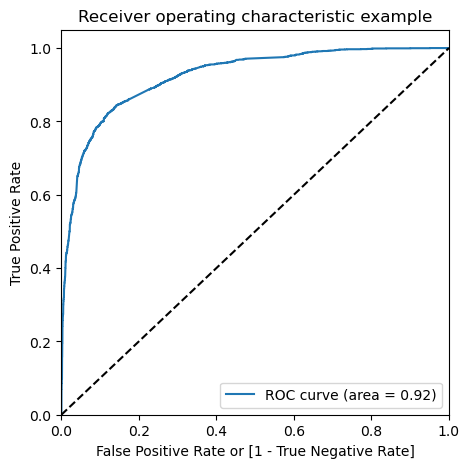

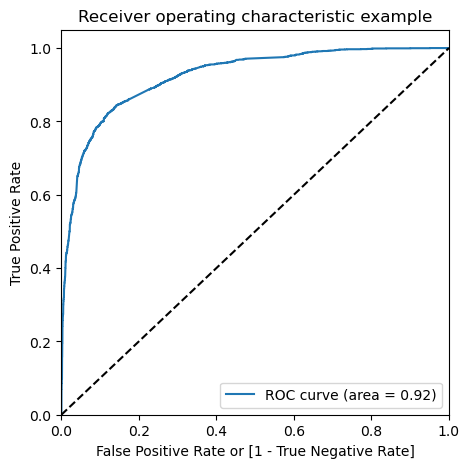

In [242]:
# Draw ROC curve
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

#### Find optimal cut-off point

In [243]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0         0.300886    4715          0    1    1    1    1    0   
1           1         0.746303    7132          1    1    1    1    1    1   
2           0         0.044486    8954          0    1    0    0    0    0   
3           0         0.584805    5283          1    1    1    1    1    1   
4           0         0.645269    3003          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    0    0  
2    0    0    0    0    0  
3    1    0    0    0    0  
4    1    1    0    0    0

Conversion  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0         0.300886    4715          0    1    1    1    1    0   
1           1         0.746303    7132          1    1    1    1    1    1   
2           0         0.044486    8954          0    1    0    0    0    0   
3           0         0.584805    5283          1    1    1    1    1    1   
4           0         0.645269    3003          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    0    0  
2    0    0    0    0    0  
3    1    0    0    0    0  
4    1    1    0    0    0

In [244]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.711657  0.964573  0.553966
0.2   0.2  0.776129  0.935990  0.676456
0.3   0.3  0.817563  0.886473  0.774598
0.4   0.4  0.857761  0.822061  0.880020
0.5   0.5  0.861008  0.781804  0.910392
0.6   0.6  0.855906  0.735507  0.930974
0.7   0.7  0.843383  0.664654  0.954819
0.8   0.8  0.806432  0.535427  0.975402
0.9   0.9  0.754174  0.374799  0.990713
     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.711657  0.964573  0.553966
0.2   0.2  0.776129  0.935990  0.676456
0.3   0.3  0.817563  0.886473  0.774598
0.4   0.4  0.857761  0.822061  0.880020
0.5   0.5  0.861008  0.781804  0.910392
0.6   0.6  0.855906  0.735507  0.930974
0.7   0.7  0.843383  0.664654  0.954819
0.8   0.8  0.806432  0.535427  0.975402
0.9   0.9  0.754174  0.374799  0.990713


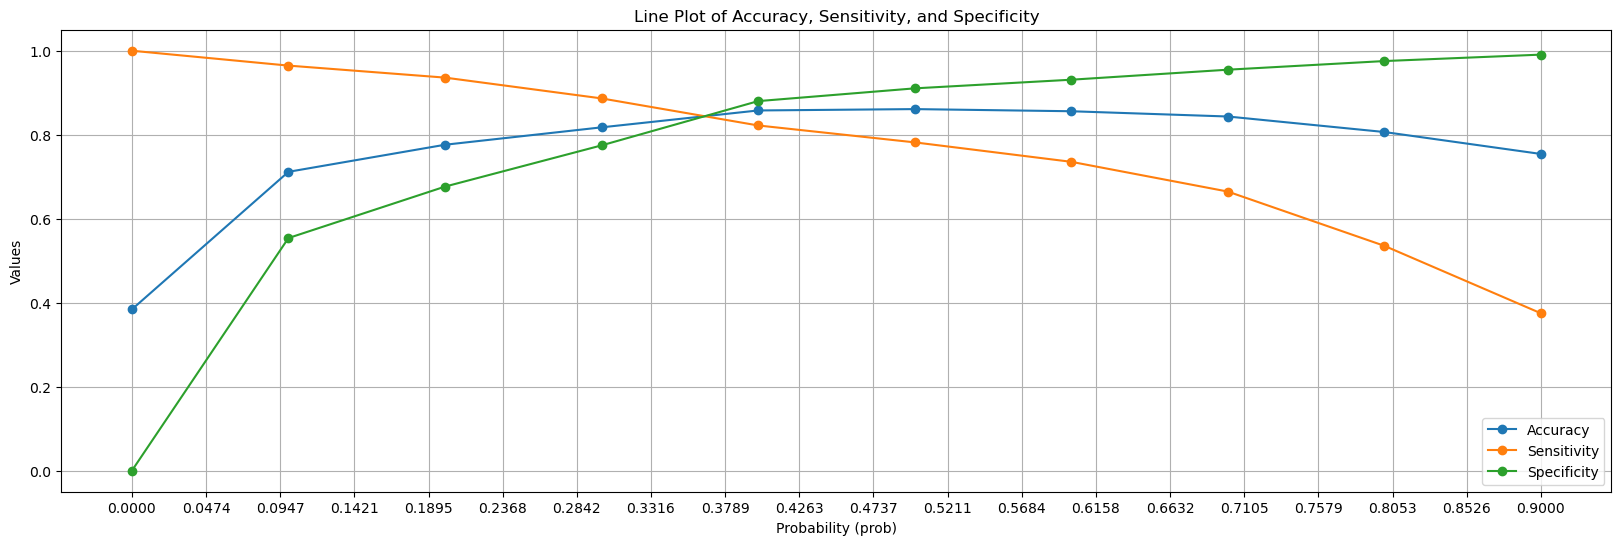

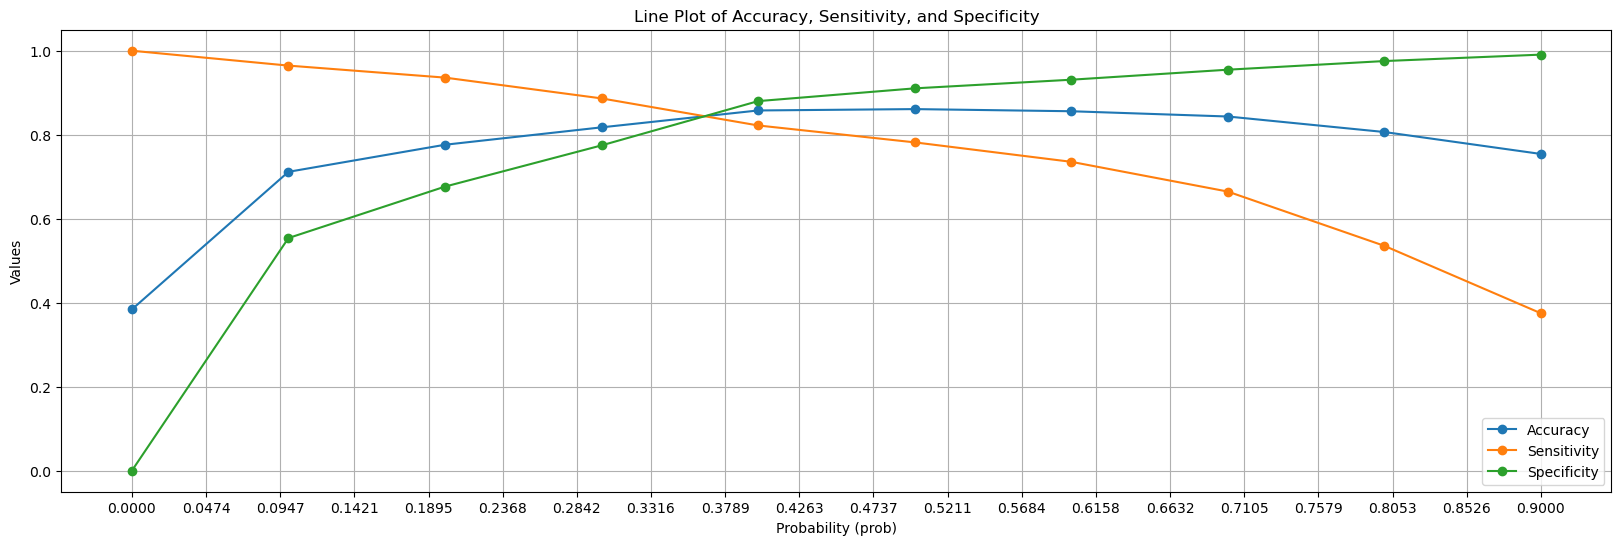

In [245]:
# Create the plot
plt.figure(figsize=(20, 6))

# Plot 'accuracy', 'sensi', and 'speci' against 'prob'
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], marker='o', label='Accuracy')
plt.plot(cutoff_df['prob'], cutoff_df['sensi'], marker='o', label='Sensitivity')
plt.plot(cutoff_df['prob'], cutoff_df['speci'], marker='o', label='Specificity')

# Set labels and title
plt.xlabel('Probability (prob)')
plt.ylabel('Values')
plt.title('Line Plot of Accuracy, Sensitivity, and Specificity')

# Xticks
num_ticks = 20
x_ticks = np.linspace(min(cutoff_df['prob']), max(cutoff_df['prob']), num_ticks)
plt.xticks(x_ticks)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

<b><font color='green'><font size='4'>Conclusion: From the graph, we can finalize the optimum cut-off value = 0.36.</font></b>

In [246]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)

In [247]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.852504638218924

0.852504638218924

In [248]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3431,  553],
       [ 401, 2083]], dtype=int64)

array([[3431,  553],
       [ 401, 2083]], dtype=int64)

In [249]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [250]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8385668276972624

0.8385668276972624

In [251]:
# Let us calculate specificity
TN / float(TN+FP)

0.8611947791164659

0.8611947791164659

In [252]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13880522088353414
0.13880522088353414


In [253]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7902124430955993
0.7902124430955993


In [254]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8953549060542797
0.8953549060542797


#### Evaluate precission / recall scores by sklearn library

In [255]:
from sklearn.metrics import precision_score, recall_score

In [256]:
# Precision_score
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.8447150935189213

0.8447150935189213

In [257]:
# Recall_score
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.7818035426731079

0.7818035426731079

### Predictions on the test set

In [258]:
# Apply the scaler on the numeric columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [259]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4608     0.885147                    -0.428249              0.139313   
7935    -0.291250                     0.805598             -0.167915   
4043    -0.487316                    -0.883879             -0.626464   
7821    -0.291250                    -0.298850             -0.167915   
856     -0.095184                    -0.521198              0.290634   

      LeadOrigin_API  LeadOrigin_Landing Page Submission  \
4608               0                                   1   
7935               0                                   1   
4043               0                                   1   
7821               0                                   1   
856                0                                   1   

      LeadSource_Olark Chat  LastActivity_Email Opened  \
4608                      0                          1   
7935                      0                          0   
4043                      0                          0   
7821                      0                          1   
856                       0                          1   

      LastActivity_Olark Chat Conversation  LastActivity_Others  \
4608                                     0                    0   
7935                                     0                    0   
4043                                     0                    0   
7821                                     0                    0   
856                                      0                    0   

      Specialization_Finance Management  Occupation_Working Professional  \
4608                                  1                                0   
7935                                  0                                0   
4043                                  1                                0   
7821                                  1                                1   
856                                   0                                0   

      Tags_Already a student  Tags_Interested in other courses  Tags_Others  \
4608                       0                                 0            0   
7935                       0                                 0            0   
4043                       0                                 0            0   
7821                       0                                 0            0   
856                        0                                 0            0   

      Tags_Ringing  NotableActivity_SMS Sent  
4608             0                         0  
7935             0                         0  
4043             0                         0  
7821             1                         0  
856              0                         0

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4608     0.885147                    -0.428249              0.139313   
7935    -0.291250                     0.805598             -0.167915   
4043    -0.487316                    -0.883879             -0.626464   
7821    -0.291250                    -0.298850             -0.167915   
856     -0.095184                    -0.521198              0.290634   

      LeadOrigin_API  LeadOrigin_Landing Page Submission  \
4608               0                                   1   
7935               0                                   1   
4043               0                                   1   
7821               0                                   1   
856                0                                   1   

      LeadSource_Olark Chat  LastActivity_Email Opened  \
4608                      0                          1   
7935                      0                          0   
4043                      0                          0   
7821                      0                          1   
856                       0                          1   

      LastActivity_Olark Chat Conversation  LastActivity_Others  \
4608                                     0                    0   
7935                                     0                    0   
4043                                     0                    0   
7821                                     0                    0   
856                                      0                    0   

      Specialization_Finance Management  Occupation_Working Professional  \
4608                                  1                                0   
7935                                  0                                0   
4043                                  1                                0   
7821                                  1                                1   
856                                   0                                0   

      Tags_Already a student  Tags_Interested in other courses  Tags_Others  \
4608                       0                                 0            0   
7935                       0                                 0            0   
4043                       0                                 0            0   
7821                       0                                 0            0   
856                        0                                 0            0   

      Tags_Ringing  NotableActivity_SMS Sent  
4608             0                         0  
7935             0                         0  
4043             0                         0  
7821             1                         0  
856              0                         0

In [260]:
X_test_sm = sm.add_constant(X_test)

In [261]:
# Predictions on the test dataset
y_test_pred = res.predict(X_test_sm)

In [262]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [263]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_yest)

In [264]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [265]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [266]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [267]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [268]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [269]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [270]:
y_pred_final.head()

LeadID  Converted  Conversion_Prob  final_predicted
0    4608          1         0.228223                0
1    7935          0         0.447502                1
2    4043          0         0.068775                0
3    7821          0         0.037150                0
4     856          0         0.280172                0

LeadID  Converted  Conversion_Prob  final_predicted
0    4608          1         0.228223                0
1    7935          0         0.447502                1
2    4043          0         0.068775                0
3    7821          0         0.037150                0
4     856          0         0.280172                0

In [271]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8701298701298701

0.8701298701298701

In [272]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1474,  221],
       [ 139,  938]], dtype=int64)

array([[1474,  221],
       [ 139,  938]], dtype=int64)

In [273]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [274]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8709377901578459

0.8709377901578459

In [275]:
# Let us calculate specificity
TN / float(TN+FP)

0.8696165191740413

0.8696165191740413

In [277]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8093183779119931
0.8093183779119931
